# Unsupervised Learning Project
## Author: Saumya Kothari

## This Project has been divided into 5 parts (Part I to Part V) and below is an overview:
#### Part I: 
AIML module project part I consists of industry based problems statement which can be solved using clustering techniques
#### Part II: 
AIML module project part II consists of designing a synthetic data generation model for a company which has a predesigned dataset.
#### Part III: 
AIML module project part III consists of industry based problems statement which can be solved using dimensional reduction techniques
#### Part IV: 
AIML module project part IV consists of designing a data driven ranking model for a sports management company.
#### Part V: 
AIML module project part V consists of implementing dimensionality reduction on multimedia dataset.

------------------------------------------------------------------------

# Part I
#### DOMAIN: 
Automobile
#### CONTEXT: 
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5
continuous attributes
#### DATA DESCRIPTION: 
The data concerns city-cycle fuel consumption in miles per gallon
#### Attribute Information:
- mpg: continuous
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model year: multi-valued discrete
- origin: multi-valued discrete
- car name: string (unique for each instance)

#### PROJECT OBJECTIVE: 
Goal is to cluster the data and treat them as individual datasets to train Regression models to predict ‘mpg’
Steps and tasks: [ Total Score: 25 points]
- Import and warehouse data: [ Score: 3 points ]
Import all the given datasets and explore shape and size. Merge all datasets onto one and explore final shape and size. Export the final dataset and store it on local machine in .csv, .xlsx and .json format for future use. Import the data from above steps into python.
- Data cleansing: [ Score: 3 points ]
Missing/incorrect value treatment. Drop attribute/s if required using relevant functional knowledge. Perform another kind of corrections/treatment on the data.
- Data analysis & visualisation: [ Score: 4 points ]
Perform detailed statistical analysis on the data. Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis. [Hint: Use your best analytical approach. Even you can mix match columns to create new columns which can be used for better analysis.] Create your own features if required. Be highly experimental and analytical here to find hidden patterns.
- Machine learning: [ Score: 8 points ]
Use K Means and Hierarchical clustering to find out the optimal number of clusters in the data. Share your insights about the difference in using these two methods.
- Answer below questions based on outcomes of using ML based methods. [ Score: 5 points ]
Mention how many optimal clusters are present in the data and what could be the possible reason behind it. Use linear regression model on different clusters separately and print the coefficients of the models individually. How using different models for different clusters will be helpful in this case and how it will be different than using one single model without
clustering? Mention how it impacts performance and prediction.
- Improvisation: [ Score: 2 points ]
Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to
perform a better data analysis in future


### Import and warehouse data

In [95]:
#import necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#Load json file

import json
f = open('Part1 - Car-Attributes.json')
datajson = json.load(f)

In [3]:
#read csv file

datacsv = pd.read_csv('Part1 - Car name.csv')

In [4]:
datacsv.shape

(398, 1)

In [5]:
datacsv.head()

car_name
0  chevrolet chevelle malibu
1          buick skylark 320
2         plymouth satellite
3              amc rebel sst
4                ford torino

In [6]:
#Normalize json file 

from pandas.io.json import json_normalize
datajson1 = json_normalize(datajson)
print(datajson1)

      mpg  cyl   disp   hp    wt   acc  yr  origin
0    18.0    8  307.0  130  3504  12.0  70       1
1    15.0    8  350.0  165  3693  11.5  70       1
2    18.0    8  318.0  150  3436  11.0  70       1
3    16.0    8  304.0  150  3433  12.0  70       1
4    17.0    8  302.0  140  3449  10.5  70       1
..    ...  ...    ...  ...   ...   ...  ..     ...
393  27.0    4  140.0   86  2790  15.6  82       1
394  44.0    4   97.0   52  2130  24.6  82       2
395  32.0    4  135.0   84  2295  11.6  82       1
396  28.0    4  120.0   79  2625  18.6  82       1
397  31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]


In [7]:
#convery json to csv file

datajson1.to_csv('df.csv', index=False)
df = pd.read_csv('df.csv')

In [8]:
df.head()

mpg  cyl   disp   hp    wt   acc  yr  origin
0  18.0    8  307.0  130  3504  12.0  70       1
1  15.0    8  350.0  165  3693  11.5  70       1
2  18.0    8  318.0  150  3436  11.0  70       1
3  16.0    8  304.0  150  3433  12.0  70       1
4  17.0    8  302.0  140  3449  10.5  70       1

In [9]:
df.shape

(398, 8)

In [10]:
#merge both csv files

data = pd.merge(datacsv, df, right_index=True, left_index=True)

In [11]:
data = data.set_index('car_name')

In [12]:
data

mpg  cyl   disp   hp    wt   acc  yr  origin
car_name                                                                
chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
buick skylark 320          15.0    8  350.0  165  3693  11.5  70       1
plymouth satellite         18.0    8  318.0  150  3436  11.0  70       1
amc rebel sst              16.0    8  304.0  150  3433  12.0  70       1
ford torino                17.0    8  302.0  140  3449  10.5  70       1
...                         ...  ...    ...  ...   ...   ...  ..     ...
ford mustang gl            27.0    4  140.0   86  2790  15.6  82       1
vw pickup                  44.0    4   97.0   52  2130  24.6  82       2
dodge rampage              32.0    4  135.0   84  2295  11.6  82       1
ford ranger                28.0    4  120.0   79  2625  18.6  82       1
chevy s-10                 31.0    4  119.0   82  2720  19.4  82       1

[398 rows x 8 columns]

In [13]:
data.to_csv('Unsupervised Learning Project - Part 1 Combined Dataset.csv',index=True)

### Data Cleansing, Data Visualization & EDA

In [14]:
print(data.head())
print(data.index)
print(data.columns)

                            mpg  cyl   disp   hp    wt   acc  yr  origin
car_name                                                                
chevrolet chevelle malibu  18.0    8  307.0  130  3504  12.0  70       1
buick skylark 320          15.0    8  350.0  165  3693  11.5  70       1
plymouth satellite         18.0    8  318.0  150  3436  11.0  70       1
amc rebel sst              16.0    8  304.0  150  3433  12.0  70       1
ford torino                17.0    8  302.0  140  3449  10.5  70       1
Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car_name', le

##### Observation:
So there it is..lots of numbers. We can see that the dataset has the following columns (with their type):

- mpg: continuous
- cylinders: multi-valued discrete
- displacement: continuous
- horsepower: continuous
- weight: continuous
- acceleration: continuous
- model year: multi-valued discrete
- origin: multi-valued discrete
- car name: string (unique for each instance)

In [15]:
data.shape

(398, 8)

In [16]:
data.isnull().any()

# There are no null values

mpg       False
cyl       False
disp      False
hp        False
wt        False
acc       False
yr        False
origin    False
dtype: bool

In [17]:
data.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

But then, why is horsepower an object and not a float, the values we saw above were clearly numbers Lets try converting the column using astype()

Let's look at the unique elements of horsepower to look for discrepancies

In [18]:
data.hp.unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

##### Observation:
When we print out all the unique values in horsepower, we find that there is '?' which was used as a placeholder for missing values. Lest remove these entries.

In [19]:
data = data[data.hp != '?']
print('?' in data.hp)

False


In [20]:
data.shape

(392, 8)

In [21]:
data.dtypes

mpg       float64
cyl         int64
disp      float64
hp         object
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

##### Observation:
So we see all entries with '?' as place holder for data are removed. However, we the horsepower data is still an object type and not float. That is because pandas coerced the entire column as object when we imported the data set due to '?', so lest change that data

In [22]:
data.hp = data.hp.astype('float')
data.dtypes

mpg       float64
cyl         int64
disp      float64
hp        float64
wt          int64
acc       float64
yr          int64
origin      int64
dtype: object

Now everything looks in order so lets continue, let's describe the dataset

In [23]:
data.describe()

mpg         cyl        disp          hp           wt  \
count  392.000000  392.000000  392.000000  392.000000   392.000000   
mean    23.445918    5.471939  194.411990  104.469388  2977.584184   
std      7.805007    1.705783  104.644004   38.491160   849.402560   
min      9.000000    3.000000   68.000000   46.000000  1613.000000   
25%     17.000000    4.000000  105.000000   75.000000  2225.250000   
50%     22.750000    4.000000  151.000000   93.500000  2803.500000   
75%     29.000000    8.000000  275.750000  126.000000  3614.750000   
max     46.600000    8.000000  455.000000  230.000000  5140.000000   

              acc          yr      origin  
count  392.000000  392.000000  392.000000  
mean    15.541327   75.979592    1.576531  
std      2.758864    3.683737    0.805518  
min      8.000000   70.000000    1.000000  
25%     13.775000   73.000000    1.000000  
50%     15.500000   76.000000    1.000000  
75%     17.025000   79.000000    2.000000  
max     24.800000   82.000000    3.000000

### Step 1: Let's look at 'mpg'

In [24]:
data.mpg.describe()

#So the minimum value is 9 and maximum is 46, but on average it is 23.44 with a variation of 7.8

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

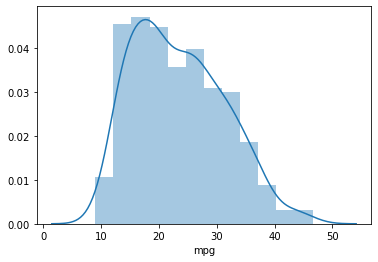

In [25]:
sns.distplot(data['mpg'])

In [26]:
print("Skewness: %f" % data['mpg'].skew())
print("Kurtosis: %f" % data['mpg'].kurt())

Skewness: 0.457092
Kurtosis: -0.515993


Using our seaborn tool we can look at mpg:

- Slight of 0,.45
- Kurtosis of -0.51

#### Lets visualise some relationships between these data points, but before we do, we need to scale them to same the same range of [0,1]
In order to do so, lets define a function scale:

In [27]:
def scale(a):
    b = (a-a.min())/(a.max()-a.min())
    return b

In [28]:
data_scale = data.copy()

In [29]:
data_scale ['disp'] = scale(data_scale['disp'])
data_scale['hp'] = scale(data_scale['hp'])
data_scale ['acc'] = scale(data_scale['acc'])
data_scale ['wt'] = scale(data_scale['wt'])
data_scale['mpg'] = scale(data_scale['mpg'])

data_scale.head()

mpg  cyl      disp        hp        wt  \
car_name                                                                 
chevrolet chevelle malibu  0.239362    8  0.617571  0.456522  0.536150   
buick skylark 320          0.159574    8  0.728682  0.646739  0.589736   
plymouth satellite         0.239362    8  0.645995  0.565217  0.516870   
amc rebel sst              0.186170    8  0.609819  0.565217  0.516019   
ford torino                0.212766    8  0.604651  0.510870  0.520556   

                                acc  yr  origin  
car_name                                         
chevrolet chevelle malibu  0.238095  70       1  
buick skylark 320          0.208333  70       1  
plymouth satellite         0.178571  70       1  
amc rebel sst              0.238095  70       1  
ford torino                0.148810  70       1

##### Observation:
All our data is now scaled to the same range of [0,1]. This will help us visualize data better. We used a copy of the original data-set for this as we will use the data-set later when we build regression models

In [30]:
data['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])
data_scale['Country_code'] = data.origin.replace([1,2,3],['USA','Europe','Japan'])

data_scale.head()

mpg  cyl      disp        hp        wt  \
car_name                                                                 
chevrolet chevelle malibu  0.239362    8  0.617571  0.456522  0.536150   
buick skylark 320          0.159574    8  0.728682  0.646739  0.589736   
plymouth satellite         0.239362    8  0.645995  0.565217  0.516870   
amc rebel sst              0.186170    8  0.609819  0.565217  0.516019   
ford torino                0.212766    8  0.604651  0.510870  0.520556   

                                acc  yr  origin Country_code  
car_name                                                      
chevrolet chevelle malibu  0.238095  70       1          USA  
buick skylark 320          0.208333  70       1          USA  
plymouth satellite         0.178571  70       1          USA  
amc rebel sst              0.238095  70       1          USA  
ford torino                0.148810  70       1          USA

#### Lets look at MPG's relation to categories

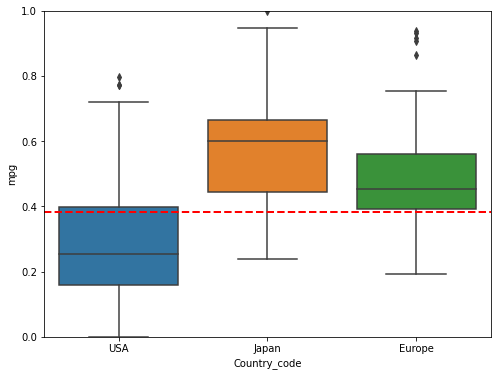

In [31]:
var = 'Country_code'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

The red line marks the average of the set. From the above plot we can observe:
- Majority of the cars from USA (almost 75%) have MPG below global average.
- Majority of the cars from Japan and Europe have MPG above global average.


#### Let's look at the year wise distribution of MPG

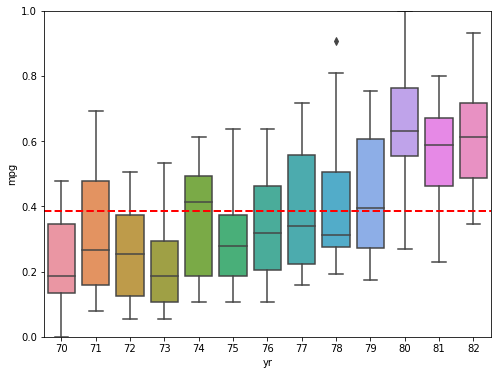

In [32]:
var = 'yr'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

#### MPG distribution for cylinders

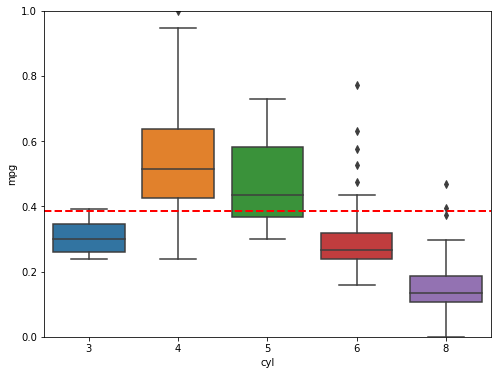

In [33]:
var = 'cyl'
data_plt = pd.concat([data_scale['mpg'], data_scale[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

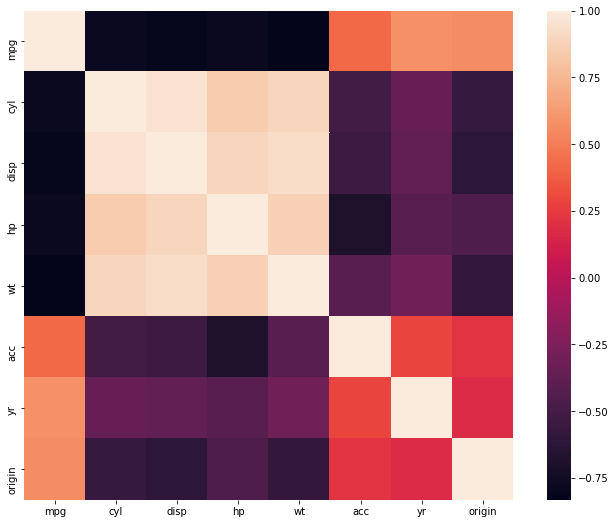

In [34]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

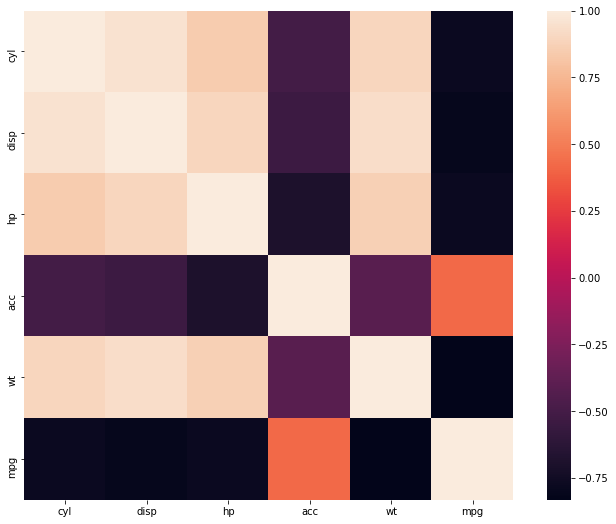

In [35]:
factors = ['cyl','disp','hp','acc','wt','mpg']
corrmat = data[factors].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, square=True);

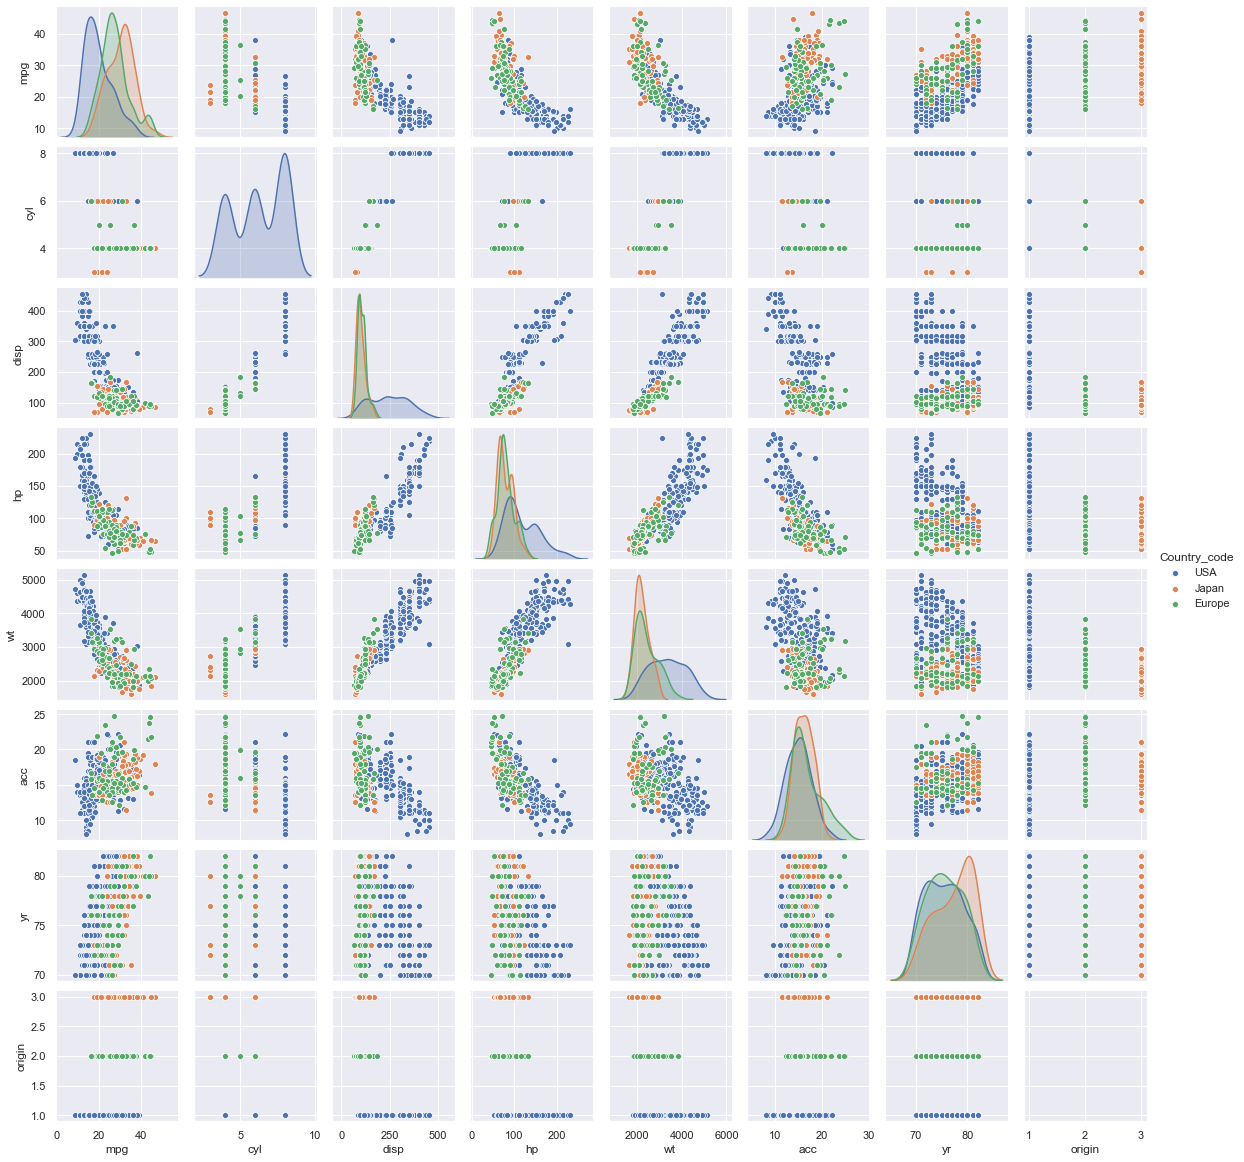

In [36]:
#scatterplot
sns.set()
sns.pairplot(data, size = 2.0,hue ='Country_code')
plt.show()

#### So far we have seen the data
So far, we have seen the data to get a feel for it, we saw the spread of the desired variable MPG along the various discrete variables, namely, Origin, Year of Manufacturing or Model and Cylinders.
Now lets extract an additional discrete variable company name and add it to this data. We will use regular expressions and str.extract() function of pandas data-frame to make this new column

In [37]:
data.index

Index(['chevrolet chevelle malibu', 'buick skylark 320', 'plymouth satellite',
       'amc rebel sst', 'ford torino', 'ford galaxie 500', 'chevrolet impala',
       'plymouth fury iii', 'pontiac catalina', 'amc ambassador dpl',
       ...
       'chrysler lebaron medallion', 'ford granada l', 'toyota celica gt',
       'dodge charger 2.2', 'chevrolet camaro', 'ford mustang gl', 'vw pickup',
       'dodge rampage', 'ford ranger', 'chevy s-10'],
      dtype='object', name='car_name', length=392)

##### Observation:
As we can see the index of the data frame contains model name along with the company name. Now lets use regular expressions to quickly extract the company names. As we can see the index is in format 'COMPANY_NAME - SPACE -MODEL - SPACE -VARIANT' and so regular expressions will make it an easy task.

In [38]:
data[data.index.str.contains('subaru')].index.str.replace('(.*)', 'subaru dl')

Index(['subaru dlsubaru dl', 'subaru dlsubaru dl', 'subaru dlsubaru dl',
       'subaru dlsubaru dl'],
      dtype='object', name='car_name')

In [39]:
data['Company_Name'] = data.index.str.extract('(^.*?)\s')

That does it, almost, we can see NaN so some text was not extracted, this may be due to difference in formatting. We ca also see that some companies are named differently and also some spelling mistakes, lets correct these.

In [40]:
data['Company_Name'] = data['Company_Name'].replace(['volkswagen','vokswagen','vw'],'VW')
data['Company_Name'] = data['Company_Name'].replace('maxda','mazda')
data['Company_Name'] = data['Company_Name'].replace('toyouta','toyota')
data['Company_Name'] = data['Company_Name'].replace('mercedes','mercedes-benz')
data['Company_Name'] = data['Company_Name'].replace('nissan','datsun')
data['Company_Name'] = data['Company_Name'].replace('capri','ford')
data['Company_Name'] = data['Company_Name'].replace(['chevroelt','chevy'],'chevrolet')
data['Company_Name'].fillna(value = 'subaru',inplace=True)  ## Strin methords will not work on null values so we use fillna()

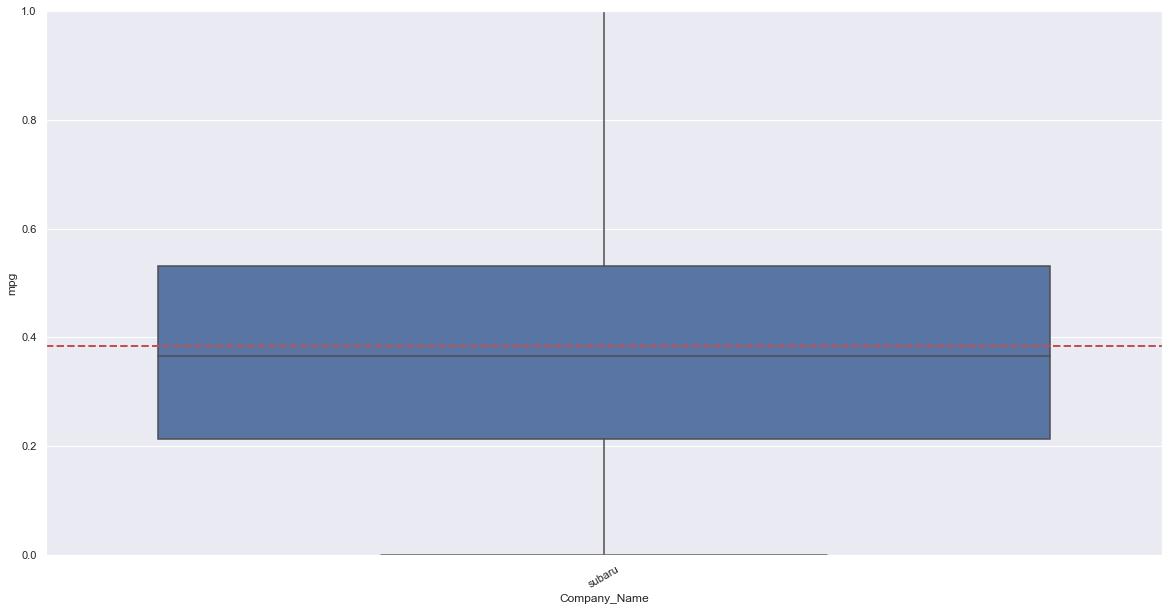

In [41]:
var = 'Company_Name'
data_plt = pd.concat([data_scale['mpg'], data[var]], axis=1)
f, ax = plt.subplots(figsize=(20,10))
fig = sns.boxplot(x=var, y="mpg", data=data_plt)
fig.set_xticklabels(ax.get_xticklabels(),rotation=30)
fig.axis(ymin=0, ymax=1)
plt.axhline(data_scale.mpg.mean(),color='r',linestyle='dashed',linewidth=2)

In [42]:
data.Company_Name.isnull().any()

False

#### Let's look at some extremes:

In [43]:
var = 'mpg'
data[data[var]== data[var].min()]

mpg  cyl   disp     hp    wt   acc  yr  origin Country_code  \
car_name                                                                
hi 1200d  9.0    8  304.0  193.0  4732  18.5  70       1          USA   

         Company_Name  
car_name               
hi 1200d       subaru

In [44]:
data[data[var]== data[var].max()]

mpg  cyl  disp    hp    wt   acc  yr  origin Country_code  \
car_name                                                                
mazda glc  46.6    4  86.0  65.0  2110  17.9  80       3        Japan   

          Company_Name  
car_name                
mazda glc       subaru

In [45]:
var='disp'
data[data[var]== data[var].min()]

mpg  cyl  disp    hp    wt   acc  yr  origin Country_code  \
car_name                                                               
fiat 128  29.0    4  68.0  49.0  1867  19.5  73       2       Europe   

         Company_Name  
car_name               
fiat 128       subaru

In [46]:
data[data[var]== data[var].max()]

mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                    
pontiac catalina          14.0    8  455.0  225.0  4425  10.0  70       1   
buick estate wagon (sw)   14.0    8  455.0  225.0  3086  10.0  70       1   
buick electra 225 custom  12.0    8  455.0  225.0  4951  11.0  73       1   

                         Country_code Company_Name  
car_name                                            
pontiac catalina                  USA       subaru  
buick estate wagon (sw)           USA       subaru  
buick electra 225 custom          USA       subaru

In [47]:
var = 'hp'
data[data[var]== data[var].min()]

mpg  cyl  disp    hp    wt   acc  yr  origin  \
car_name                                                                      
volkswagen 1131 deluxe sedan  26.0    4  97.0  46.0  1835  20.5  70       2   
volkswagen super beetle       26.0    4  97.0  46.0  1950  21.0  73       2   

                             Country_code Company_Name  
car_name                                                
volkswagen 1131 deluxe sedan       Europe       subaru  
volkswagen super beetle            Europe       subaru

In [48]:
data[data[var]== data[var].max()]

mpg  cyl   disp     hp    wt  acc  yr  origin  \
car_name                                                             
pontiac grand prix  16.0    8  400.0  230.0  4278  9.5  73       1   

                   Country_code Company_Name  
car_name                                      
pontiac grand prix          USA       subaru

In [49]:
var='wt'
data[data[var]== data[var].min()]

mpg  cyl  disp    hp    wt   acc  yr  origin Country_code  \
car_name                                                                  
datsun 1200  35.0    4  72.0  69.0  1613  18.0  71       3        Japan   

            Company_Name  
car_name                  
datsun 1200       subaru

In [50]:
data[data[var]== data[var].max()]

mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                               
pontiac safari (sw)  13.0    8  400.0  175.0  5140  12.0  71       1   

                    Country_code Company_Name  
car_name                                       
pontiac safari (sw)          USA       subaru

In [51]:
var='acc'
data[data[var]== data[var].min()]

mpg  cyl   disp     hp    wt  acc  yr  origin  \
car_name                                                             
plymouth 'cuda 340  14.0    8  340.0  160.0  3609  8.0  70       1   

                   Country_code Company_Name  
car_name                                      
plymouth 'cuda 340          USA       subaru

In [52]:
data[data[var]== data[var].max()]

mpg  cyl   disp    hp    wt   acc  yr  origin Country_code  \
car_name                                                                   
peugeot 504  27.2    4  141.0  71.0  3190  24.8  79       2       Europe   

            Company_Name  
car_name                  
peugeot 504       subaru

Now that we have looked at the distribution of the data along discrete variables and we saw some scatter-plots using the seaborn pairplot. Now let's try to find some logical causation for variations in mpg. We will use the lmplot() function of seaborn with scatter set as true. This will help us in understanding the trends in these relations. We can later verify what we see with ate correlation heat map to find if the conclusions drawn are correct. We prefer lmplot() over regplot() for its ability to plot categorical data better. We will split the regressions for different origin countries.

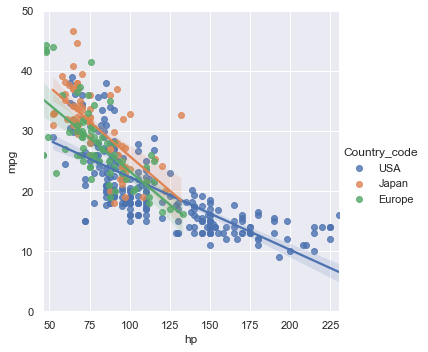

In [53]:
var = 'hp'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

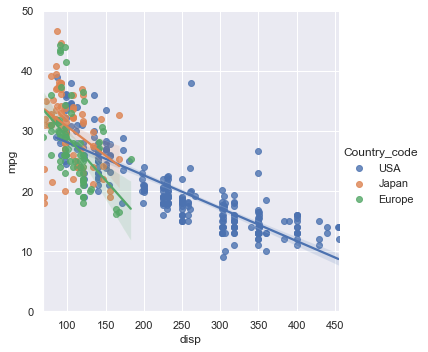

In [54]:
var = 'disp'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

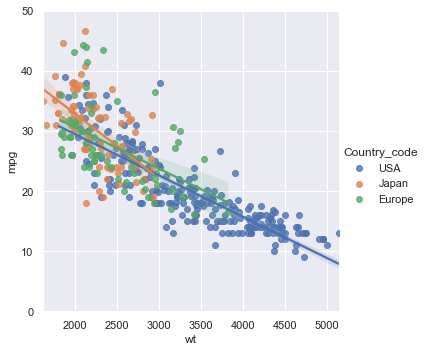

In [55]:
var = 'wt'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

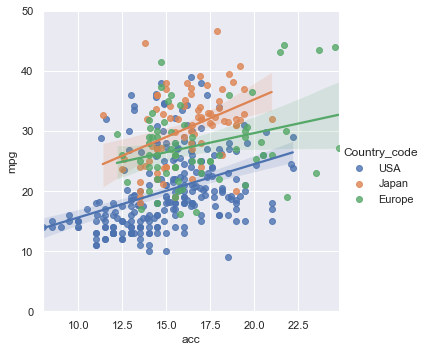

In [56]:
var = 'acc'
plot = sns.lmplot(var,'mpg',data=data,hue='Country_code')
plot.set(ylim = (0,50))

In [57]:
data['Power_to_weight'] = ((data.hp*0.7457)/data.wt)
data.sort_values(by='Power_to_weight',ascending=False ).head()

mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                   
buick estate wagon (sw)  14.0    8  455.0  225.0  3086  10.0  70       1   
pontiac grand prix       16.0    8  400.0  230.0  4278   9.5  73       1   
pontiac catalina         14.0    8  455.0  225.0  4425  10.0  70       1   
bmw 2002                 26.0    4  121.0  113.0  2234  12.5  70       2   
chevrolet impala         14.0    8  454.0  220.0  4354   9.0  70       1   

                        Country_code Company_Name  Power_to_weight  
car_name                                                            
buick estate wagon (sw)          USA       subaru         0.054369  
pontiac grand prix               USA       subaru         0.040091  
pontiac catalina                 USA       subaru         0.037917  
bmw 2002                      Europe       subaru         0.037719  
chevrolet impala                 USA       subaru         0.037679

### Our journey so far:
So far, we have a looked at our data using various pandas methods and visualized it using seaborn package. We looked at

#### MPGs relation with discrete variables
- MPG distribution over given years if manufacturing
> MPG distribution by country of origin AND 
> MPG distribution by number of cylinders

#### MPGs relation to other continuous variables:
- Pair wise scatter plot of all variables in data. ### Correlation
- We looked at the correlation heat map of all columns in our data


### Lets look at some regression models:
Now that we know what our data looks like, lets use some machine learning models to predict the value of MPG given the values of the factors. We will use pythons scikit learn to train test and tune various regression models on our data and compare the results. We shall use the following regression models:-

- Linear Regression

- GBM Regression

In [58]:
data.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                     
chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
buick skylark 320          15.0    8  350.0  165.0  3693  11.5  70       1   
plymouth satellite         18.0    8  318.0  150.0  3436  11.0  70       1   
amc rebel sst              16.0    8  304.0  150.0  3433  12.0  70       1   
ford torino                17.0    8  302.0  140.0  3449  10.5  70       1   

                          Country_code Company_Name  Power_to_weight  
car_name                                                              
chevrolet chevelle malibu          USA       subaru         0.027666  
buick skylark 320                  USA       subaru         0.033317  
plymouth satellite                 USA       subaru         0.032554  
amc rebel sst                      USA       subaru         0.032582  
ford torino                        USA       subaru         0.030269

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [60]:
factors = ['cyl','disp','hp','acc','wt','origin','yr']
X = pd.DataFrame(data[factors].copy())
y = data['mpg'].copy()

X = StandardScaler().fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.33,random_state=324)
X_train.shape[0] == y_train.shape[0]

True

In [61]:
regressor = LinearRegression()

In [62]:
regressor.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [63]:
regressor.fit(X_train,y_train)

LinearRegression()

In [64]:
y_predicted = regressor.predict(X_test)

In [65]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted))
rmse

3.486729614901561

In [66]:
gb_regressor = GradientBoostingRegressor(n_estimators=4000)
gb_regressor.fit(X_train,y_train)

GradientBoostingRegressor(n_estimators=4000)

In [67]:
gb_regressor.get_params()

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 4000,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [68]:
y_predicted_gbr = gb_regressor.predict(X_test)

In [69]:
rmse_bgr = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr))
rmse_bgr

2.6209233688303857

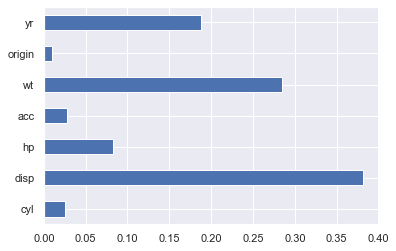

In [70]:
fi= pd.Series(gb_regressor.feature_importances_,index=factors)
fi.plot.barh()

Good, so our initial models work well, but these metrics were performed on test set and cannot be used for tuning the model, as that will cause bleeding of test data into training data, hence, we will use K-Fold to create Cross Validation sets and use grid search to tune the model.

In [71]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(data[factors])

PCA(n_components=2)

In [72]:
pca.explained_variance_ratio_

array([0.99756151, 0.0020628 ])

In [73]:
pca1 = pca.components_[0]
pca2 = pca.components_[1]

In [74]:
transformed_data = pca.transform(data[factors])

In [75]:
pc1 = transformed_data[:,0]
pc2 = transformed_data[:,1]

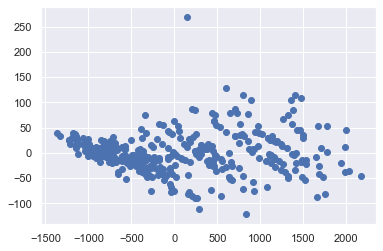

In [76]:
plt.scatter(pc1,pc2)

In [77]:
c = pca.inverse_transform(transformed_data[(transformed_data[:,0]>0 )& (transformed_data[:,1]>250)])

In [78]:
factors

['cyl', 'disp', 'hp', 'acc', 'wt', 'origin', 'yr']

In [79]:
c

array([[9.32016159e+00, 4.65727261e+02, 1.90441442e+02, 5.95699243e+00,
        3.08611199e+03, 6.23550659e-01, 6.93571097e+01]])

In [80]:
data[(data['yr'] == 70 )&( data.disp>400)]

mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                   
ford galaxie 500         15.0    8  429.0  198.0  4341  10.0  70       1   
chevrolet impala         14.0    8  454.0  220.0  4354   9.0  70       1   
plymouth fury iii        14.0    8  440.0  215.0  4312   8.5  70       1   
pontiac catalina         14.0    8  455.0  225.0  4425  10.0  70       1   
buick estate wagon (sw)  14.0    8  455.0  225.0  3086  10.0  70       1   

                        Country_code Company_Name  Power_to_weight  
car_name                                                            
ford galaxie 500                 USA       subaru         0.034013  
chevrolet impala                 USA       subaru         0.037679  
plymouth fury iii                USA       subaru         0.037181  
pontiac catalina                 USA       subaru         0.037917  
buick estate wagon (sw)          USA       subaru         0.054369

The exceptionally far away point seems to be the Buick estate wagon. This seems logical as the weight data given in the data set seems to be incorrect. The weight for the vehicle is given to be 3086 lbs, however, on research it can be found that the car weight is 4727-4775 lbs. 

- Now we use K-fold to create a new K-fold object called 'cv_sets' that contains index values for training and cross validation and use these sets in GridSearchCV to tune our model so that it does not over fit or under fit the data
- We will also define a dictionary called 'params' with the hyper-parameters we want to tune
- Lastly we define 'grid' which is a GridSearchCV object which we will provide the parameters to tune and the K folds of data created by using the Kfold in sklearn.model_selection

In [81]:
cv_sets = KFold(n_splits=10, shuffle= True,random_state=100)
params = {'n_estimators' : list(range(40,61)),
         'max_depth' : list(range(1,10)),
         'learning_rate' : [0.1,0.2,0.3] }
grid = GridSearchCV(gb_regressor, params,cv=cv_sets,n_jobs=4)

In [82]:
grid = grid.fit(X_train, y_train)

In [83]:
grid.best_estimator_

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=51)

In [84]:
gb_regressor_t = grid.best_estimator_

In [85]:
gb_regressor_t.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.3, max_depth=2, n_estimators=51)

In [86]:
y_predicted_gbr_t = gb_regressor_t.predict(X_test)

In [87]:
rmse = sqrt(mean_squared_error(y_true=y_test,y_pred=y_predicted_gbr_t))
rmse

2.6871109278704797

In [88]:
data.duplicated().any()

False

### Machine Learning (K-Means and Hierarchial Clustering)


### K-Means Clustering:

In [89]:
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [90]:
data['Country_code'].unique()

array(['USA', 'Japan', 'Europe'], dtype=object)

In [91]:
dataScaled=data.iloc[:,:-3]

#sns.pairplot(dataScaled,diag_kind='kde')
dataScaled.head()

mpg  cyl   disp     hp    wt   acc  yr  origin
car_name                                                                  
chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1
buick skylark 320          15.0    8  350.0  165.0  3693  11.5  70       1
plymouth satellite         18.0    8  318.0  150.0  3436  11.0  70       1
amc rebel sst              16.0    8  304.0  150.0  3433  12.0  70       1
ford torino                17.0    8  302.0  140.0  3449  10.5  70       1

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

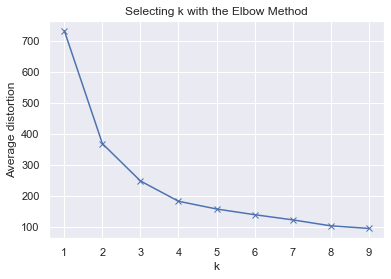

In [92]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataScaled)
    prediction=model.predict(dataScaled)
    meanDistortions.append(sum(np.min(cdist(dataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

##### Important: The bend is very clearly coming at 4 clusters (k = 4)
After the graph reaches k=4, it begins to flatten, and hence k=4 is the optimum no. of clusters to be selected

In [93]:
final_model=KMeans(4)
final_model.fit(dataScaled)
prediction=final_model.predict(dataScaled)

#Append the prediction 
dataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
dataScaled.head()

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                     
chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
buick skylark 320          15.0    8  350.0  165.0  3693  11.5  70       1   
plymouth satellite         18.0    8  318.0  150.0  3436  11.0  70       1   
amc rebel sst              16.0    8  304.0  150.0  3433  12.0  70       1   
ford torino                17.0    8  302.0  140.0  3449  10.5  70       1   

                           GROUP  
car_name                          
chevrolet chevelle malibu      0  
buick skylark 320              0  
plymouth satellite             0  
amc rebel sst                  0  
ford torino                    0

#### Observation:
Analyze the distribution of the data among the clusters (K = 4). One of the most informative visual tool is boxplot.

In [94]:
dataKMeansClust = dataScaled.groupby(['GROUP'])
dataKMeansClust.mean()

mpg       cyl        disp          hp           wt        acc  \
GROUP                                                                        
0      18.352809  6.640449  259.966292  116.808989  3484.483146  15.675281   
1      30.736765  3.977941   98.128676   72.948529  2107.705882  16.601471   
2      13.991304  8.000000  356.536232  165.130435  4366.594203  13.042029   
3      24.610204  4.704082  154.346939   94.295918  2746.438776  15.708163   

              yr    origin  
GROUP                       
0      75.584270  1.112360  
1      76.625000  2.176471  
2      73.608696  1.000000  
3      77.112245  1.571429

0    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
1    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
2    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
3    [[AxesSubplot(0.1,0.679412;0.235294x0.220588),...
dtype: object

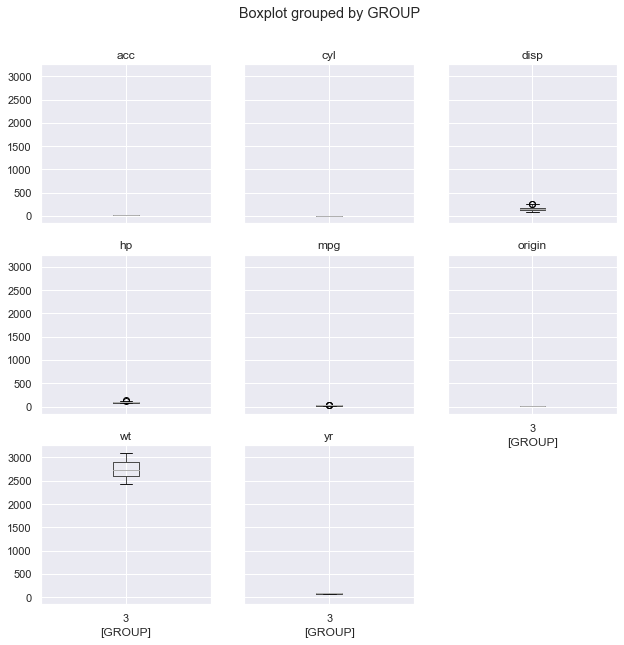

In [95]:
dataKMeansClust.boxplot(by='GROUP', layout = (2,4),figsize=(10,10))

In [107]:
originalData = dataScaled
dataScaled.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                     
chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
buick skylark 320          15.0    8  350.0  165.0  3693  11.5  70       1   
plymouth satellite         18.0    8  318.0  150.0  3436  11.0  70       1   
amc rebel sst              16.0    8  304.0  150.0  3433  12.0  70       1   
ford torino                17.0    8  302.0  140.0  3449  10.5  70       1   

                           GROUP  
car_name                          
chevrolet chevelle malibu      0  
buick skylark 320              0  
plymouth satellite             0  
amc rebel sst                  0  
ford torino                    0

In [98]:
# Change categorical data to number 0-2

datac = data.iloc[:,:-2]
datac["Country_code"] = pd.Categorical(datac["Country_code"])
datac["Country_code"] = datac["Country_code"].cat.codes
# Change dataframe to numpy matrix
data1 = datac.values[:, 0:7]
category = df.values[:, 7]
datac.head()

mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                     
chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
buick skylark 320          15.0    8  350.0  165.0  3693  11.5  70       1   
plymouth satellite         18.0    8  318.0  150.0  3436  11.0  70       1   
amc rebel sst              16.0    8  304.0  150.0  3433  12.0  70       1   
ford torino                17.0    8  302.0  140.0  3449  10.5  70       1   

                           Country_code  
car_name                                 
chevrolet chevelle malibu             2  
buick skylark 320                     2  
plymouth satellite                    2  
amc rebel sst                         2  
ford torino                           2

In [ ]:
# Number of clusters
k = 4
# Number of training data
n = data1.shape[0] - 1
# Number of features in the data
c = data1.shape[1]

# Generate random centers, here we use sigma and mean to ensure it represent the whole data
mean = np.mean(data1, axis = 0)
std = np.std(data1, axis = 0)
centers = np.random.randn(k,c)*std + mean

# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n-1):
    plt.scatter(data1[i, 0], data1[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers[:,0], centers[:,1], marker='*', c='g', s=150)

In [ ]:
centers_old = np.zeros(centers.shape) # to store old centers
centers_new = deepcopy(centers) # Store new centers

data1.shape
clusters = np.zeros(n)
distances = np.zeros((n,k))

error = np.linalg.norm(centers_new - centers_old)

# When, after an update, the estimate of that center stays the same, exit loop
while error != 0:
    # Measure the distance to every center
    for i in range(k):
        distances[:,i] = np.linalg.norm(data1 - centers[i], axis=1)
    # Assign all training data to closest center
    clusters = np.argmin(distances, axis = 1)
    
    centers_old = deepcopy(centers_new)
    # Calculate mean for every cluster and update the center
    for i in range(k):
        centers_new[i] = np.mean(data1[clusters == i], axis=0)
    error = np.linalg.norm(centers_new - centers_old)
centers_new    

In [ ]:
# Plot the data and the centers generated as random
colors=['orange', 'blue', 'green']
for i in range(n):
    plt.scatter(data1[i, 0], data1[i,1], s=7, color = colors[int(category[i])])
plt.scatter(centers_new[:,0], centers_new[:,1], marker='*', c='g', s=150)

### Hierarchial Clustering

In [108]:
del originalData["GROUP"]
originalDataScaled = originalData.apply(zscore)
originalDataScaled.head()

mpg       cyl      disp        hp        wt  \
car_name                                                                      
chevrolet chevelle malibu -0.698638  1.483947  1.077290  0.664133  0.620540   
buick skylark 320         -1.083498  1.483947  1.488732  1.574594  0.843334   
plymouth satellite        -0.698638  1.483947  1.182542  1.184397  0.540382   
amc rebel sst             -0.955212  1.483947  1.048584  1.184397  0.536845   
ford torino               -0.826925  1.483947  1.029447  0.924265  0.555706   

                                acc        yr    origin  
car_name                                                 
chevrolet chevelle malibu -1.285258 -1.625315 -0.716641  
buick skylark 320         -1.466724 -1.625315 -0.716641  
plymouth satellite        -1.648189 -1.625315 -0.716641  
amc rebel sst             -1.285258 -1.625315 -0.716641  
ford torino               -1.829655 -1.625315 -0.716641

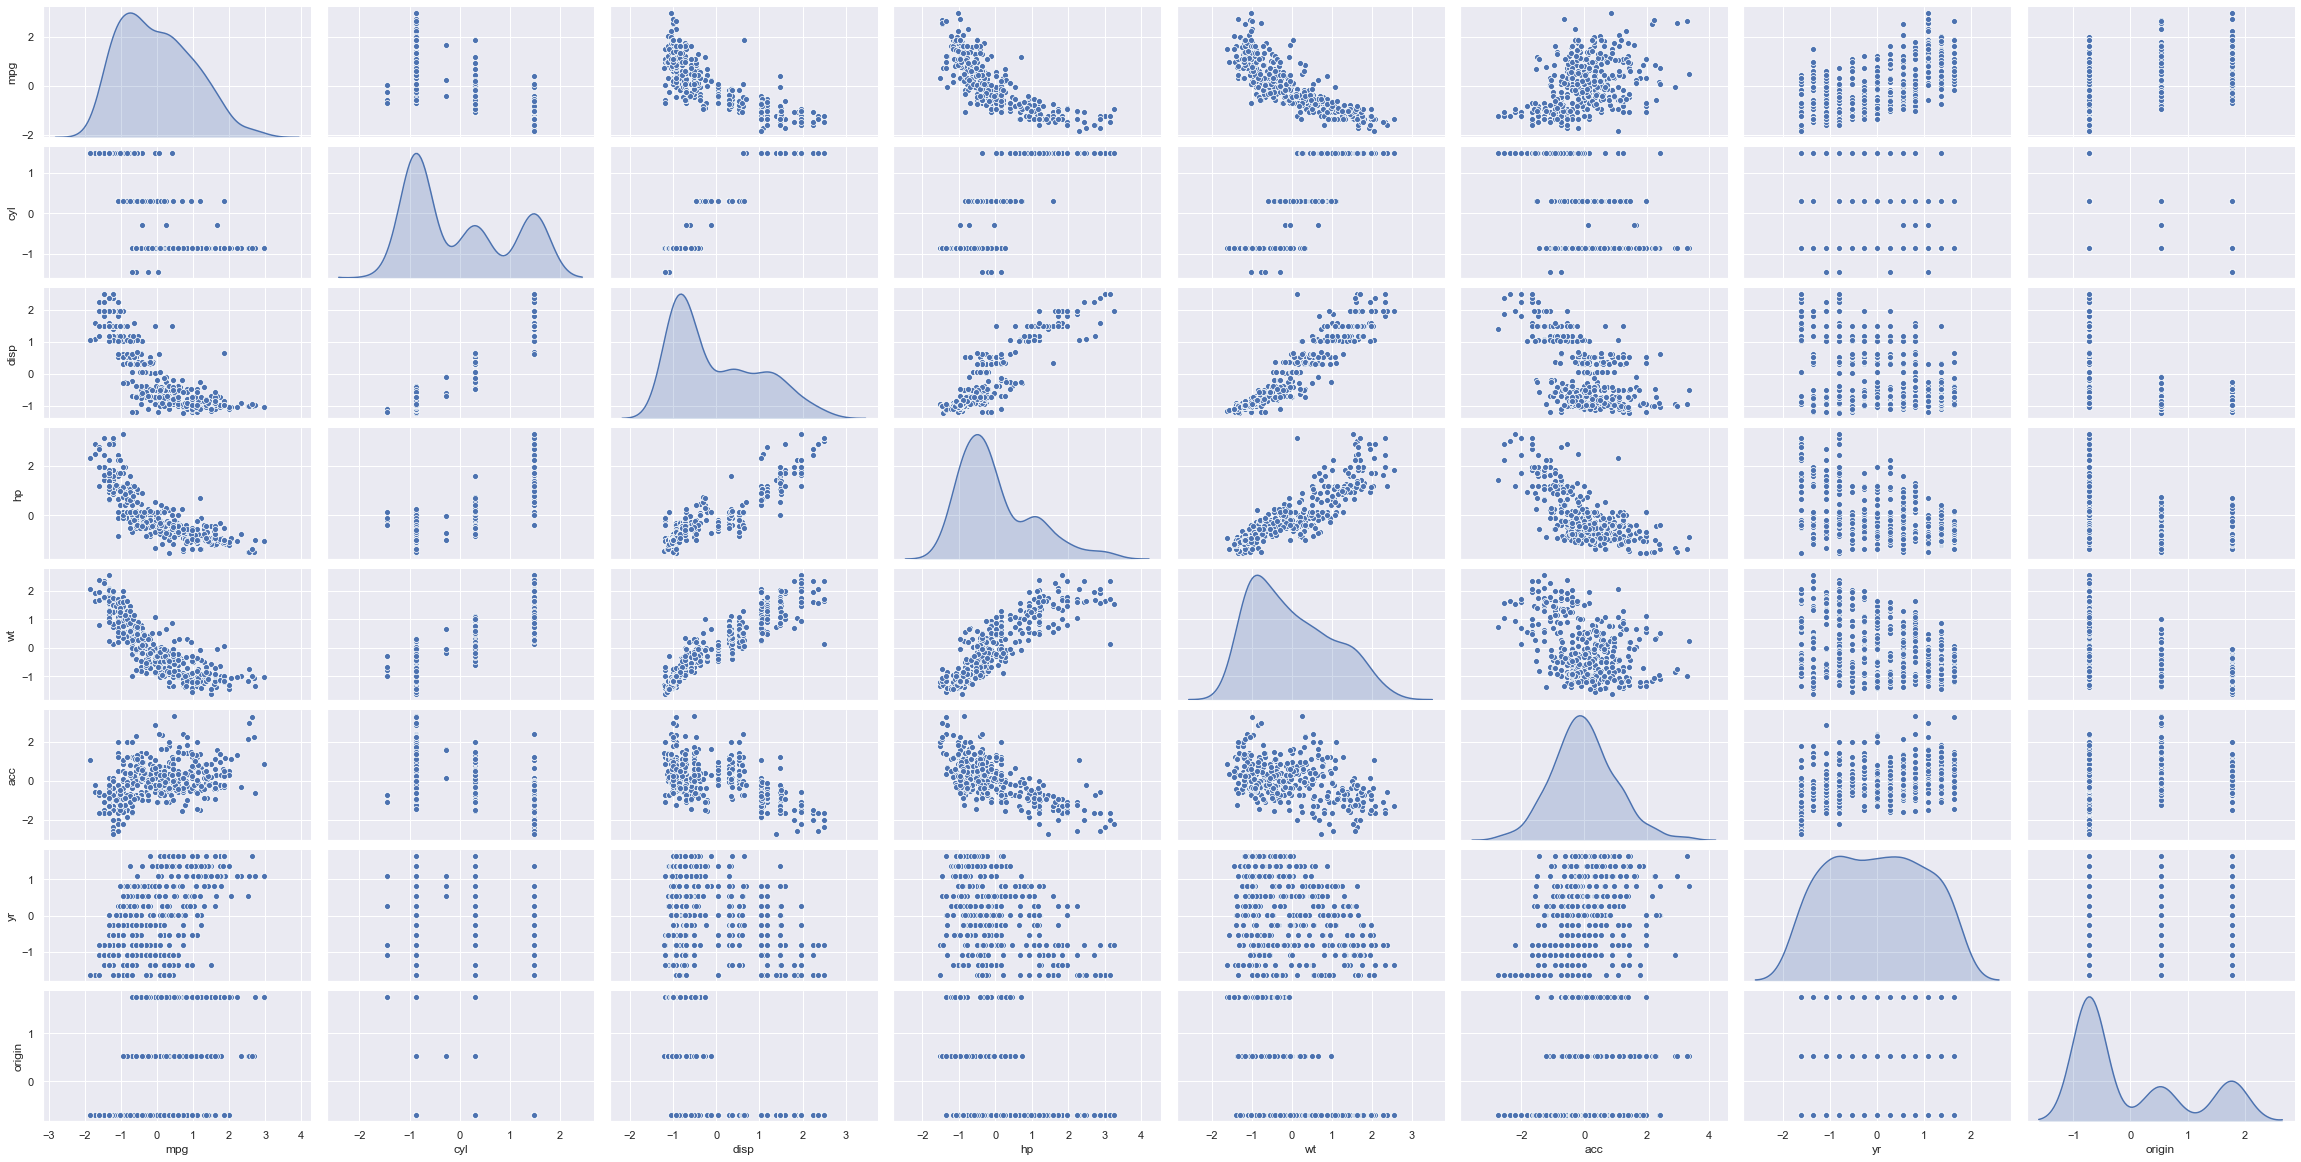

In [109]:
#importing seaborn for statistical plots
sns.pairplot(originalDataScaled, height=2,aspect=2 , diag_kind='kde')

In [110]:
from sklearn.cluster import AgglomerativeClustering 

In [111]:
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='average')

In [112]:
model.fit(originalDataScaled)

AgglomerativeClustering(linkage='average', n_clusters=4)

In [113]:
originalData['labels'] = model.labels_
originalData.head(10)

mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                     
chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
buick skylark 320          15.0    8  350.0  165.0  3693  11.5  70       1   
plymouth satellite         18.0    8  318.0  150.0  3436  11.0  70       1   
amc rebel sst              16.0    8  304.0  150.0  3433  12.0  70       1   
ford torino                17.0    8  302.0  140.0  3449  10.5  70       1   
ford galaxie 500           15.0    8  429.0  198.0  4341  10.0  70       1   
chevrolet impala           14.0    8  454.0  220.0  4354   9.0  70       1   
plymouth fury iii          14.0    8  440.0  215.0  4312   8.5  70       1   
pontiac catalina           14.0    8  455.0  225.0  4425  10.0  70       1   
amc ambassador dpl         15.0    8  390.0  190.0  3850   8.5  70       1   

                           labels  
car_name                           
chevrolet chevelle malibu       2  
buick skylark 320               2  
plymouth satellite              2  
amc rebel sst                   2  
ford torino                     2  
ford galaxie 500                2  
chevrolet impala                2  
plymouth fury iii               2  
pontiac catalina                2  
amc ambassador dpl              2

In [114]:
originalDataClust = originalData.groupby(['labels'])

In [115]:
originalDataClust.mean()

mpg       cyl        disp          hp           wt        acc  \
labels                                                                        
0       19.440506  6.101266  224.987342  100.848101  3259.000000  16.567089   
1       28.802010  4.045226  111.776382   80.633166  2311.065327  16.121608   
2       14.684000  7.980000  345.470000  160.400000  4121.560000  12.702000   
3       32.500000  4.285714  117.500000   64.214286  2692.428571  21.785714   

               yr    origin  
labels                       
0       75.645570  1.189873  
1       77.010050  2.005025  
2       73.740000  1.000000  
3       79.214286  1.785714

In [116]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  #Pairwise distribution between data points

In [117]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(originalDataScaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(originalDataScaled))

c

0.6987370414272304

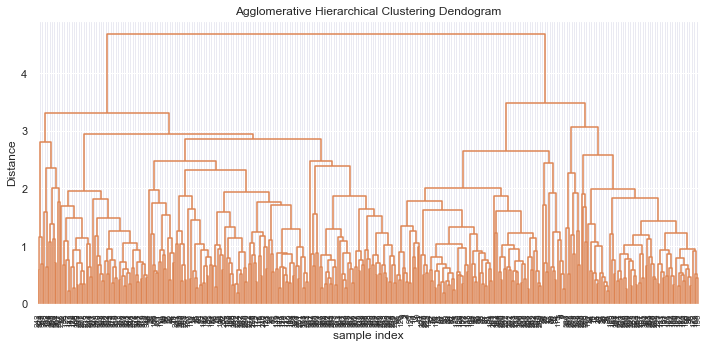

In [118]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold = 40, leaf_font_size=8. )
plt.tight_layout()

In [119]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(originalDataScaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(originalDataScaled))

c

0.7385732265612737

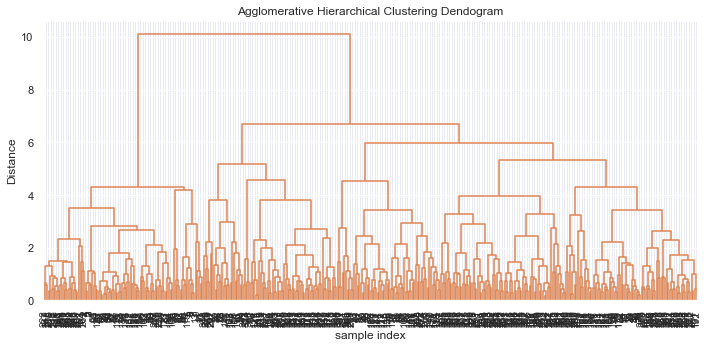

In [120]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=90,  leaf_font_size=10. )
plt.tight_layout()

In [121]:
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

Z = linkage(originalDataScaled, metric='euclidean', method='ward')
c, coph_dists = cophenet(Z , pdist(originalDataScaled))

c

0.6824190899807201

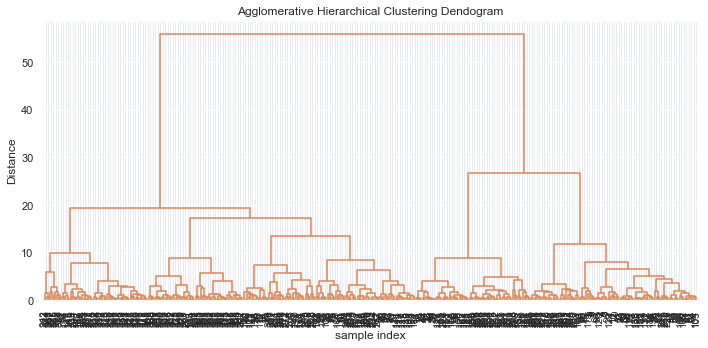

In [122]:
plt.figure(figsize=(10, 5))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.,color_threshold=600,  leaf_font_size=10. )
plt.tight_layout()

##### Observation:
After examining the cophenet coefficients of the 3 types of dendrograms (Kind = 'average', kind = 'euclidean', kind = 'ward') which are respectively 0.6987370414272304, 0.7385732265612737, 0.6824190899807201, we observe the number of clusters in them are 4, 10, 55 respectively. 
We can also closely notice that the cophenet coefficients are very similar for Kind = 'average' and kind = 'euclidean', with a significant difference in number of clusters (4 and 10), and hence we can observe the k=4 clusters is optimum!

### Difference between K-Means Clustering and Hierarchial Clustering:
##### K-Means Clustering:
- k-means, using a pre-specified  number of clusters, the method  assigns records to each cluster to  find the mutually exclusive cluster  of spherical shape based on distance.
- K Means clustering needed advance knowledge of K i.e. no. of clusters one want to divide your data.
- One can use median or mean as a cluster centre to represent each cluster.
- Methods used are normally less computationally intensive and are suited with very large datasets.
- In K Means clustering, since one  start with random choice of  clusters, the results produced by running the algorithm many times may differ.
- K- means clustering a simply a division of the set of data  objects into non- overlapping subsets (clusters) such that each  data object is in exactly one subset).
- K Means clustering is found to work well when the structure of the clusters is hyper spherical (like circle in 2D,  sphere in 3D).

Advantages: 
- Convergence is guarenteed
- Specialized to clusters of different sizes and shapes.

Disadvantages:
- K-value is difficult to predict
- Didn't work well with global cluster

##### Hierarchial Clustering:
- Hierarchical methods can be  either divisive or agglomerative.
- In hierarchical clustering  one can stop at any number of clusters, one find appropriate by interpreting  the dendrogram.
- Agglomerative methods  begin with ‘n’ clusters and  sequentially combine similar clusters until only one cluster is obtained.
- Divisive methods work in the opposite direction, beginning with one cluster that includes all the records and Hierarchical methods are  especially useful when the target is to arrange the clusters  into a natural hierarchy.
- In Hierarchical Clustering, results are reproducible in Hierarchical clustering
- A hierarchical clustering is a set of nested clusters that are arranged as a tree.
- Hierarchical clustering don’t work  as well as, k means when the  shape of the clusters is hyper  spherical.

Advantages:
- Ease of handling of any forms of similarity or distance.
- Consequently, applicability to any attributes types.

Disadvantages:
- Hierarchical clustering requires the computation and storage of an n×n  distance matrix. For very large datasets, this can be expensive and slow

### Answering below questions based on outcomes of using ML based methods:
> Q1. Mention how many optimal clusters are present in the data and what could be the possible reason behind it.

Answer 1: 
Determining the optimal number of clusters in a data set is a fundamental issue in partitioning clustering, such as k-means clustering, which requires the user to specify the number of clusters k to be generated. Unfortunately, there is no definitive answer to this question. The optimal number of clusters is somehow subjective and depends on the method used for measuring similarities and the parameters used for partitioning.
A simple and popular solution consists of inspecting the dendrogram produced using hierarchical clustering to see if it suggests a particular number of clusters. Unfortunately, this approach is also subjective. Below I’ll describe different methods for determining the optimal number of clusters for k-means, k-medoids (PAM) and hierarchical clustering.

##### These methods include direct methods and statistical testing methods:

- Direct methods: consists of optimizing a criterion, such as the within cluster sums of squares or the average silhouette. The corresponding methods are named elbow and silhouette methods, respectively.

#### Elbow Method:

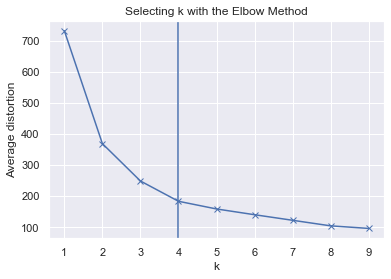

In [123]:
#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(dataScaled)
    prediction=model.predict(dataScaled)
    meanDistortions.append(sum(np.min(cdist(dataScaled, model.cluster_centers_, 'euclidean'), axis=1)) / dataScaled.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')
plt.axvline(4)

##### Observation:
From the elbow method above and after calculating the silhouette coefficient below, we can observe that the optimum number of clusters is 4.

In [124]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

km = KMeans(n_clusters=4, random_state=42)

km.fit_predict(dataScaled)

score = silhouette_score(dataScaled, km.labels_, metric='euclidean')
#
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.579


>Q2. Use linear regression model on different clusters separately and print the coefficients of the models individually

In [130]:
#Bringing back 'GROUP' column
final_model=KMeans(4)
final_model.fit(dataScaled)
prediction=final_model.predict(dataScaled)

#Append the prediction 
dataScaled["GROUP"] = prediction
print("Groups Assigned : \n")
dataScaled.head()

Groups Assigned : 



mpg  cyl   disp     hp    wt   acc  yr  origin  \
car_name                                                                     
chevrolet chevelle malibu  18.0    8  307.0  130.0  3504  12.0  70       1   
buick skylark 320          15.0    8  350.0  165.0  3693  11.5  70       1   
plymouth satellite         18.0    8  318.0  150.0  3436  11.0  70       1   
amc rebel sst              16.0    8  304.0  150.0  3433  12.0  70       1   
ford torino                17.0    8  302.0  140.0  3449  10.5  70       1   

                           labels  GROUP  
car_name                                  
chevrolet chevelle malibu       2      2  
buick skylark 320               2      2  
plymouth satellite              2      2  
amc rebel sst                   2      2  
ford torino                     2      2

In [163]:
data_Grp0 = dataScaled[dataScaled['GROUP'] == 0]
data_Grp1 = dataScaled[dataScaled['GROUP'] == 1]
data_Grp2 = dataScaled[dataScaled['GROUP'] == 2]
data_Grp3 = dataScaled[dataScaled['GROUP'] == 3]

#Creating dataframes according to groups of clusters

In [187]:
X_0 = data_Grp0[['cyl','disp','hp','wt','acc','yr','origin']]
X_1 = data_Grp1[['cyl','disp','hp','wt','acc','yr','origin']]
X_2 = data_Grp2[['cyl','disp','hp','wt','acc','yr','origin']]
X_3 = data_Grp3[['cyl','disp','hp','wt','acc','yr','origin']]

y_0 = data_Grp0['mpg']
y_1 = data_Grp1['mpg']
y_2 = data_Grp2['mpg']
y_3 = data_Grp3['mpg']

In [188]:
# Train Test Split
# Now let’s split the data into a training set and a testing set. 
# We will train out model on the training set and then use the test set to evaluate the model.

from sklearn.model_selection import train_test_split

X_0train, X_0test, y_0train, y_0test = train_test_split(X_0, y_0, 
                                   test_size=0.4, random_state=101)
X_1train, X_1test, y_1train, y_1test = train_test_split(X_1, y_1, 
                                   test_size=0.4, random_state=101)
X_2train, X_2test, y_2train, y_2test = train_test_split(X_2, y_2, 
                                   test_size=0.4, random_state=101)
X_3train, X_3test, y_3train, y_3test = train_test_split(X_3, y_3, 
                                   test_size=0.4, random_state=101)

In [189]:
# Creating and Training the Model

lm0 = LinearRegression()
lm0.fit(X_0train,y_0train)

lm1 = LinearRegression()
lm1.fit(X_1train,y_1train)

lm2 = LinearRegression()
lm2.fit(X_2train,y_2train)

lm3 = LinearRegression()
lm3.fit(X_3train,y_3train)

LinearRegression()

##### Model Evaluation
Let’s evaluate the model by checking out it’s coefficients and how we can interpret them.

In [190]:
print(lm0.intercept_)

-15.643227155935396


In [191]:
coeff_df0 = pd.DataFrame(lm0.coef_,X_0.columns,columns=['Coefficient'])
coeff_df0

Coefficient
cyl        0.521188
disp       0.000909
hp        -0.191871
wt        -0.000648
acc       -0.756847
yr         0.884760
origin     1.216175

##### Interpreting the coefficients:
'mpg' is predicted:

- Holding all other features fixed, a 1 unit increase in 'cyl' is associated with an increase of 0.521188 value in 'mpg'.
- Holding all other features fixed, a 1 unit increase in 'hp'(horsepower) is associated with an decrease of 0.191871 value in 'mpg'.
- Holding all other features fixed, a 1 unit increase in 'wt' (weight) is associated with an decrease of 0.000648 value in 'mpg'.

Similarly all other features can be interpreted.

In [192]:
print(lm1.intercept_)

-2.501178468526378


In [193]:
coeff_df1 = pd.DataFrame(lm1.coef_,X_1.columns,columns=['Coefficient'])
coeff_df1

Coefficient
cyl        0.000000
disp       0.004261
hp        -0.019695
wt        -0.001855
acc       -0.304140
yr         0.411148
origin     0.000000

##### Interpreting the coefficients:
'mpg' is predicted:

- Holding all other features fixed, a 1 unit increase in 'cyl' is associated with an increase of NO value in 'mpg'.
- Holding all other features fixed, a 1 unit increase in 'hp'(horsepower) is associated with an decrease of 0.019695 value in 'mpg'.
- Holding all other features fixed, a 1 unit increase in 'wt' (weight) is associated with an decrease of 0.001855 value in 'mpg'.

Similarly all other features can be interpreted.

In [194]:
print(lm2.intercept_)

-9.700061007019343


In [195]:
coeff_df2 = pd.DataFrame(lm2.coef_,X_2.columns,columns=['Coefficient'])
coeff_df2

Coefficient
cyl       -0.046623
disp       0.031414
hp        -0.074355
wt        -0.003884
acc        0.086482
yr         0.482647
origin     4.447099

##### Interpreting the coefficients:
'mpg' is predicted:

- Holding all other features fixed, a 1 unit increase in 'cyl' is associated with an decrease of 0.046623 value in 'mpg'.
- Holding all other features fixed, a 1 unit increase in 'hp'(horsepower) is associated with an decrease of 0.074355 value in 'mpg'.
- Holding all other features fixed, a 1 unit increase in 'wt' (weight) is associated with an decrease of 0.003884 value in 'mpg'.

Similarly all other features can be interpreted.

In [196]:
print(lm3.intercept_)

-71.98052830220456


In [197]:
coeff_df3 = pd.DataFrame(lm3.coef_,X_3.columns,columns=['Coefficient'])
coeff_df3

Coefficient
cyl        9.224462
disp      -0.070718
hp         0.009228
wt        -0.004977
acc        0.176679
yr         1.044873
origin    -0.063137

##### Interpreting the coefficients:
'mpg' is predicted:

- Holding all other features fixed, a 1 unit increase in 'cyl' is associated with an increase of 9.2244622 value in 'mpg'.
- Holding all other features fixed, a 1 unit increase in 'hp'(horsepower) is associated with an increase of 0.009228 value in 'mpg'.
- Holding all other features fixed, a 1 unit increase in 'wt' (weight) is associated with an decrease of 0.004977 value in 'mpg'.

Similarly all other features can be interpreted.

> Q3. How using different models for different clusters will be helpful in this case and how it will be different than using one single model without
clustering?

Let us see if we use the entire data set if there is variation in the value of parameters and coefficients

In [198]:
X = dataScaled[['cyl','disp','hp','wt','acc','yr','origin']]
y = dataScaled['mpg']

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                   test_size=0.4, random_state=101)

In [200]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [201]:
print(lm.intercept_)

-22.127489314656415


In [202]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
cyl       -0.393755
disp       0.016767
hp         0.003355
wt        -0.007101
acc        0.173854
yr         0.796421
origin     1.288426

#### Using different models for different clusters is much more helpful than using one single model without clustering.
- In this case mentioned, the statistical significance was also improved through clustering. Perhaps this improvement across board is not surprising. This is because of the nature of the Linear Regression model, which is a very simple model that has a high bias w.r.t most real world datasets. So clustering even a little and not to a level that is optimal (for values of k != 4 in this case) improves the prediction accuracy significantly as it boosts the variance. 
- Another observation was that there are datasets which are more clusterable than others with respect to the size of the data matrix (rows by columns or number of data points by number of features). In such datasets, the improvement in prediction errors is not only huge, it is highly statistically significant. 
- We can clearly make out that by comparing the linear regression models of the cluster-wise groups and the one for the whole dataset differ drastically. The one for the entire data set captures a lot of noise present in the data set along with the information present. The models derived for each of the clusters removes much of the noise present.
- *PREDICTION* and *PERFORMANCE* is hence much more accurate when we Use different models for different clusters

### Improvisation:
>Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the company to
perform a better data analysis in future.

#### Big Data:
The term “big data” refers to data that is so large, fast or complex that it’s difficult or impossible to process using traditional methods. The act of accessing and storing large amounts of information for analytics has been around a long time.
- *VOLUME*: Organizations collect data from a variety of sources, including business transactions, smart (IoT) devices, industrial equipment, videos, social media and more. 
>IMPROVEMENT/SUGGESTION: In the past, storing it would have been a problem – but cheaper storage on platforms like data lakes and Hadoop have eased the burden.

- *VELOCITY*: With the growth in the Internet of Things, data streams in to businesses at an unprecedented speed and must be handled in a timely manner. 
>IMPROVEMENT/SUGGESTION: RFID tags, sensors and smart meters are driving the need to deal with these torrents of data in near-real time.

- *VARIETY*: Data comes in all types of formats – from structured, numeric data in traditional databases to unstructured text documents, emails, videos, audios, stock ticker data and financial transactions. 
> IMPROVEMENT/SUGGESTION: Have or generate a unified platform to collect data from all sources would be very beneficial for analysis and interpretation.

- *VERACITY*: Veracity refers to the quality of data. Because data comes from so many different sources, it’s difficult to link, match, cleanse and transform data across systems. 
>IMPROVEMENT/SUGGESTION: Businesses need to connect and correlate relationships, hierarchies and multiple data linkages. Otherwise, their data can quickly spiral out of control.

- *VARIABILITY*: In addition to the increasing velocities and varieties of data, data flows are unpredictable – changing often and varying greatly. > 
>IMPROVEMENT/SUGGESTION: It’s challenging, but businesses need to know when something is trending in social media, and how to manage daily, seasonal and event-triggered peak data loads.



# Part II
#### DOMAIN: 
Manufacturing
#### CONTEXT: 
Company X curates and packages wine across various vineyards spread throughout the country.
#### DATA DESCRIPTION: 
The data concerns the chemical composition of the wine and its respective quality.
#### Attribute Information:
- A, B, C, D: specific chemical composition measure of the wine
- Quality: quality of wine [ Low and High ]

#### PROJECT OBJECTIVE: 
Goal is to build a synthetic data generation model using the existing data provided by the company.
Steps and tasks: [ Total Score: 5 points]
- Design a synthetic data generation model which can impute values [Attribute: Quality] wherever empty the company has missed recording the data.

In [96]:
#Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from os import system
from IPython.display import Image
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [97]:
#Loading Dataset
wine = pd.read_csv('Part2 - Company.csv')

In [98]:
#Let's check how the data is distributed
wine.head()

A    B    C    D    Quality
0   97    9   54  105  Quality A
1  182  191  138  185  Quality B
2  164  199  147  167        NaN
3   76   64   99    1  Quality A
4    5   74   42   58  Quality A

In [99]:
#Information about the data columns
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.2+ KB


In [100]:
wine.isna().any()

A          False
B          False
C          False
D          False
Quality     True
dtype: bool

In [101]:
# We have made a new dataframe called wine_new removing the NaN values from 'Quality'
# Reason: To construct a Decision Tree we cannot use NaN values. Those data fields can be inferred after tree is created

wine_new = wine.dropna()
wine_new.head()

A    B    C    D    Quality
0   97    9   54  105  Quality A
1  182  191  138  185  Quality B
3   76   64   99    1  Quality A
4    5   74   42   58  Quality A
6   39   91   53   57  Quality A

In [102]:
wine_new.describe()

A           B           C           D
count   43.000000   43.000000   43.000000   43.000000
mean   100.418605   98.116279   94.813953   89.279070
std     63.808953   63.220781   56.966680   63.690967
min      1.000000    1.000000    2.000000    0.000000
25%     43.500000   53.000000   48.500000   28.500000
50%     96.000000   91.000000   86.000000   84.000000
75%    160.000000  152.500000  148.000000  145.000000
max    199.000000  199.000000  200.000000  193.000000

In [103]:
wine_new.shape

(43, 5)

In [104]:
for feature in wine_new.columns: # Loop through all columns in the dataframe
    if wine_new[feature].dtype == 'object': # Only apply for columns with categorical strings
        wine_new[feature] = pd.Categorical(wine_new[feature])# Replace strings with an integer
wine_new.head(10)

A    B    C    D    Quality
0    97    9   54  105  Quality A
1   182  191  138  185  Quality B
3    76   64   99    1  Quality A
4     5   74   42   58  Quality A
6    39   91   53   57  Quality A
8   164  188  172  145  Quality B
10   67   13   84    7  Quality A
11  144  158  155  145  Quality B
12   62   68  110   15  Quality A
13   69   70   90   89  Quality A

In [105]:
print(wine_new.Quality.value_counts())

Quality A    26
Quality B    17
Name: Quality, dtype: int64


In [106]:
wine_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43 entries, 0 to 56
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   A        43 non-null     int64   
 1   B        43 non-null     int64   
 2   C        43 non-null     int64   
 3   D        43 non-null     int64   
 4   Quality  43 non-null     category
dtypes: category(1), int64(4)
memory usage: 1.8 KB


#### Let's do some plotting to know how the data columns are distributed in the dataset

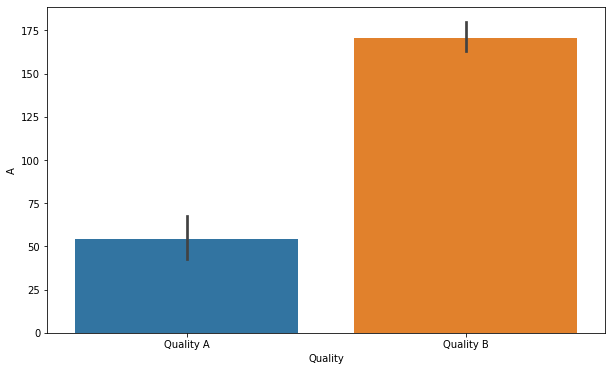

In [107]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'A', data = wine_new)

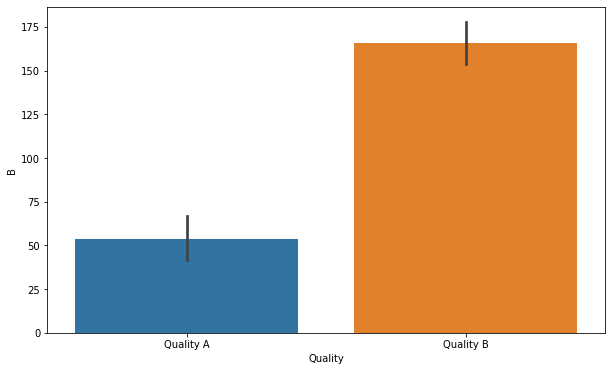

In [108]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'B', data = wine_new)

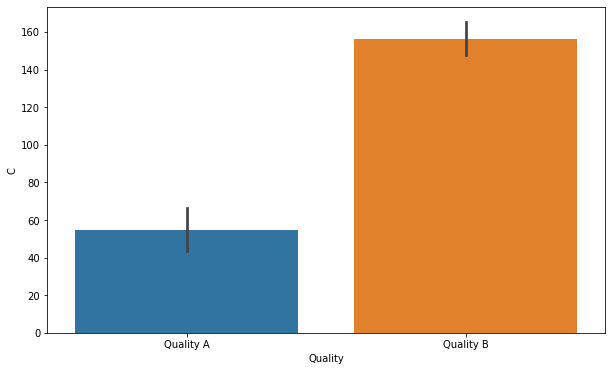

In [109]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'C', data = wine_new)

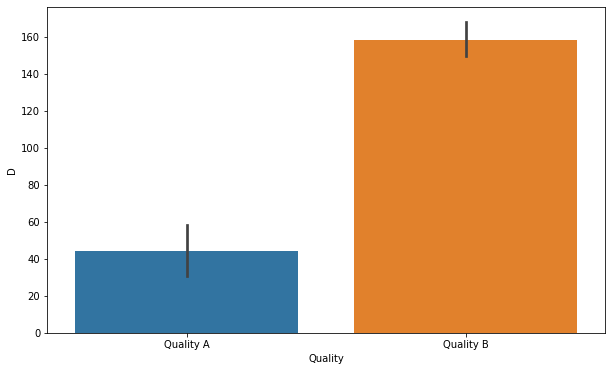

In [110]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'Quality', y = 'D', data = wine_new)

In [111]:
wine.replace(to_replace = 'Quality A', value=1, inplace=True)
wine.replace(to_replace = 'Quality B', value=0, inplace=True)

In [112]:
wine.head()

A    B    C    D  Quality
0   97    9   54  105      1.0
1  182  191  138  185      0.0
2  164  199  147  167      NaN
3   76   64   99    1      1.0
4    5   74   42   58      1.0

#### Steps taken in algorithm:
1. The notation of Quality A (high quality) has been changed to '1' and the notation of Quality B (low quality) has been changed to '0'. 
2. Using K-Means clustering, I will fill in values for all 61 rows in dataset wine
3. Using K-Means clustering, I will fill in values for all 43 rows in dataset wine_pred
4. I will compute how much of the variance is predicted (R^2 value) after modelling a linear model to fit y-values.
5. Impute missing values onto dataset wine

In [115]:
X = wine.iloc[:, [0,1,2,3]]

kmeans = KMeans(n_clusters = 2, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)

pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

In [128]:
wine['Cluster_prediction'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', wine['Cluster_prediction'].value_counts())
wine.head(10)

Number of data points in each cluster= 
 0    33
1    28
Name: Cluster_prediction, dtype: int64


A    B    C    D  Quality  Cluster_prediction
0   97    9   54  105      1.0                   1
1  182  191  138  185      0.0                   0
2  164  199  147  167      NaN                   0
3   76   64   99    1      1.0                   1
4    5   74   42   58      1.0                   1
5  163  160  156  150      NaN                   0
6   39   91   53   57      1.0                   1
7  138  151  184  132      NaN                   0
8  164  188  172  145      0.0                   0
9  186  194  137  168      NaN                   0

In [129]:
wine_pred = wine.dropna()
wine_pred.head()

A    B    C    D  Quality  Cluster_prediction
0   97    9   54  105      1.0                   1
1  182  191  138  185      0.0                   0
3   76   64   99    1      1.0                   1
4    5   74   42   58      1.0                   1
6   39   91   53   57      1.0                   1

In [133]:
# We will now apply a linear model on the dataset wine_pred

from sklearn import linear_model

In [134]:
# Initialize model
regression_model = linear_model.LinearRegression()

# Train the model using the mtcars data
regression_model.fit(X = pd.DataFrame(wine_pred["Quality"]), 
                     y = wine_pred["Cluster_prediction"])

# Check trained model y-intercept
print(regression_model.intercept_)

# Check trained model coefficients
print(regression_model.coef_)

-2.220446049250313e-16
[1.]


#### Observation:
The output above shows the model intercept and coefficients used to create the best fit line. In this case the y-intercept term is set to -2.220446049250313e-16 and the coefficient for the weight variable is 1. In other words, the model fit the line: Cluster_prediction = -2.220446049250313e-16 + Quality.

We can get a sense of how much of the variance in the response variable is explained by the model using the model.score() function:

In [135]:
regression_model.score(X = pd.DataFrame(wine_pred["Quality"]), 
                       y = wine_pred["Cluster_prediction"])

1.0

#### Observation:
The output of the score function for linear regression is "R-squared", a value that ranges from 0 to 1 which describes the proportion of variance in the response variable that is explained by the model. In this case, Quality explains roughly 100% of the variance in Cluster_prediction.

## Important Note:
Since there are only 61 values and our R^2 value is very high, we can impute the missing values (18 values) in the table to those found in the Cluster_prediction.

In [136]:
wine.head()

A    B    C    D  Quality  Cluster_prediction
0   97    9   54  105      1.0                   1
1  182  191  138  185      0.0                   0
2  164  199  147  167      NaN                   0
3   76   64   99    1      1.0                   1
4    5   74   42   58      1.0                   1

In [147]:
#Imputing missing values and then dropping Cluster_prediction column

wine['Quality'] = wine['Quality'].combine_first(wine['Cluster_prediction'])
del wine['Cluster_prediction']

In [148]:
wine

A    B    C    D  Quality
0    97    9   54  105      1.0
1   182  191  138  185      0.0
2   164  199  147  167      0.0
3    76   64   99    1      1.0
4     5   74   42   58      1.0
..  ...  ...  ...  ...      ...
56  153  199  149  140      0.0
57  200  132  198  165      0.0
58   53   53   63   57      1.0
59  184  130  198  167      0.0
60  154  142  134  133      0.0

[61 rows x 5 columns]

# Part III
#### DOMAIN: 
Automobile

#### CONTEXT: 
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.
The vehicle may be viewed from one of many different angles.

#### DATA DESCRIPTION: 
The data contains features extracted from the silhouette of vehicles in different angles. Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
• All the features are numeric i.e. geometric features extracted from the silhouette.

#### PROJECT OBJECTIVE: 
Apply dimensionality reduction technique – PCA and train a model using principal components instead of training the model using just the raw data.

#### Steps and tasks: [ Total Score: 20 points]
- Data: Import, clean and pre-process the data
- EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods. For example: Use your best analytical approach to build this report. Even you can mix match columns to create new columns which can be used for better analysis. Create your own features if required. Be highly experimental and analytical here to find hidden patterns.
- Classifier: Design and train a best fit SVM classier using all the data attributes.
- Dimensional reduction: perform dimensional reduction on the data.
- Classifier: Design and train a best fit SVM classier using dimensionally reduced attributes.
- Conclusion: Showcase key pointer on how dimensional reduction helped in this case.

#### Importing the Libraries and Basic EDA 

In [1]:
#import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn.model_selection import train_test_split

In [146]:
#load the csv file and make the data frame
vehicle_df = pd.read_csv('Part3 - vehicle.csv')

In [147]:
#display the first 5 rows of dataframe
vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [148]:
print("The dataframe has {} rows and {} columns".format(vehicle_df.shape[0],vehicle_df.shape[1]))

The dataframe has 846 rows and 19 columns


In [149]:
#display the information of dataframe
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

##### Observation
From above we can see that except 'class' column all columns are numeric type and there are null values in some columns. class column is our target column. 

In [150]:
#display in each column how many null values are there
vehicle_df.apply(lambda x: sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

##### Observation:
From above we can see that max null values is 6 which are in two columns 'radius_ratio', 'skewness_about'. so we have two options either we will drop those null values or we will impute those null values. Dropping null values is not a good way because we will lose some information.but we will go with both options then we will see what's the effect on model.

In [151]:
#display 5 point summary of dataframe
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

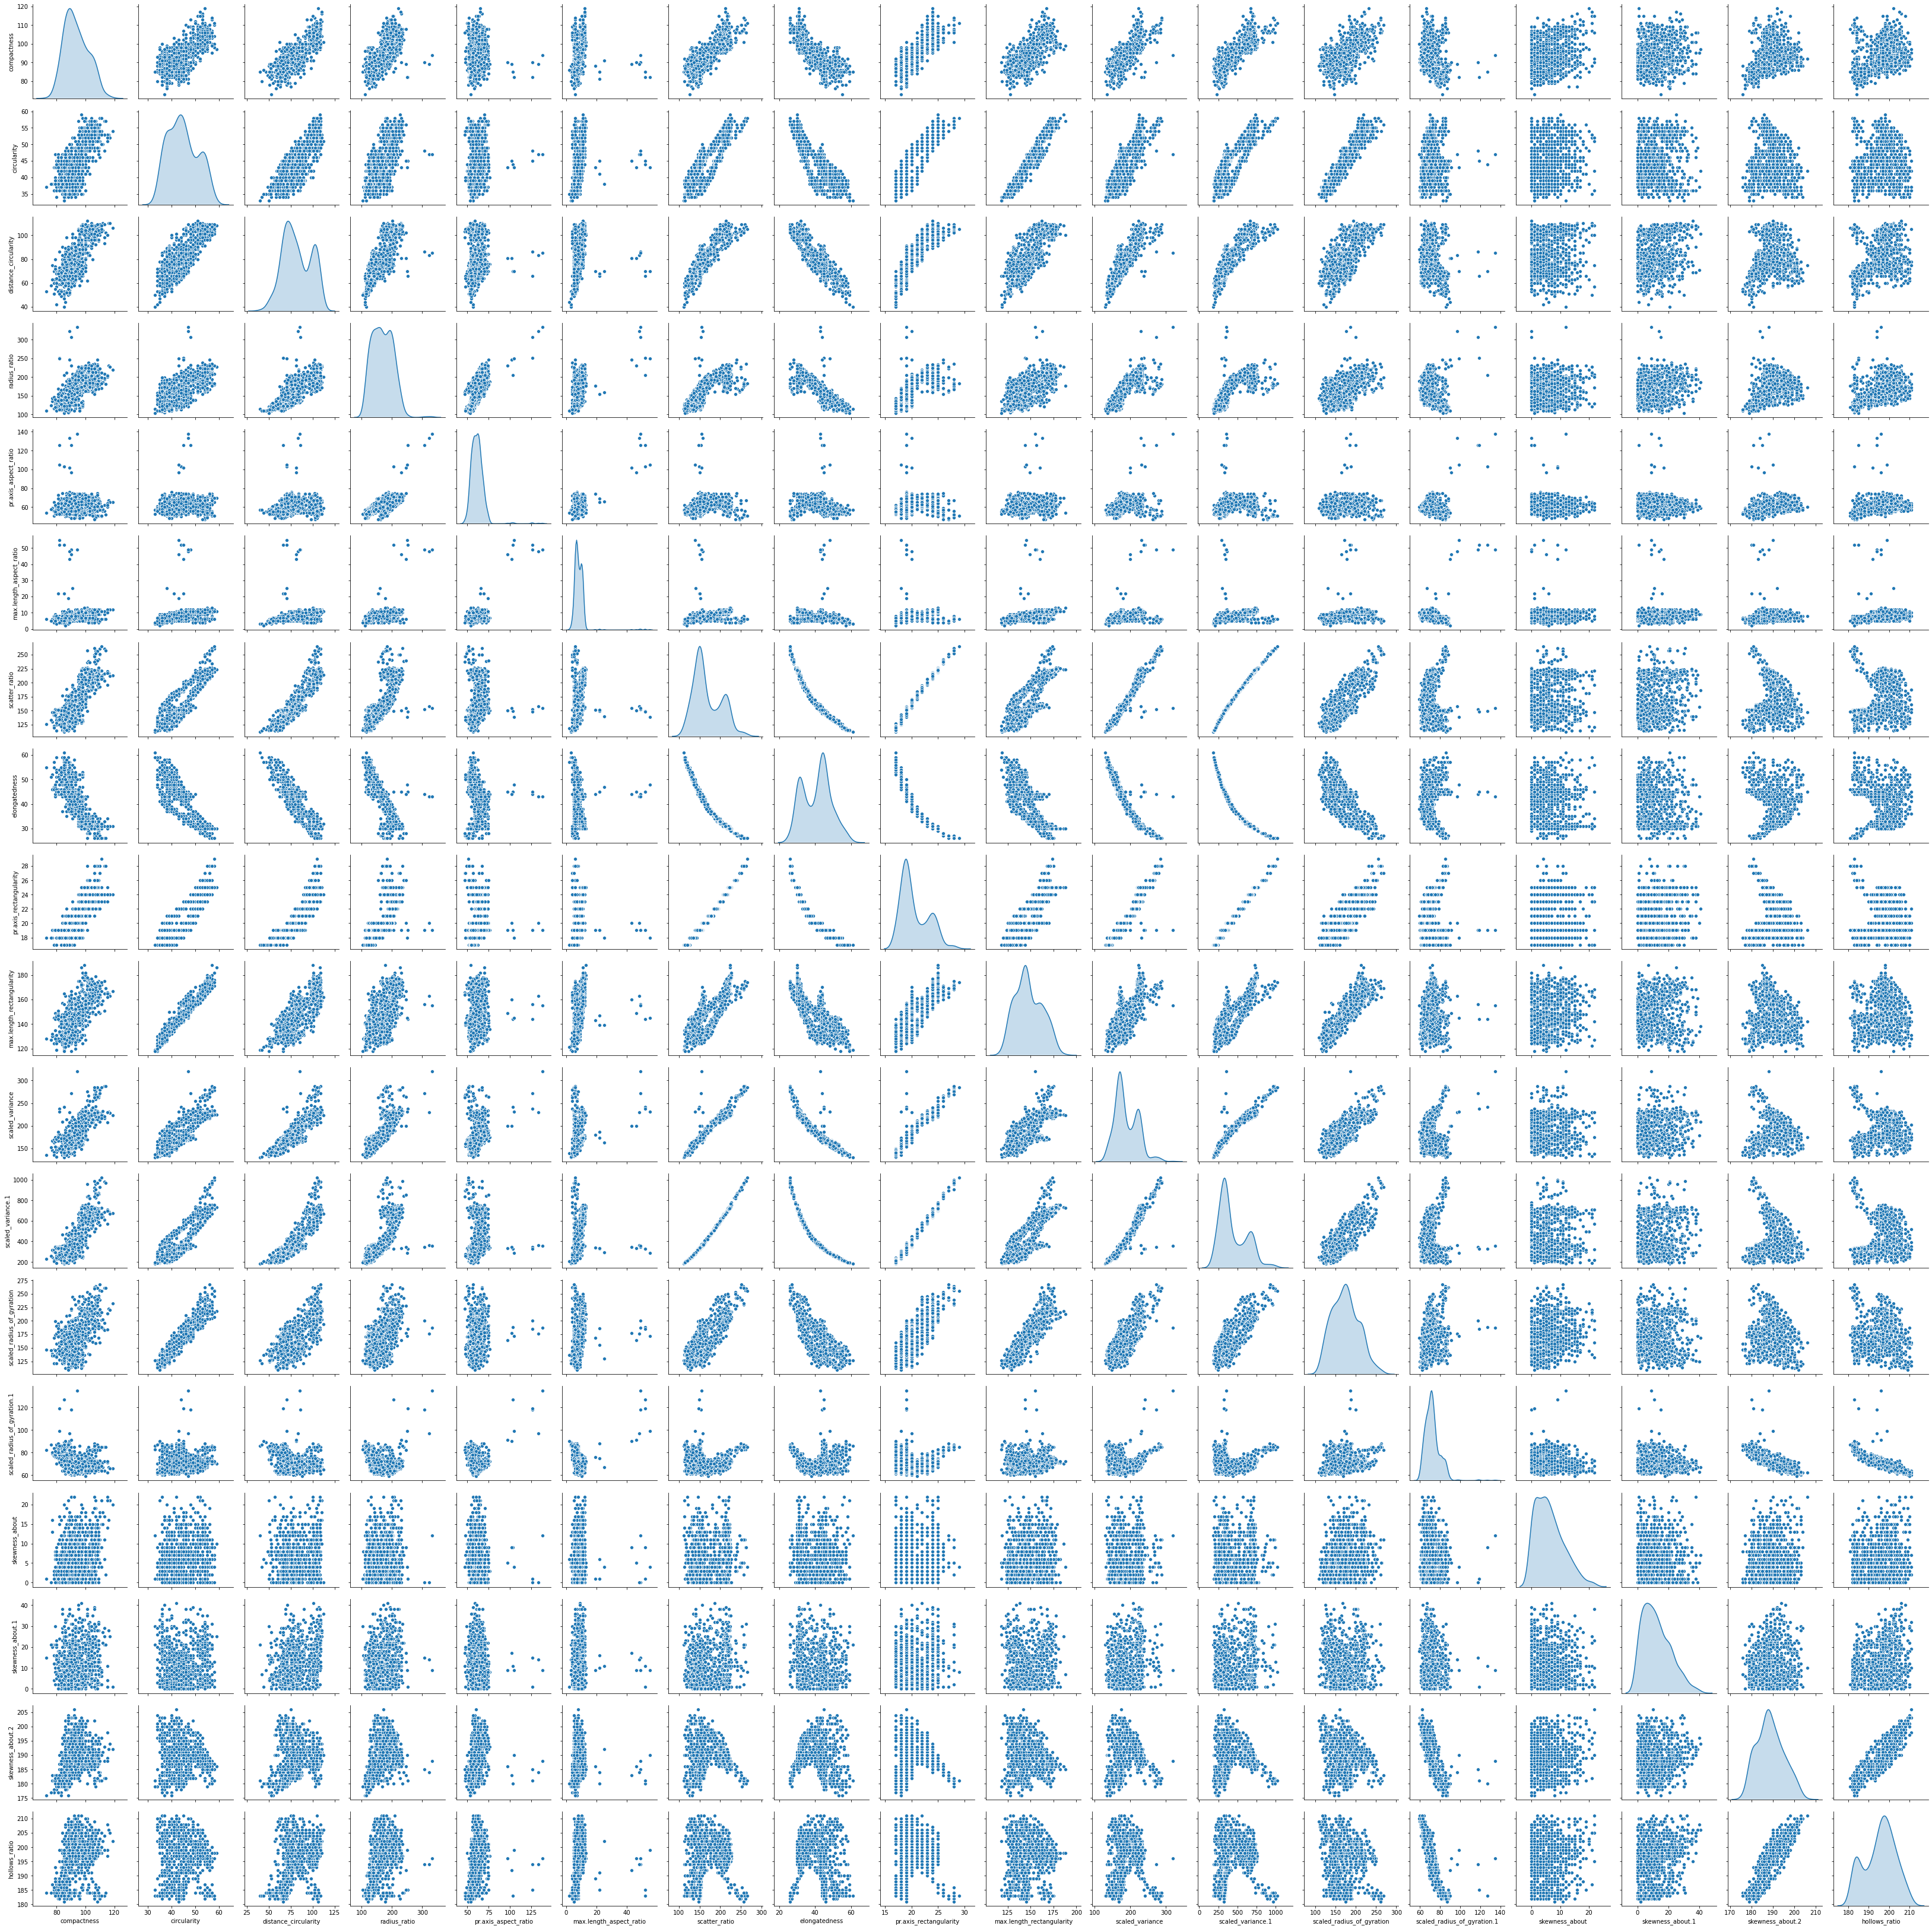

In [152]:
sns.pairplot(vehicle_df,diag_kind='kde')
plt.show()

##### Observation:
From above pair plots we can see that many columns are correlated and many columns have long tail so that is the indication of outliers.we will see down the line with the help of correlation matrix what's the strength of correlation and outliers are there or not.

From above we can see that our data has missing values in some column. so before building any model we have to handle missing values. we have two option either we will drop those missing values or we will impute missing values. we will go with both options and see what's the effect on model. so first we will drop the missing values. Before dropping missing values we will create another dataframe and copy the original dataframe data into that. It's a good practice to keep the original dataframe as it is and make all modifications to the new dataframe.

#### Dropping Missing Values:

In [153]:
#copy the dataframe to another dataframe and drop null/missing values from the newly created dataframe
new_vehicle_df = vehicle_df.copy()

# so now we have new dataframe called new_vehicle_df and we will make changes in this new dataframe.

In [154]:
#display the first 5 rows of new dataframe
new_vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [155]:
#display the shape of dataframe
print("Shape of newly created dataframe:",new_vehicle_df.shape)

Shape of newly created dataframe: (846, 19)


In [156]:
#drop the null vaues from the new dataframe
new_vehicle_df.dropna(axis=0,inplace=True)

In [157]:
#now we will see what is the shape of dataframe
print("After dropping missing values shape of dataframe:",new_vehicle_df.shape)

After dropping missing values shape of dataframe: (813, 19)


In [158]:
#display 5 point summary of new dataframe
new_vehicle_df.describe().transpose()

count        mean         std    min    25%  \
compactness                  813.0   93.656827    8.233751   73.0   87.0   
circularity                  813.0   44.803198    6.146659   33.0   40.0   
distance_circularity         813.0   82.043050   15.783070   40.0   70.0   
radius_ratio                 813.0  169.098401   33.615402  104.0  141.0   
pr.axis_aspect_ratio         813.0   61.774908    7.973000   47.0   57.0   
max.length_aspect_ratio      813.0    8.599016    4.677174    2.0    7.0   
scatter_ratio                813.0  168.563346   33.082186  112.0  146.0   
elongatedness                813.0   40.988930    7.803380   26.0   33.0   
pr.axis_rectangularity       813.0   20.558426    2.573184   17.0   19.0   
max.length_rectangularity    813.0  147.891759   14.504648  118.0  137.0   
scaled_variance              813.0  188.377614   31.165873  130.0  167.0   
scaled_variance.1            813.0  438.382534  175.270368  184.0  318.0   
scaled_radius_of_gyration    813.0  174.252153   32.332161  109.0  149.0   
scaled_radius_of_gyration.1  813.0   72.399754    7.475994   59.0   67.0   
skewness_about               813.0    6.351784    4.921476    0.0    2.0   
skewness_about.1             813.0   12.687577    8.926951    0.0    6.0   
skewness_about.2             813.0  188.979090    6.153681  176.0  184.0   
hollows_ratio                813.0  195.729397    7.398781  181.0  191.0   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          79.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            364.0  586.0  1018.0  
scaled_radius_of_gyration    173.0  198.0   268.0  
scaled_radius_of_gyration.1   71.0   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             189.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

#### Analysis of each column with the help of plots

Text(0.5, 1.0, 'Box Plot')

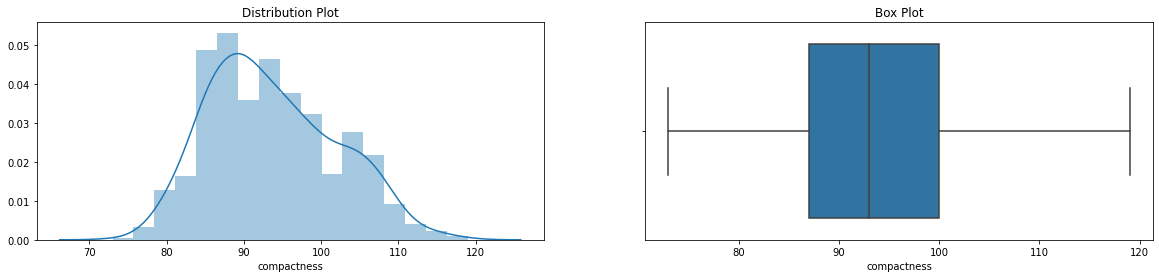

In [159]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['compactness'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in compactness column and it's looks like normally distributed.

Text(0.5, 1.0, 'Box Plot')

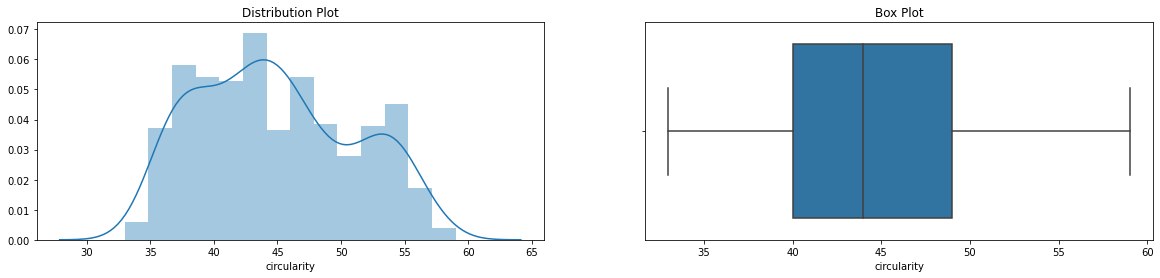

In [160]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['circularity'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in circularity column and it's looks like normally distributed

Text(0.5, 1.0, 'Box Plot')

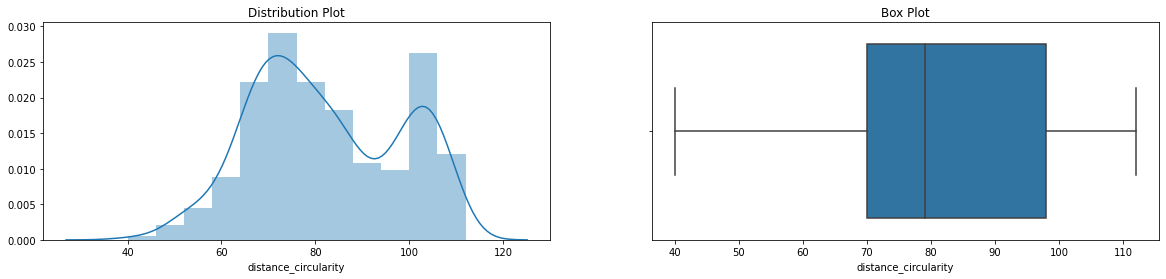

In [161]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation: 
From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

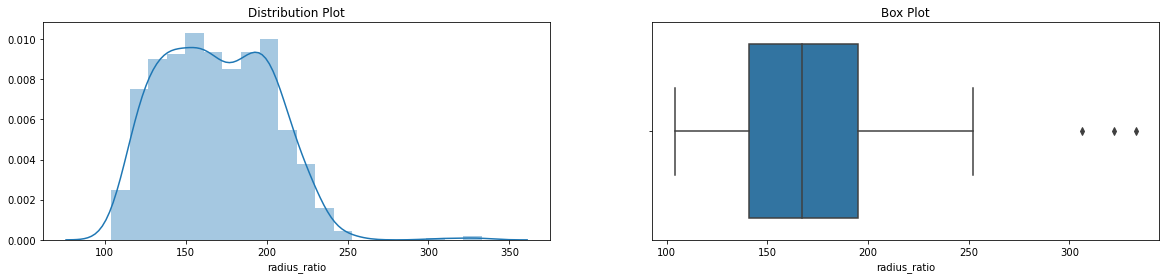

In [162]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in radius_ratio column and there is right skewness because long tail is at the right side(mean>median)

In [163]:
#check how many outliers are there in radius_ratio column
q1 = np.quantile(new_vehicle_df['radius_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['radius_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['radius_ratio'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("radius_ratio above",new_vehicle_df['radius_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in radius_ratio column are",new_vehicle_df[new_vehicle_df['radius_ratio']>276]['radius_ratio'].shape[0])

Quartie1:: 141.0
Quartie2:: 167.0
Quartie3:: 195.0
Inter Quartie Range:: 54.0
radius_ratio above 276.0 are outliers
The Outliers in radius_ratio column are 3


Text(0.5, 1.0, 'Box Plot')

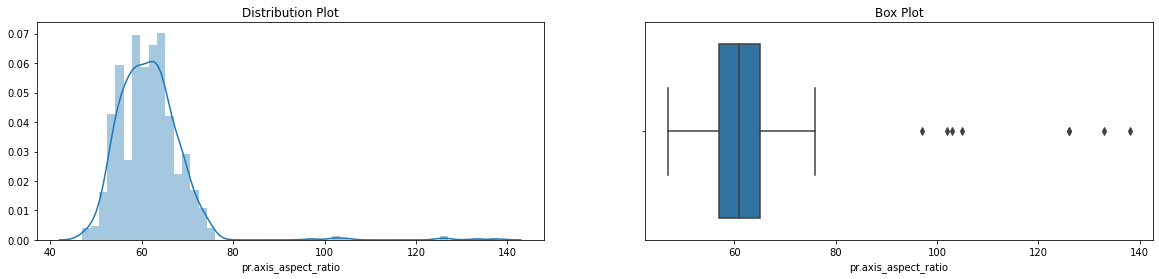

In [164]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in pr.axis_aspect_ratio column and there is right skewness because long tail is at right side(mean>median)

In [165]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("pr.axis_aspect_ratio above",new_vehicle_df['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in pr.axis_aspect_ratio column are",new_vehicle_df[new_vehicle_df['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

Quartie1:: 57.0
Quartie2:: 61.0
Quartie3:: 65.0
Inter Quartie Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8


Text(0.5, 1.0, 'Box Plot')

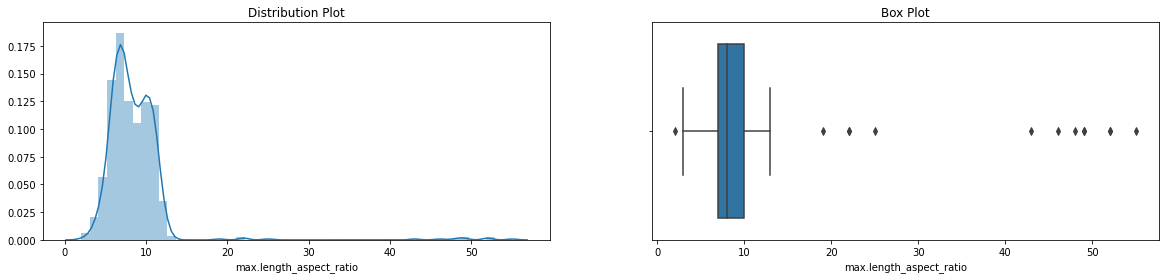

In [166]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median)

In [167]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.25)
q2 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.50)
q3 = np.quantile(new_vehicle_df['max.length_aspect_ratio'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("max.length_aspect_ratio above",new_vehicle_df['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("max.length_aspect_ratio below",new_vehicle_df['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR),"are outliers")
print("The above Outliers in max.length_aspect_ratio column are",new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print("The below Outliers in max.length_aspect_ratio column are",new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

Quartie1:: 7.0
Quartie2:: 8.0
Quartie3:: 10.0
Inter Quartie Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
max.length_aspect_ratio below 2.5 are outliers
The above Outliers in max.length_aspect_ratio column are 12
The below Outliers in max.length_aspect_ratio column are 1


Text(0.5, 1.0, 'Box Plot')

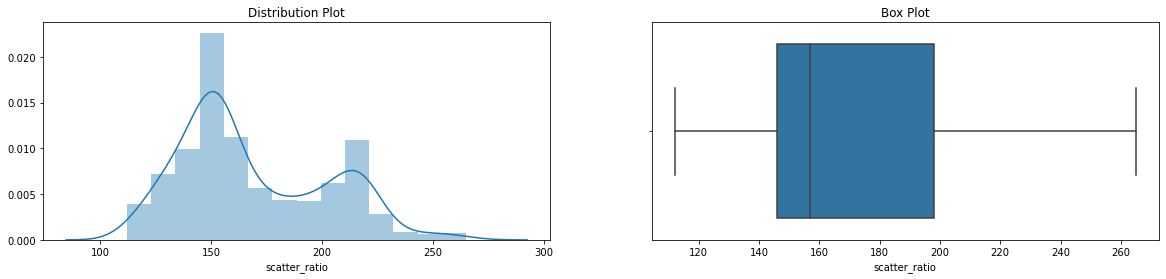

In [168]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

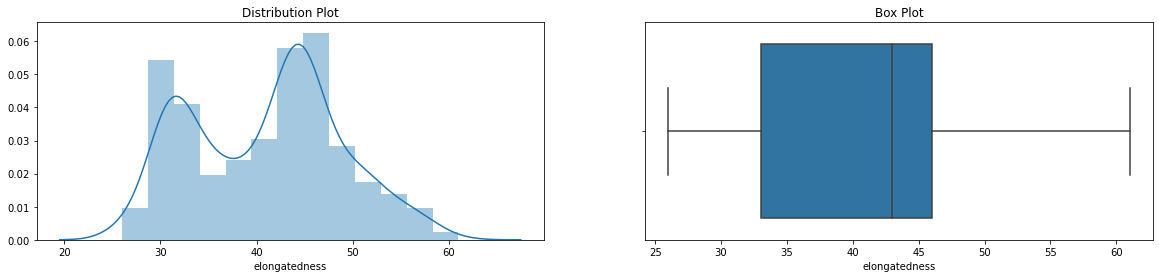

In [169]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

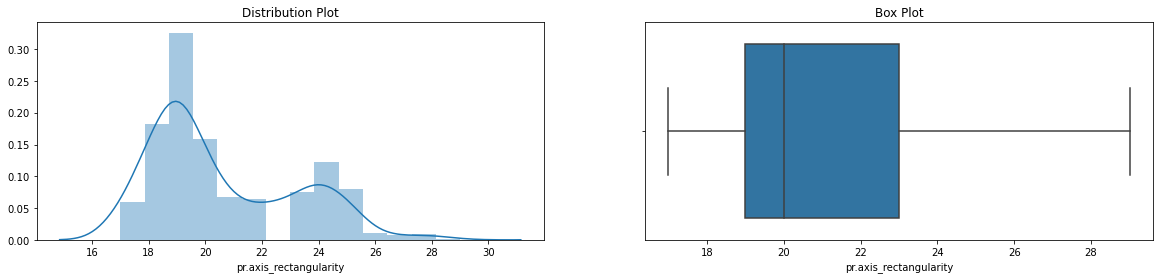

In [170]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

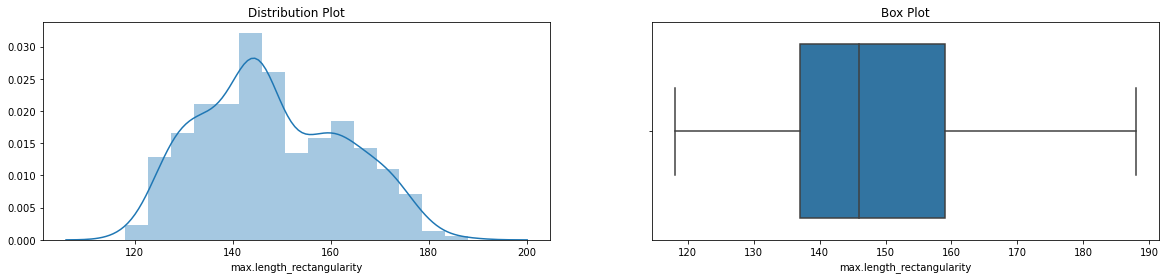

In [171]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

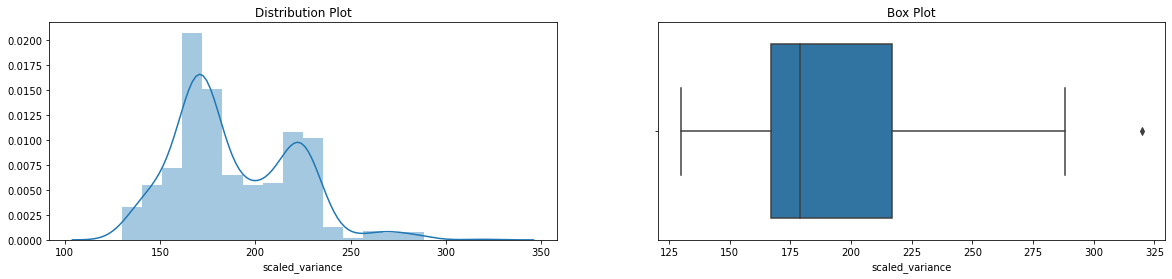

In [172]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [173]:
#check how many outliers are there in scaled_variance column
q1 = np.quantile(new_vehicle_df['scaled_variance'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_variance'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_variance'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance above",new_vehicle_df['scaled_variance'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance column are",new_vehicle_df[new_vehicle_df['scaled_variance']>292]['scaled_variance'].shape[0])

Quartie1:: 167.0
Quartie2:: 179.0
Quartie3:: 217.0
Inter Quartie Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1


Text(0.5, 1.0, 'Box Plot')

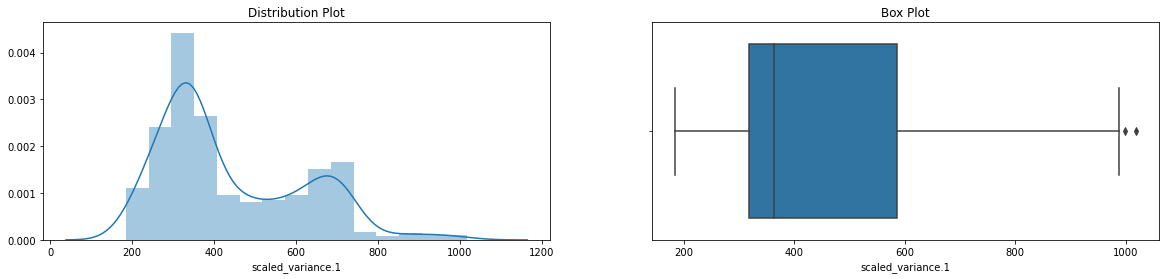

In [174]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [175]:
#check how many outliers are there in scaled_variance.1 column
q1 = np.quantile(new_vehicle_df['scaled_variance.1'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_variance.1'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_variance.1'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance.1 above",new_vehicle_df['scaled_variance.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance.1 column are",new_vehicle_df[new_vehicle_df['scaled_variance.1']>988]['scaled_variance.1'].shape[0])

Quartie1:: 318.0
Quartie2:: 364.0
Quartie3:: 586.0
Inter Quartie Range:: 268.0
scaled_variance.1 above 988.0 are outliers
The Outliers in scaled_variance.1 column are 2


Text(0.5, 1.0, 'Box Plot')

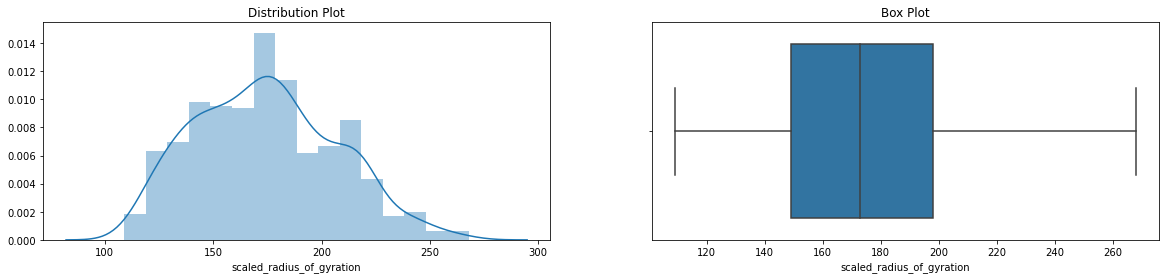

In [176]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

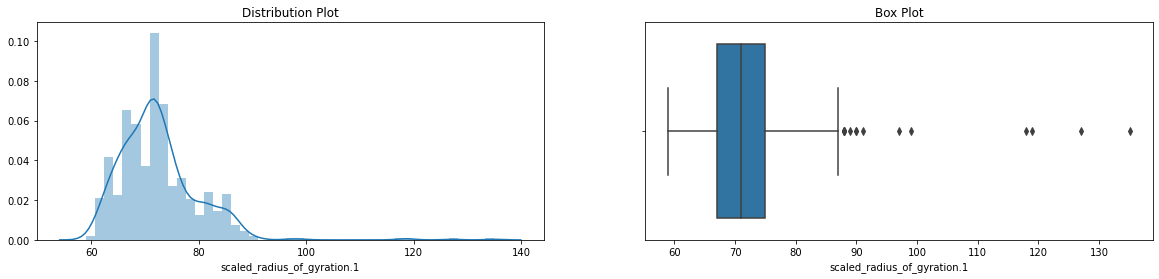

In [177]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median)

In [178]:
#check how many outliers are there in scaled_radius_of_gyration.1 column
q1 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(new_vehicle_df['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_radius_of_gyration.1 above",new_vehicle_df['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_radius_of_gyration.1 column are",new_vehicle_df[new_vehicle_df['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

Quartie1:: 67.0
Quartie2:: 71.0
Quartie3:: 75.0
Inter Quartie Range:: 8.0
scaled_radius_of_gyration.1 above 87.0 are outliers
The Outliers in scaled_radius_of_gyration.1 column are 15


Text(0.5, 1.0, 'Box Plot')

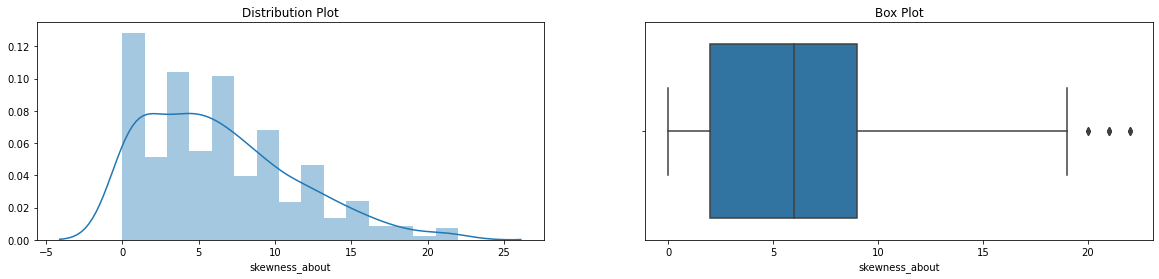

In [179]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side(mean>median)

In [180]:
#check how many outliers are there in skewness_about column
q1 = np.quantile(new_vehicle_df['skewness_about'],0.25)
q2 = np.quantile(new_vehicle_df['skewness_about'],0.50)
q3 = np.quantile(new_vehicle_df['skewness_about'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about above",new_vehicle_df['skewness_about'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about column are",new_vehicle_df[new_vehicle_df['skewness_about']>19.5]['skewness_about'].shape[0])

Quartie1:: 2.0
Quartie2:: 6.0
Quartie3:: 9.0
Inter Quartie Range:: 7.0
skewness_about above 19.5 are outliers
The Outliers in skewness_about column are 12


Text(0.5, 1.0, 'Box Plot')

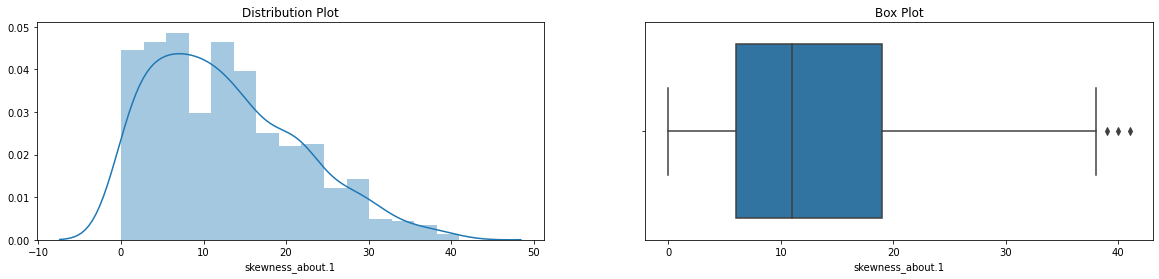

In [181]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in skewness_about.1 column and there is right skewness because long tail is at right side(mean>median)

In [182]:
#check how many outliers are there in skewness_about.1 column
q1 = np.quantile(new_vehicle_df['skewness_about.1'],0.25)
q2 = np.quantile(new_vehicle_df['skewness_about.1'],0.50)
q3 = np.quantile(new_vehicle_df['skewness_about.1'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about.1 above",new_vehicle_df['skewness_about.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about.1 column are",new_vehicle_df[new_vehicle_df['skewness_about.1']>38.5]['skewness_about.1'].shape[0])

Quartie1:: 6.0
Quartie2:: 11.0
Quartie3:: 19.0
Inter Quartie Range:: 13.0
skewness_about.1 above 38.5 are outliers
The Outliers in skewness_about.1 column are 3


Text(0.5, 1.0, 'Box Plot')

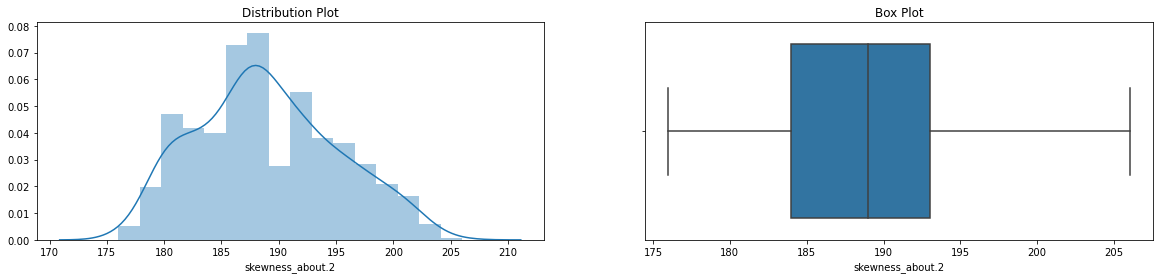

In [183]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

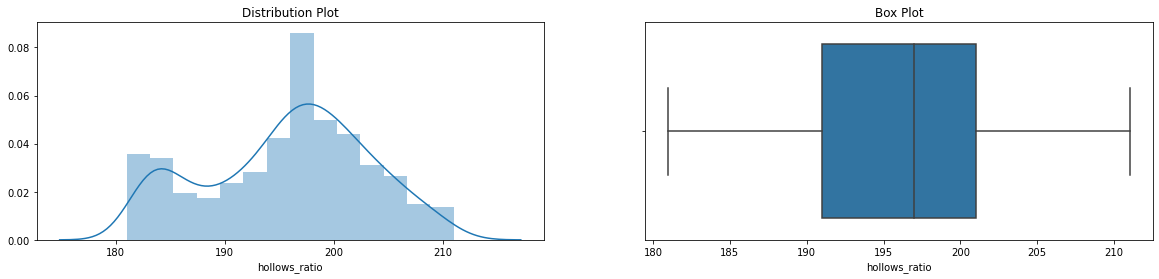

In [184]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(new_vehicle_df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(new_vehicle_df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean<median)

In [185]:
#display how many are car,bus,van. 
new_vehicle_df['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

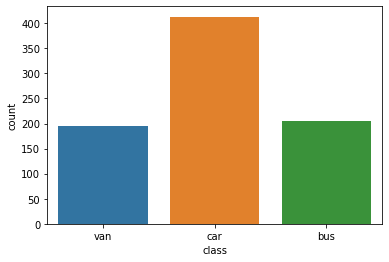

In [186]:
sns.countplot(new_vehicle_df['class'])
plt.show()

##### Observation:
From above we can see that cars are most followed by bus and then vans.

so by now we analyze each column and we found that there are outliers in some column. now our next step is to know whether these outliers are natural or artificial. if natural then we have to do nothing but if these outliers are artificial then we have to handle these outliers. we have 8 columns in which we found outliers: ->radius_ratio ->pr.axis_aspect_ratio ->max.length_aspect_ratio ->scaled_variance ->scaled_variance.1 ->scaled_radius_of_gyration.1 ->skewness_about ->skewness_about.1

after seeing the max values of above outliers column. it's looks like outliers in above columns are natural not a typo mistake or artificial. Note: It's my assumption only. as there is no way to prove whether these outliers are natural or artificial. As we know that mostly algorithms are affected by outliers and outliers may affect the model.as we will apply SVM on above data which is affected by outliers. so better to drop those outliers.

#### Fix Outliers after dropping missing values

In [187]:
#radius_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['radius_ratio']>276].index,axis=0,inplace=True)

In [188]:
#pr.axis_aspect_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)

In [189]:
#max.length_aspect_ratio column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)

In [190]:
#scaled_variance column outliers
new_vehicle_df[new_vehicle_df['scaled_variance']>292]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

##### Observation:
From above we can see that scaled_variance column outliers has been removed

In [191]:
#scaled_variance.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['scaled_variance.1']>988].index,axis=0,inplace=True)

In [192]:
#scaled_radius_of_gyration.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)

In [193]:
#skewness_about column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['skewness_about']>19.5].index,axis=0,inplace=True)

In [194]:
#skewness_about.1 column outliers
new_vehicle_df.drop(new_vehicle_df[new_vehicle_df['skewness_about.1']>38.5].index,axis=0,inplace=True)

In [195]:
#now what is the shape of dataframe
print("after removing outliers shape of dataframe:",new_vehicle_df.shape)

after removing outliers shape of dataframe: (778, 19)


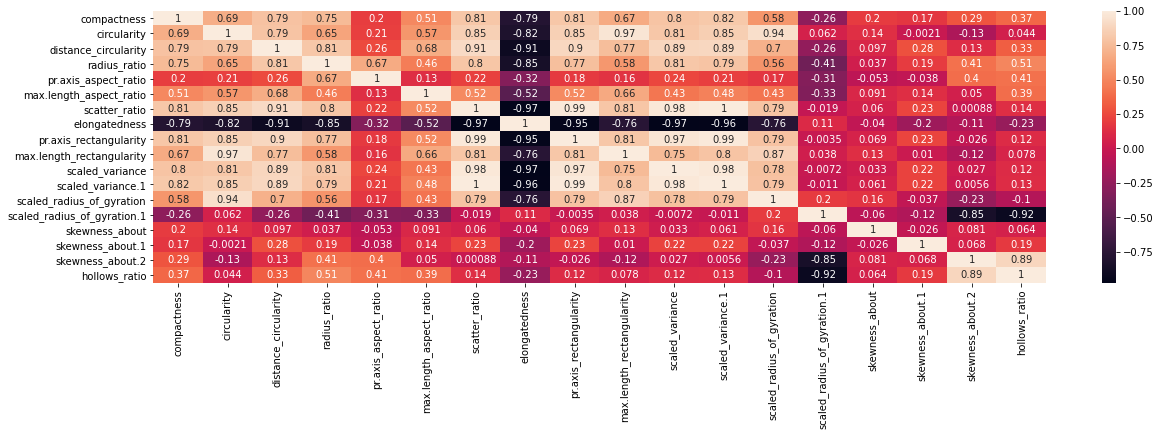

In [196]:
#find the correlation between independent variables
plt.figure(figsize=(20,5))
sns.heatmap(new_vehicle_df.corr(),annot=True)
plt.show()

##### Observation:
So our objective is to reocgnize whether an object is a van or bus or car based on some input features. so our main assumption is there is little or no multicollinearity between the features. if two features is highly correlated then there is no use in using both features.in that case, we can drop one feature. so heatmap gives us the correlation matrix there we can see which features are highly correlated. From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then scaled_variance.1 and scatter_ratio has 1 correlation and many other features also there which having more than 0.9 correlation so we will drop those columns whose correlation is +-0.9 or above. so there are 8 such columns: ->max.length_rectangularity ->scaled_radius_of_gyration ->skewness_about.2 ->scatter_ratio ->elongatedness ->pr.axis_rectangularity ->scaled_variance ->scaled_variance.1

now, again we have two option we will drop those above eight columns manually or we will apply pca and let pca to be decided how it will explain above data which is in high dimension with smaller number of variables. we will see both approaches.

Principal Component Analysis is an unsupervised learning class of statistical techniques used to explain data in high dimension using small number of variables called the principal components. Principal components are the linear combinations of the original variables in the dataset. As it will explain high dimension data with small number of variables. The big disadvantage is we cannot do interpretation with the model.In other words model with pca will become blackbox.
In pca first we have to find the covariance matrix after that from that covariance matrix we have to find eigen vectors and eigen values. There is mathematical way to find eigen vectors and eigen values. i will attach the link of how to find the eigen value and eigen vector. Corresponding to each eigen vector there is eigen value. after that we have to sort the eigen vector by decreasing eigen values and choose k eigen vectors with the largest eigen value.

### With Principal Component Analysis(PCA)

In [197]:
#now separate the dataframe into dependent and independent variables
new_vehicle_df_independent_attr = new_vehicle_df.drop('class',axis=1)
new_vehicle_df_dependent_attr = new_vehicle_df['class']
print("shape of new_vehicle_df_independent_attr::",new_vehicle_df_independent_attr.shape)
print("shape of new_vehicle_df_dependent_attr::",new_vehicle_df_dependent_attr.shape)

shape of new_vehicle_df_independent_attr:: (778, 18)
shape of new_vehicle_df_dependent_attr:: (778,)


In [198]:
#now sclaed the independent attribute and replace the dependent attr value with number
new_vehicle_df_independent_attr_scaled = new_vehicle_df_independent_attr.apply(zscore)
new_vehicle_df_dependent_attr.replace({'car':0,'bus':1,'van':2},inplace=True)

In [199]:
#make the covariance matrix and we have 18 independent features so aur covariance matrix is 18*18 matrix
cov_matrix = np.cov(new_vehicle_df_independent_attr_scaled,rowvar=False)
print("cov_matrix shape:",cov_matrix.shape)
print("Covariance_matrix",cov_matrix)


cov_matrix shape: (18, 18)
Covariance_matrix [[ 1.00128700e+00  6.86247246e-01  7.87505293e-01  7.46771440e-01
   2.04939977e-01  5.12283067e-01  8.12881431e-01 -7.88349738e-01
   8.12905174e-01  6.73782504e-01  7.96401783e-01  8.19887792e-01
   5.76023344e-01 -2.65267720e-01  1.97487290e-01  1.69434494e-01
   2.92836011e-01  3.71157507e-01]
 [ 6.86247246e-01  1.00128700e+00  7.93336484e-01  6.46067365e-01
   2.10187939e-01  5.72687787e-01  8.55995384e-01 -8.20856804e-01
   8.55313028e-01  9.66703354e-01  8.15382274e-01  8.49756656e-01
   9.36901509e-01  6.21569802e-02  1.38644834e-01 -2.14108305e-03
  -1.26272800e-01  4.38549912e-02]
 [ 7.87505293e-01  7.93336484e-01  1.00128700e+00  8.15625667e-01
   2.57276757e-01  6.81069140e-01  9.10833561e-01 -9.11154567e-01
   9.00470612e-01  7.67926678e-01  8.91113878e-01  8.95421670e-01
   7.04373288e-01 -2.55844099e-01  9.69453477e-02  2.77271339e-01
   1.27935606e-01  3.33163683e-01]
 [ 7.46771440e-01  6.46067365e-01  8.15625667e-01  1.00128

In [200]:
#now with the help of above covariance matrix we will find eigen value and eigen vectors
pca_to_learn_variance = PCA(n_components=18)
pca_to_learn_variance.fit(new_vehicle_df_independent_attr_scaled)

PCA(n_components=18)

In [201]:
#display explained variance ratio
pca_to_learn_variance.explained_variance_ratio_

array([5.47917208e-01, 1.85063633e-01, 6.64445772e-02, 6.41074844e-02,
       4.91803576e-02, 3.60021274e-02, 1.81384465e-02, 1.26936388e-02,
       6.15906674e-03, 4.25924846e-03, 3.23513418e-03, 2.24281296e-03,
       1.49652817e-03, 1.17583823e-03, 8.60586176e-04, 6.67254264e-04,
       3.36385506e-04, 1.96724486e-05])

In [202]:
#display explained variance
pca_to_learn_variance.explained_variance_

array([9.87520281e+00, 3.33543258e+00, 1.19754165e+00, 1.15541983e+00,
       8.86385749e-01, 6.48872319e-01, 3.26912233e-01, 2.28779559e-01,
       1.11005882e-01, 7.67651421e-02, 5.83073605e-02, 4.04225904e-02,
       2.69721757e-02, 2.11923277e-02, 1.55104875e-02, 1.20260344e-02,
       6.06273182e-03, 3.54559807e-04])

In [203]:
#display principal components
pca_to_learn_variance.components_

array([[ 2.70963937e-01,  2.85498616e-01,  3.00756696e-01,
         2.73648012e-01,  1.02876273e-01,  1.98762043e-01,
         3.09692679e-01, -3.07017506e-01,  3.06820802e-01,
         2.74168749e-01,  3.02498907e-01,  3.07162213e-01,
         2.59825044e-01, -5.01854837e-02,  3.53690148e-02,
         6.32634323e-02,  3.55974003e-02,  8.81040107e-02],
       [-8.72522599e-02,  1.43599934e-01, -4.16504206e-02,
        -1.98016825e-01, -2.51189765e-01, -8.25042940e-02,
         7.14270483e-02, -1.09817948e-02,  8.47209207e-02,
         1.31005476e-01,  6.74747787e-02,  7.47652392e-02,
         2.10158848e-01,  5.05191356e-01, -1.54690345e-02,
        -8.14686691e-02, -5.08122400e-01, -5.06717268e-01],
       [-2.24781542e-02, -2.12492148e-01,  6.81966354e-02,
         5.12261099e-02, -1.00850129e-01, -1.68740481e-01,
         1.13838973e-01, -9.67003862e-02,  1.11506102e-01,
        -2.31363392e-01,  1.47774860e-01,  1.17721336e-01,
        -2.15281029e-01,  7.46102368e-02, -5.08187752e

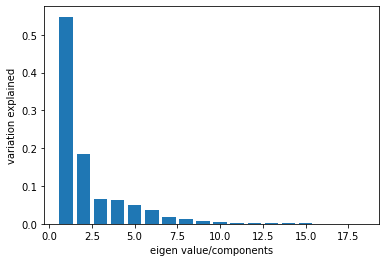

In [204]:
plt.bar(list(range(1,19)),pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

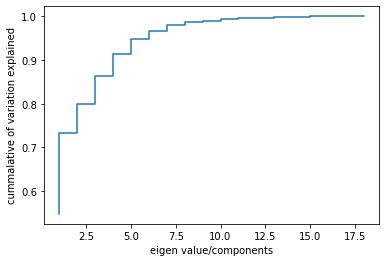

In [205]:
plt.step(list(range(1,19)),np.cumsum(pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

##### Observation:
From above we can see that 8 dimension are able to explain 95%variance of data. so we will use first 8 principal components

In [206]:
#use first 8 principal components
pca_eight_components = PCA(n_components=8)
pca_eight_components.fit(new_vehicle_df_independent_attr_scaled)

PCA(n_components=8)

In [207]:
#transform the raw data which is in 18 dimension into 8 new dimension with pca
new_vehicle_df_pca_independent_attr = pca_eight_components.transform(new_vehicle_df_independent_attr_scaled)

In [208]:
#display the shape of new_vehicle_df_pca_independent_attr
new_vehicle_df_pca_independent_attr.shape

(778, 8)

##### Observation: 
Now before apply pca with 8 dimension which are explaining more than 95% variantion of data we will make model on raw data after that we will make model with pca and then we will compare both models.

In [209]:
#now split the data into 80:20 ratio
rawdata_X_train,rawdata_X_test,rawdata_y_train,rawdata_y_test = train_test_split(new_vehicle_df_independent_attr_scaled,new_vehicle_df_dependent_attr,test_size=0.20,random_state=1)
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(new_vehicle_df_pca_independent_attr,new_vehicle_df_dependent_attr,test_size=0.20,random_state=1)

In [210]:
print("shape of rawdata_X_train",rawdata_X_train.shape)
print("shape of rawdata_y_train",rawdata_y_train.shape)
print("shape of rawdata_X_test",rawdata_X_test.shape)
print("shape of rawdata_y_test",rawdata_y_test.shape)
print("--------------------------------------------")
print("shape of pca_X_train",pca_X_train.shape)
print("shape of pca_y_train",pca_y_train.shape)
print("shape of pca_X_test",pca_X_test.shape)
print("shape of pca_y_test",pca_y_test.shape)

shape of rawdata_X_train (622, 18)
shape of rawdata_y_train (622,)
shape of rawdata_X_test (156, 18)
shape of rawdata_y_test (156,)
--------------------------------------------
shape of pca_X_train (622, 8)
shape of pca_y_train (622,)
shape of pca_X_test (156, 8)
shape of pca_y_test (156,)


In [211]:
#now we will train the model with both raw data and pca data with new dimension
svc = SVC() #instantiate the object

In [212]:
#fit the model on raw data
svc.fit(rawdata_X_train,rawdata_y_train)

SVC()

In [213]:
#predict the y value
rawdata_y_predict = svc.predict(rawdata_X_test)

In [214]:
#now fit the model on pca data with new dimension
svc.fit(pca_X_train,pca_y_train)

SVC()

In [215]:
#predict the y value
pca_y_predict = svc.predict(pca_X_test)

In [216]:
#display accuracy score of both models
print("Accuracy score with raw data(18 dimension)",accuracy_score(rawdata_y_test,rawdata_y_predict))
print("Accuracy score with pca data(8 dimension)",accuracy_score(pca_y_test,pca_y_predict))

Accuracy score with raw data(18 dimension) 0.9615384615384616
Accuracy score with pca data(8 dimension) 0.9487179487179487


##### Observation:
From above we can see that by reducing 10 dimension we are achieving 94% accuracy

In [217]:
#display confusion matrix of both models
print("Confusion matrix with raw data(18 dimension)\n",confusion_matrix(rawdata_y_test,rawdata_y_predict))
print("Confusion matrix with pca data(8 dimension)\n",confusion_matrix(pca_y_test,pca_y_predict))

Confusion matrix with raw data(18 dimension)
 [[87  0  4]
 [ 0 38  1]
 [ 1  0 25]]
Confusion matrix with pca data(8 dimension)
 [[85  2  4]
 [ 0 38  1]
 [ 1  0 25]]


### With dropping the above mentioned columns Manually

In [ ]:
#drop the columns
new_vehicle_df_independent_attr_scaled.drop(['max.length_rectangularity','scaled_radius_of_gyration','skewness_about.2','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1'],axis=1,inplace=True)

In [221]:
#display the shape of new dataframe
new_vehicle_df_independent_attr_scaled.shape

(778, 10)

In [223]:
dropcolumn_X_train,dropcolumn_X_test,dropcolumn_y_train,dropcolumn_y_test = train_test_split(new_vehicle_df_independent_attr_scaled,new_vehicle_df_dependent_attr,test_size=0.20,random_state=1)

In [224]:
print("shape of dropcolumn_X_train",dropcolumn_X_train.shape)
print("shape of dropcolumn_y_train",dropcolumn_y_train.shape)
print("shape of dropcolumn_X_test",dropcolumn_X_test.shape)
print("shape of dropcolumn_y_test",dropcolumn_y_test.shape)

shape of dropcolumn_X_train (622, 10)
shape of dropcolumn_y_train (622,)
shape of dropcolumn_X_test (156, 10)
shape of dropcolumn_y_test (156,)


In [225]:
#fit the model on dropcolumn_X_train,dropcolumn_y_train
svc.fit(dropcolumn_X_train,dropcolumn_y_train)

SVC()

In [226]:
#predict the y value
dropcolumn_y_predict = svc.predict(dropcolumn_X_test)

In [227]:
#display the accuracy score and confusion matrix
print("Accuracy score with dropcolumn data(10 dimension)",accuracy_score(dropcolumn_y_test,dropcolumn_y_predict))
print("Confusion matrix with dropcolumn data(10 dimension)\n",confusion_matrix(dropcolumn_y_test,dropcolumn_y_predict))

Accuracy score with dropcolumn data(10 dimension) 0.9423076923076923
Confusion matrix with dropcolumn data(10 dimension)
 [[85  1  5]
 [ 0 38  1]
 [ 1  1 24]]


### Imputing missing values
First let's create a new dataframe and then we will impute the missing values.

In [228]:
#create a new dataframe
impute_vehicle_df = vehicle_df.copy()

In [229]:
#display the first 5 rows of dataframe
impute_vehicle_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [230]:
#display the shape of dataframe
impute_vehicle_df.shape

(846, 19)

In [231]:
#display the information of dataframe
impute_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

##### Observation:
From above we can see that there are null values in some column.now we will impute those null values.

In [232]:
#display 5 point summary
impute_vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

##### Observation:
From above 5 point summary it's looks like we can impute with median.again by imputing the missing values with median we are changing the shape of distribution and introducing bias.but it's might be better than drpping missing values.

In [233]:
impute_vehicle_df.fillna(impute_vehicle_df.median(),axis=0,inplace=True)

In [234]:
#display the info of dataframe
impute_vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

##### Observation:
From above we can see that there are no null values in each column

In [236]:
#display 5 point summary after imputation 
impute_vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

### Analysis of each column with the help of plots

Text(0.5, 1.0, 'Box Plot')

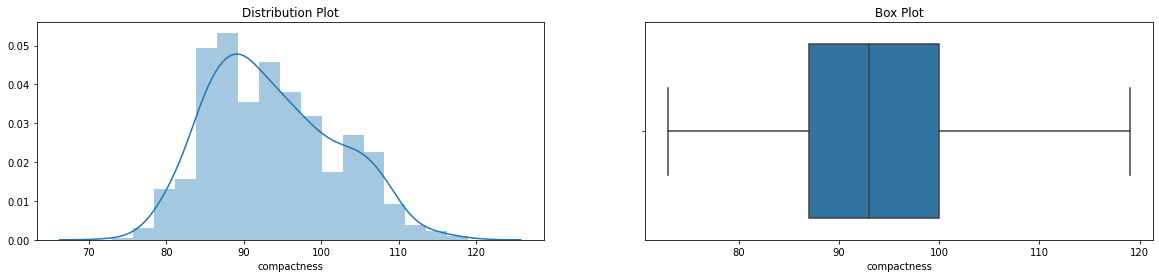

In [237]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['compactness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['compactness'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation: 
From above we can see that there are no outliers in compactness column and it's looks like normally distributed.

Text(0.5, 1.0, 'Box Plot')

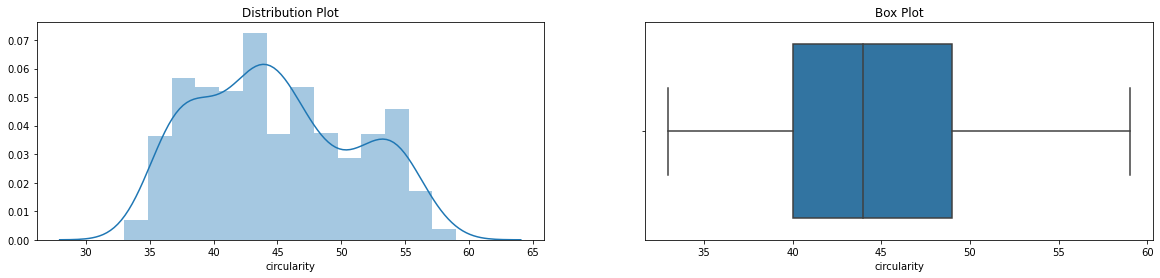

In [238]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['circularity'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in circularity column and it's looks like normally distributed

Text(0.5, 1.0, 'Box Plot')

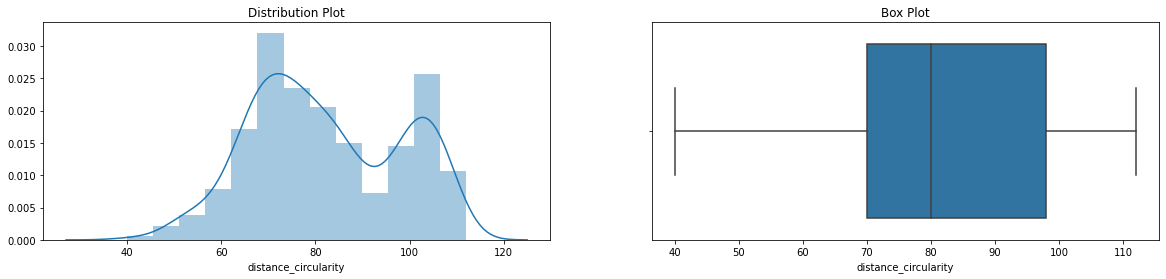

In [239]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['distance_circularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['distance_circularity'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in distance_circularity column but in distribution plot we can see that there are two peaks and we can see that there is right skewness because long tail is at the right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

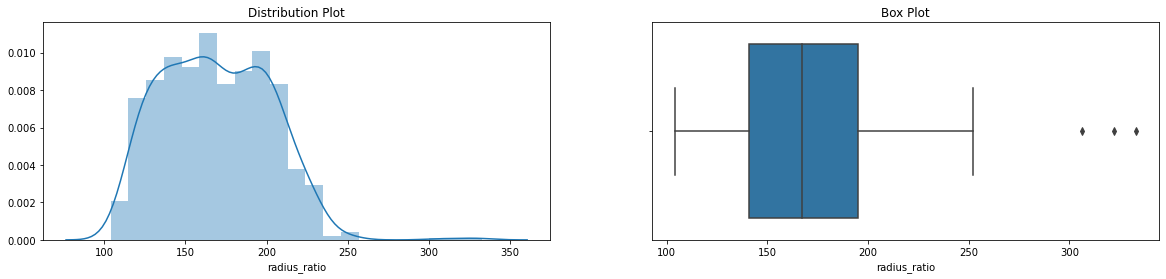

In [242]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['radius_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['radius_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in radius_ratio column and there is right skewness because long tail is at the right side(mean>median)

In [243]:
#check how many outliers are there in radius_ratio column
q1 = np.quantile(impute_vehicle_df['radius_ratio'],0.25)
q2 = np.quantile(impute_vehicle_df['radius_ratio'],0.50)
q3 = np.quantile(impute_vehicle_df['radius_ratio'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("radius_ratio above",impute_vehicle_df['radius_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in radius_ratio column are",impute_vehicle_df[impute_vehicle_df['radius_ratio']>276]['radius_ratio'].shape[0])

Quartie1:: 141.0
Quartie2:: 167.0
Quartie3:: 195.0
Inter Quartie Range:: 54.0
radius_ratio above 276.0 are outliers
The Outliers in radius_ratio column are 3


Text(0.5, 1.0, 'Box Plot')

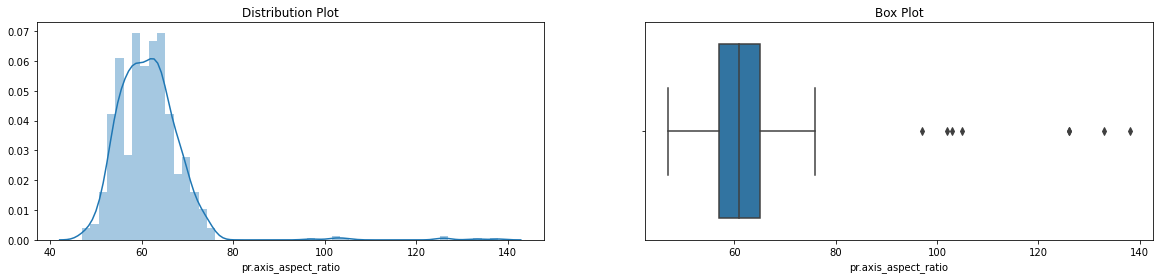

In [244]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['pr.axis_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['pr.axis_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in pr.axis_aspect_ratio column and there is right skewness because long tail is at right side(mean>median)

In [245]:
#check how many outliers are there in pr.axis_aspect_ratio column
q1 = np.quantile(impute_vehicle_df['pr.axis_aspect_ratio'],0.25)
q2 = np.quantile(impute_vehicle_df['pr.axis_aspect_ratio'],0.50)
q3 = np.quantile(impute_vehicle_df['pr.axis_aspect_ratio'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("pr.axis_aspect_ratio above",impute_vehicle_df['pr.axis_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in pr.axis_aspect_ratio column are",impute_vehicle_df[impute_vehicle_df['pr.axis_aspect_ratio']>77]['pr.axis_aspect_ratio'].shape[0])

Quartie1:: 57.0
Quartie2:: 61.0
Quartie3:: 65.0
Inter Quartie Range:: 8.0
pr.axis_aspect_ratio above 77.0 are outliers
The Outliers in pr.axis_aspect_ratio column are 8


Text(0.5, 1.0, 'Box Plot')

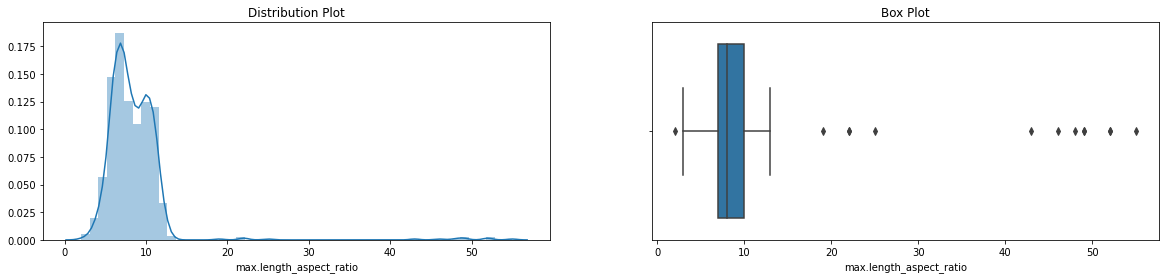

In [246]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['max.length_aspect_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['max.length_aspect_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in max.length_aspect_ratio and there is a right skewness because long tail is at right side(mean>median)

In [247]:
#check how many outliers are there in max.length_aspect_ratio column
q1 = np.quantile(impute_vehicle_df['max.length_aspect_ratio'],0.25)
q2 = np.quantile(impute_vehicle_df['max.length_aspect_ratio'],0.50)
q3 = np.quantile(impute_vehicle_df['max.length_aspect_ratio'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("max.length_aspect_ratio above",impute_vehicle_df['max.length_aspect_ratio'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("max.length_aspect_ratio below",impute_vehicle_df['max.length_aspect_ratio'].quantile(0.25)-(1.5 * IQR),"are outliers")
print("The above Outliers in max.length_aspect_ratio column are",impute_vehicle_df[impute_vehicle_df['max.length_aspect_ratio']>14.5]['max.length_aspect_ratio'].shape[0])
print("The below Outliers in max.length_aspect_ratio column are",impute_vehicle_df[impute_vehicle_df['max.length_aspect_ratio']<2.5]['max.length_aspect_ratio'].shape[0])

Quartie1:: 7.0
Quartie2:: 8.0
Quartie3:: 10.0
Inter Quartie Range:: 3.0
max.length_aspect_ratio above 14.5 are outliers
max.length_aspect_ratio below 2.5 are outliers
The above Outliers in max.length_aspect_ratio column are 12
The below Outliers in max.length_aspect_ratio column are 1


Text(0.5, 1.0, 'Box Plot')

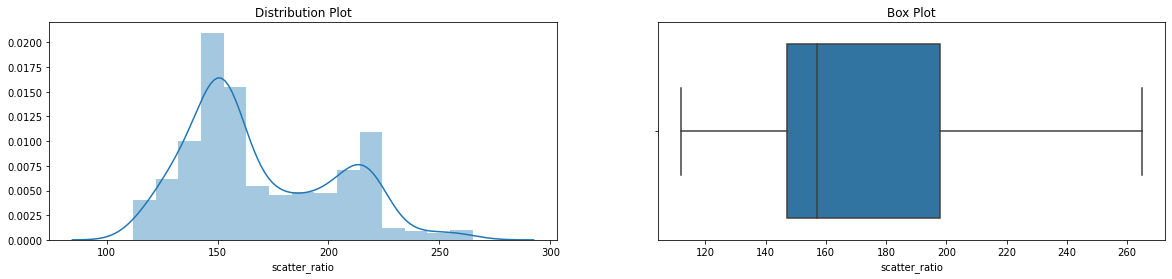

In [248]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scatter_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scatter_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

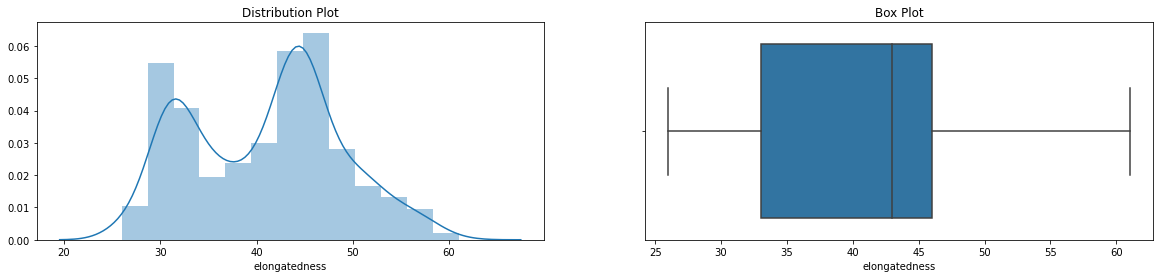

In [249]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['elongatedness'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['elongatedness'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

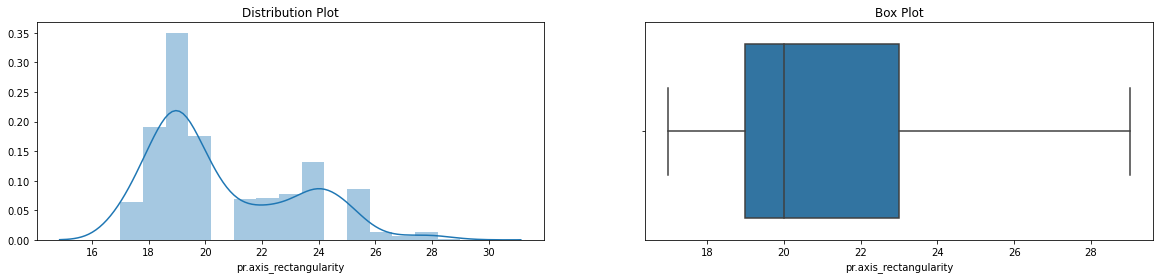

In [250]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['pr.axis_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['pr.axis_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

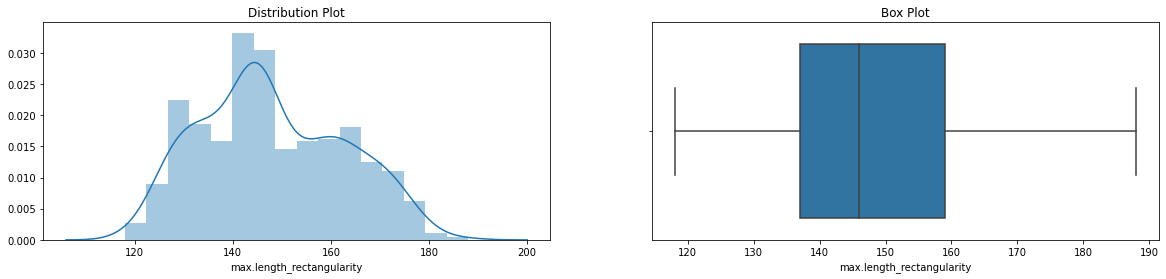

In [251]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['max.length_rectangularity'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['max.length_rectangularity'],ax=ax2)
ax2.set_title("Box Plot")

# Observation:
From above we can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

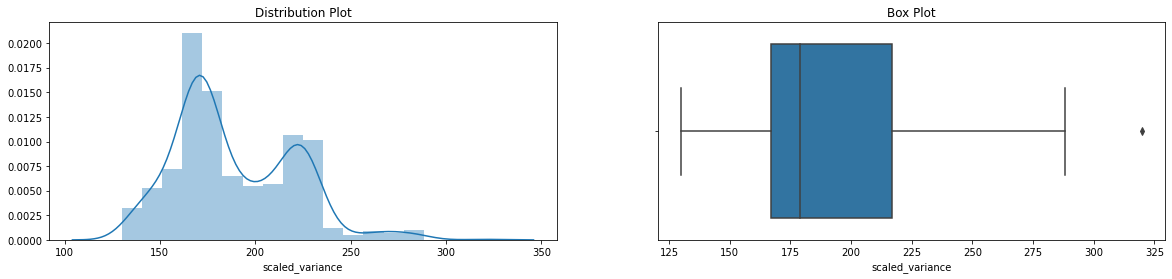

In [252]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scaled_variance'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scaled_variance'],ax=ax2)
ax2.set_title("Box Plot")

# Observation:
From above we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [253]:
#check how many outliers are there in scaled_variance column
q1 = np.quantile(impute_vehicle_df['scaled_variance'],0.25)
q2 = np.quantile(impute_vehicle_df['scaled_variance'],0.50)
q3 = np.quantile(impute_vehicle_df['scaled_variance'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance above",impute_vehicle_df['scaled_variance'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance column are",impute_vehicle_df[impute_vehicle_df['scaled_variance']>292]['scaled_variance'].shape[0])

Quartie1:: 167.0
Quartie2:: 179.0
Quartie3:: 217.0
Inter Quartie Range:: 50.0
scaled_variance above 292.0 are outliers
The Outliers in scaled_variance column are 1


Text(0.5, 1.0, 'Box Plot')

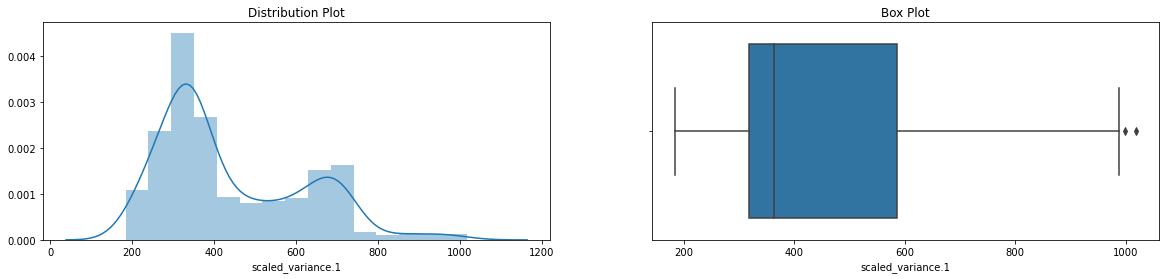

In [254]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scaled_variance.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scaled_variance.1'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side(mean>median)

In [255]:
#check how many outliers are there in scaled_variance.1 column
q1 = np.quantile(impute_vehicle_df['scaled_variance.1'],0.25)
q2 = np.quantile(impute_vehicle_df['scaled_variance.1'],0.50)
q3 = np.quantile(impute_vehicle_df['scaled_variance.1'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_variance.1 above",impute_vehicle_df['scaled_variance.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_variance.1 column are",impute_vehicle_df[impute_vehicle_df['scaled_variance.1']>989.5]['scaled_variance.1'].shape[0])

Quartie1:: 318.25
Quartie2:: 363.5
Quartie3:: 586.75
Inter Quartie Range:: 268.5
scaled_variance.1 above 989.5 are outliers
The Outliers in scaled_variance.1 column are 2


Text(0.5, 1.0, 'Box Plot')

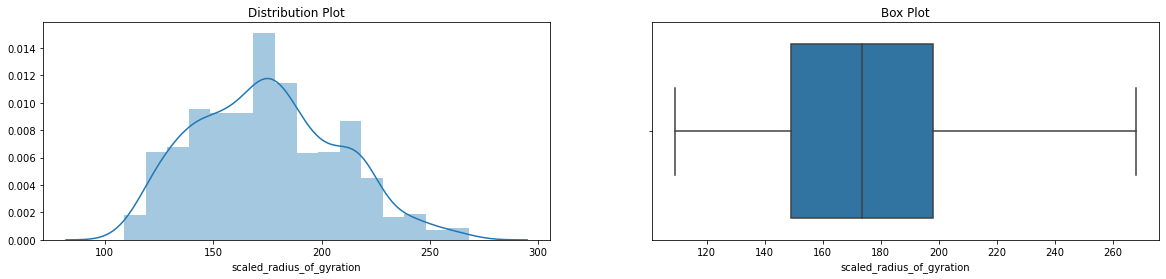

In [256]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side(mean>median)

Text(0.5, 1.0, 'Box Plot')

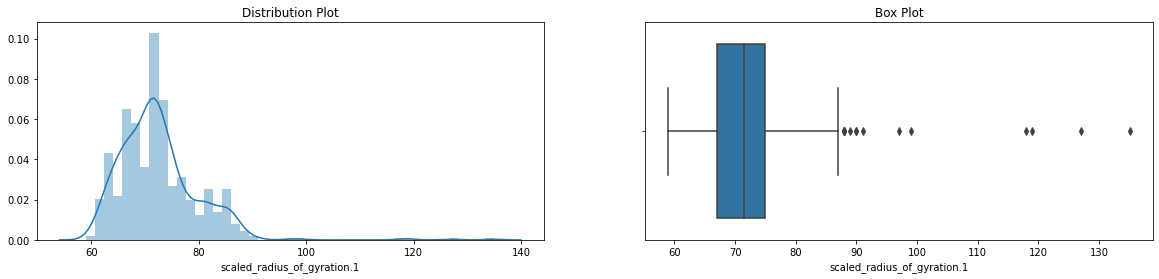

In [257]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['scaled_radius_of_gyration.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['scaled_radius_of_gyration.1'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side(mean>median)

In [258]:
#check how many outliers are there in scaled_radius_of_gyration.1 column
q1 = np.quantile(impute_vehicle_df['scaled_radius_of_gyration.1'],0.25)
q2 = np.quantile(impute_vehicle_df['scaled_radius_of_gyration.1'],0.50)
q3 = np.quantile(impute_vehicle_df['scaled_radius_of_gyration.1'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("scaled_radius_of_gyration.1 above",impute_vehicle_df['scaled_radius_of_gyration.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in scaled_radius_of_gyration.1 column are",impute_vehicle_df[impute_vehicle_df['scaled_radius_of_gyration.1']>87]['scaled_radius_of_gyration.1'].shape[0])

Quartie1:: 67.0
Quartie2:: 71.5
Quartie3:: 75.0
Inter Quartie Range:: 8.0
scaled_radius_of_gyration.1 above 87.0 are outliers
The Outliers in scaled_radius_of_gyration.1 column are 15


Text(0.5, 1.0, 'Box Plot')

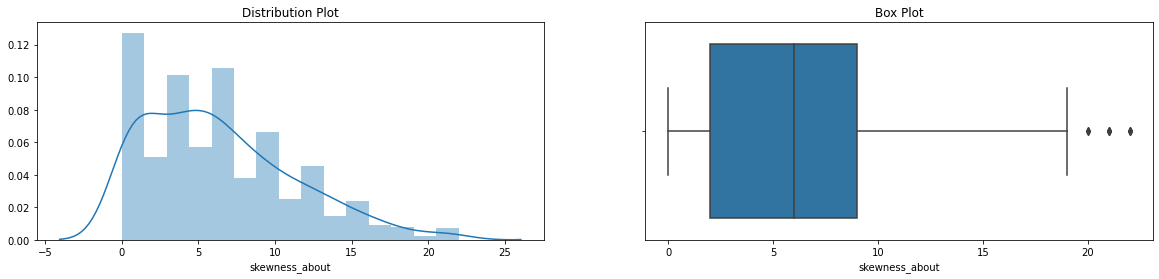

In [259]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['skewness_about'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['skewness_about'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side(mean>median)

In [260]:
#check how many outliers are there in skewness_about column
q1 = np.quantile(impute_vehicle_df['skewness_about'],0.25)
q2 = np.quantile(impute_vehicle_df['skewness_about'],0.50)
q3 = np.quantile(impute_vehicle_df['skewness_about'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about above",impute_vehicle_df['skewness_about'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about column are",impute_vehicle_df[impute_vehicle_df['skewness_about']>19.5]['skewness_about'].shape[0])

Quartie1:: 2.0
Quartie2:: 6.0
Quartie3:: 9.0
Inter Quartie Range:: 7.0
skewness_about above 19.5 are outliers
The Outliers in skewness_about column are 12


Text(0.5, 1.0, 'Box Plot')

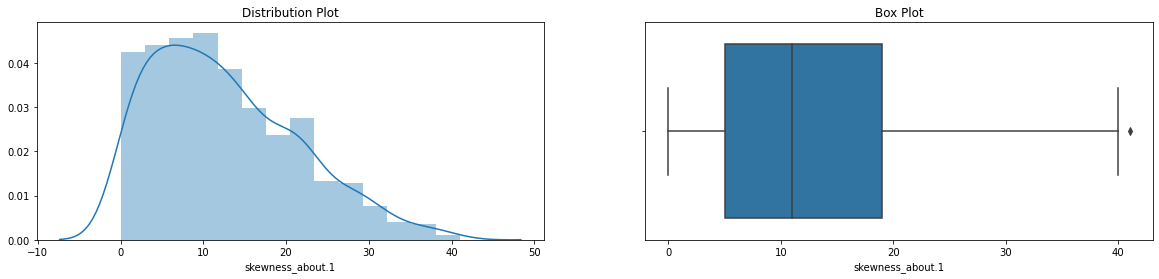

In [261]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['skewness_about.1'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['skewness_about.1'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are outliers in skewness_about.1 column and there is right skewness because long tail is at right side(mean>median)

In [262]:
#check how many outliers are there in skewness_about.1 column
q1 = np.quantile(impute_vehicle_df['skewness_about.1'],0.25)
q2 = np.quantile(impute_vehicle_df['skewness_about.1'],0.50)
q3 = np.quantile(impute_vehicle_df['skewness_about.1'],0.75)
IQR = q3-q1

print("Quartie1::",q1)
print("Quartie2::",q2)
print("Quartie3::",q3)
print("Inter Quartie Range::",IQR)

#outliers = q3 + 1.5*IQR, q1 - 1.5*IQR
print("skewness_about.1 above",impute_vehicle_df['skewness_about.1'].quantile(0.75)+(1.5 * IQR),"are outliers")
print("The Outliers in skewness_about.1 column are",impute_vehicle_df[impute_vehicle_df['skewness_about.1']>40]['skewness_about.1'].shape[0])

Quartie1:: 5.0
Quartie2:: 11.0
Quartie3:: 19.0
Inter Quartie Range:: 14.0
skewness_about.1 above 40.0 are outliers
The Outliers in skewness_about.1 column are 1


Text(0.5, 1.0, 'Box Plot')

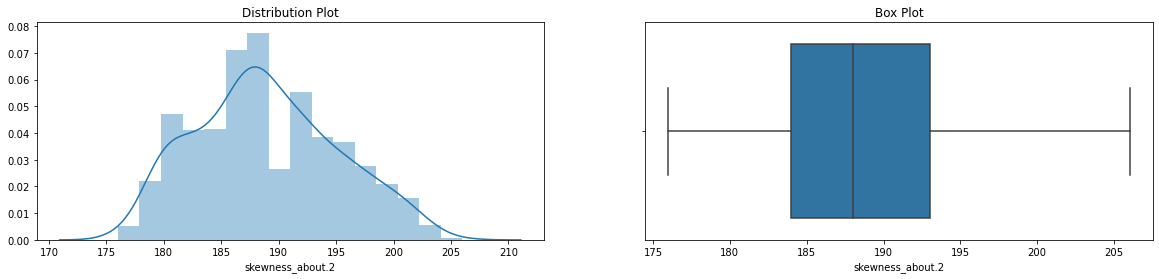

In [263]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['skewness_about.2'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['skewness_about.2'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side(mean<median)

Text(0.5, 1.0, 'Box Plot')

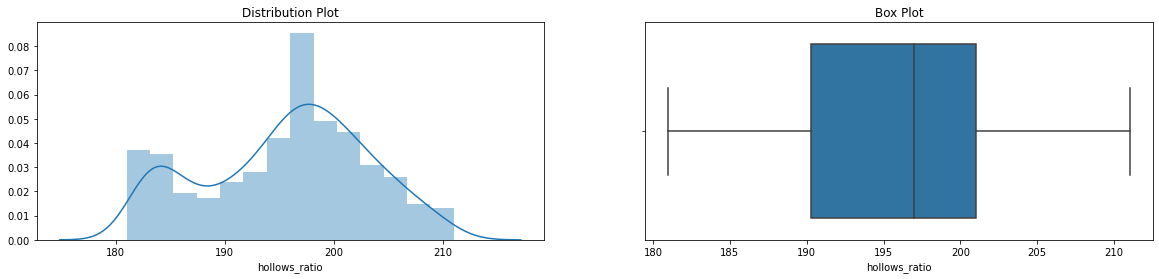

In [264]:
fig,(ax1,ax2) = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(20,4)
sns.distplot(impute_vehicle_df['hollows_ratio'],ax=ax1)
ax1.set_title("Distribution Plot")

sns.boxplot(impute_vehicle_df['hollows_ratio'],ax=ax2)
ax2.set_title("Box Plot")

##### Observation:
From above we can see that there are no outliers in hollows_ratio column and there is left skewness because long tail is at left side(mean<median)

In [265]:
impute_vehicle_df['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

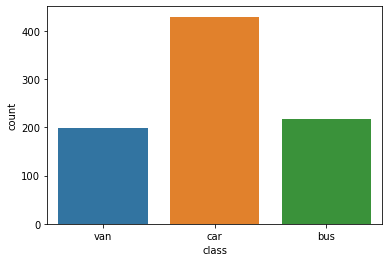

In [266]:
sns.countplot(impute_vehicle_df['class'])
plt.show()

From above we can see that cars are most followed by bus and then vans.

so by now we analyze each column and we found that there are outliers in some column. now our next step is to know whether these outliers are natural or artificial. if natural then we have to do nothing but if these outliers are artificial then we have to handle these outliers. we have 8 columns in which we found outliers: ->radius_ratio ->pr.axis_aspect_ratio ->max.length_aspect_ratio ->scaled_variance ->scaled_variance.1 ->scaled_radius_of_gyration.1 ->skewness_about ->skewness_about.1

after seeing the max values of above outliers column. it's looks like outliers in above columns are natural not a typo mistake or artificial. as we will apply SVM on above data which is affected by outliers. so better to drop those outliers.


### Fix Outliers after imputing missing values

In [267]:
#radius_ratio column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['radius_ratio']>276].index,axis=0,inplace=True)

In [268]:
#pr.axis_aspect_ratio column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['pr.axis_aspect_ratio']>77].index,axis=0,inplace=True)

In [269]:
#max.length_aspect_ratio column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['max.length_aspect_ratio']>14.5].index,axis=0,inplace=True)
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['max.length_aspect_ratio']<2.5].index,axis=0,inplace=True)

In [270]:
#scaled_variance column outliers
impute_vehicle_df[impute_vehicle_df['scaled_variance']>292]

Empty DataFrame
Columns: [compactness, circularity, distance_circularity, radius_ratio, pr.axis_aspect_ratio, max.length_aspect_ratio, scatter_ratio, elongatedness, pr.axis_rectangularity, max.length_rectangularity, scaled_variance, scaled_variance.1, scaled_radius_of_gyration, scaled_radius_of_gyration.1, skewness_about, skewness_about.1, skewness_about.2, hollows_ratio, class]
Index: []

##### Observation:
From above we can see that scaled_variance column outliers has been removed

In [271]:
#scaled_variance.1 column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['scaled_variance.1']>989.5].index,axis=0,inplace=True)

In [272]:
#scaled_radius_of_gyration.1 column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['scaled_radius_of_gyration.1']>87].index,axis=0,inplace=True)

In [273]:
#skewness_about column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['skewness_about']>19.5].index,axis=0,inplace=True)

In [274]:
#skewness_about.1 column outliers
impute_vehicle_df.drop(impute_vehicle_df[impute_vehicle_df['skewness_about.1']>40].index,axis=0,inplace=True)

In [275]:
#display the shape of data frame
print("after fixing outliers shape of dataframe:",impute_vehicle_df.shape)

after fixing outliers shape of dataframe: (813, 19)


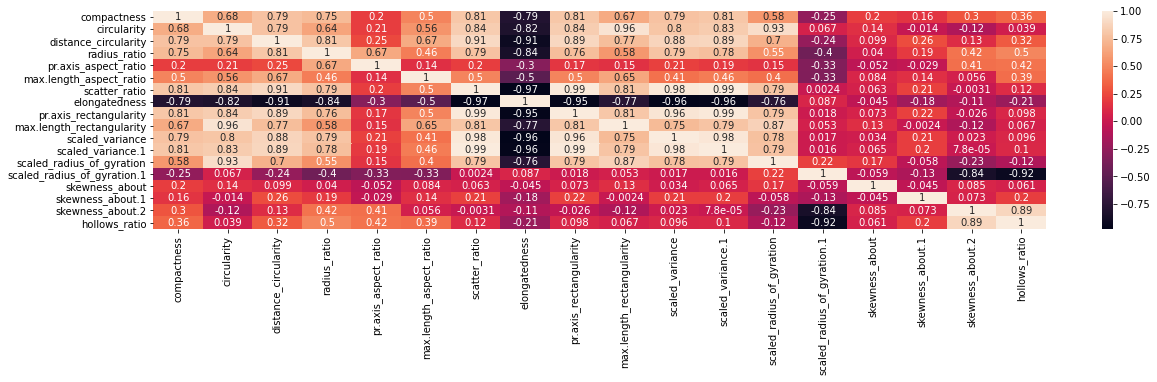

In [276]:
plt.figure(figsize=(20,4))
sns.heatmap(impute_vehicle_df.corr(),annot=True)
plt.show()

so our objective is to reocgnize whether an object is a van or bus or car based on some input features. so our main assumption is there is little or no multicollinearity between the features. if two features is highly correlated then there is no use in using both features.in that case, we can drop one feature. so heatmap gives us the correlation matrix there we can see which features are highly correlated. From above correlation matrix we can see that there are many features which are highly correlated. if we see carefully then scaled_variance.1 and scatter_ratio has 1 correlation and many other features also there which having more than 0.9 correlation so we will drop those columns whose correlation is +-0.9 or above. so there are 8 such columns: ->max.length_rectangularity ->scaled_radius_of_gyration ->skewness_about.2 ->scatter_ratio ->elongatedness ->pr.axis_rectangularity ->scaled_variance ->scaled_variance.1

now, again we have two option we will drop those above eight columns manually or we will apply pca and let pca to be decided how it will explain above data which is in high dimension with smaller number of variables. we will see both approaches.

### With Principal Component Analysis(PCA) 

In [277]:
#now separate the dataframe into dependent and independent variables
impute_vehicle_df_independent_attr = impute_vehicle_df.drop('class',axis=1)
impute_vehicle_df_dependent_attr = impute_vehicle_df['class']
print("shape of impute_vehicle_df_independent_attr::",impute_vehicle_df_independent_attr.shape)
print("shape of impute_vehicle_df_dependent_attr::",impute_vehicle_df_dependent_attr.shape)

shape of impute_vehicle_df_independent_attr:: (813, 18)
shape of impute_vehicle_df_dependent_attr:: (813,)


In [278]:
#now sclaed the independent attribute and replace the dependent attr value with number
impute_vehicle_df_independent_attr_scaled = impute_vehicle_df_independent_attr.apply(zscore)
impute_vehicle_df_dependent_attr.replace({'car':0,'bus':1,'van':2},inplace=True)

In [279]:
#make the covariance matrix and we have 18 independent features so aur covariance matrix is 18*18 matrix
impute_cov_matrix = np.cov(impute_vehicle_df_independent_attr_scaled,rowvar=False)
print("Impute cov_matrix shape:",impute_cov_matrix.shape)
print("Impute Covariance_matrix",impute_cov_matrix)

Impute cov_matrix shape: (18, 18)
Impute Covariance_matrix [[ 1.00123153e+00  6.80164027e-01  7.87792814e-01  7.46906930e-01
   2.00881439e-01  4.98273207e-01  8.11840645e-01 -7.89531434e-01
   8.12866245e-01  6.74996601e-01  7.92438680e-01  8.13494150e-01
   5.78399755e-01 -2.53990635e-01  2.00887113e-01  1.61304844e-01
   2.95777412e-01  3.64608943e-01]
 [ 6.80164027e-01  1.00123153e+00  7.87747162e-01  6.41725205e-01
   2.06409699e-01  5.64854067e-01  8.44804611e-01 -8.16768295e-01
   8.41196310e-01  9.62404205e-01  8.03750964e-01  8.33508154e-01
   9.26281607e-01  6.67790806e-02  1.40563881e-01 -1.43598307e-02
  -1.16976151e-01  3.92302597e-02]
 [ 7.87792814e-01  7.87747162e-01  1.00123153e+00  8.09326627e-01
   2.45756551e-01  6.69657073e-01  9.06692225e-01 -9.09806087e-01
   8.95884623e-01  7.69635504e-01  8.85221631e-01  8.89286924e-01
   7.03348558e-01 -2.38231284e-01  9.89345733e-02  2.63832735e-01
   1.29070982e-01  3.22051625e-01]
 [ 7.46906930e-01  6.41725205e-01  8.0932662

In [280]:
#now with the help of above covariance matrix we will find eigen value and eigen vectors
impute_pca_to_learn_variance = PCA(n_components=18)
impute_pca_to_learn_variance.fit(impute_vehicle_df_independent_attr_scaled)

PCA(n_components=18)

In [281]:
#display explained variance ratio
impute_pca_to_learn_variance.explained_variance_ratio_

array([5.43385012e-01, 1.87386253e-01, 6.70690992e-02, 6.30665320e-02,
       4.97324675e-02, 3.65268566e-02, 1.79255090e-02, 1.25904175e-02,
       6.25572293e-03, 4.22850947e-03, 3.43129149e-03, 2.45487103e-03,
       1.66416799e-03, 1.48558789e-03, 1.07943424e-03, 9.83188815e-04,
       5.61620004e-04, 1.73459006e-04])

In [282]:
#display explained variance
impute_pca_to_learn_variance.explained_variance_

array([9.79297570e+00, 3.37710644e+00, 1.20873054e+00, 1.13659560e+00,
       8.96286859e-01, 6.58293128e-01, 3.23056525e-01, 2.26906613e-01,
       1.12741686e-01, 7.62069059e-02, 6.18393099e-02, 4.42420969e-02,
       2.99919142e-02, 2.67735138e-02, 1.94537446e-02, 1.77191935e-02,
       1.01216098e-02, 3.12610726e-03])

In [283]:
#display principal components
impute_pca_to_learn_variance.components_

array([[ 2.72251046e-01,  2.85370045e-01,  3.01486231e-01,
         2.72594510e-01,  9.85797647e-02,  1.94755787e-01,
         3.10518442e-01, -3.08438338e-01,  3.07548493e-01,
         2.76301073e-01,  3.02748114e-01,  3.07040626e-01,
         2.61520489e-01, -4.36323635e-02,  3.67057041e-02,
         5.88504115e-02,  3.48373860e-02,  8.28136172e-02],
       [-8.97284818e-02,  1.33173937e-01, -4.40259591e-02,
        -2.04232234e-01, -2.59136858e-01, -9.45756320e-02,
         7.23350799e-02, -1.16876769e-02,  8.40915278e-02,
         1.25836631e-01,  7.01998575e-02,  7.79336637e-02,
         2.09927277e-01,  5.03914450e-01, -1.45682524e-02,
        -9.33980545e-02, -5.01664210e-01, -5.06546563e-01],
       [-2.26045073e-02, -2.10809943e-01,  7.08780817e-02,
         4.02139629e-02, -1.14805227e-01, -1.39313484e-01,
         1.12924698e-01, -9.00330455e-02,  1.11063547e-01,
        -2.19877688e-01,  1.44818765e-01,  1.15323952e-01,
        -2.13627435e-01,  6.73920886e-02, -5.21623444e

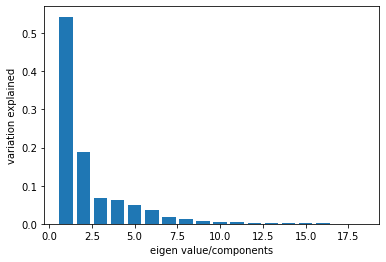

In [284]:
plt.bar(list(range(1,19)),impute_pca_to_learn_variance.explained_variance_ratio_)
plt.xlabel("eigen value/components")
plt.ylabel("variation explained")
plt.show()

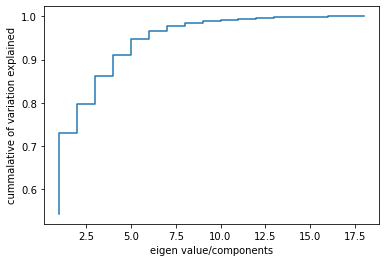

In [285]:
plt.step(list(range(1,19)),np.cumsum(impute_pca_to_learn_variance.explained_variance_ratio_))
plt.xlabel("eigen value/components")
plt.ylabel("cummalative of variation explained")
plt.show()

##### Observation:
From above we can see that 8 dimension are able to explain 95%variance of data. so we will use first 8 principal components

In [286]:
#use first 8 principal components
impute_pca_eight_components = PCA(n_components=8)
impute_pca_eight_components.fit(impute_vehicle_df_independent_attr_scaled)

PCA(n_components=8)

In [287]:
#transform the impute raw data which is in 18 dimension into 8 new dimension with pca
impute_vehicle_df_pca_independent_attr = impute_pca_eight_components.transform(impute_vehicle_df_independent_attr_scaled)

In [288]:
#display the shape of new_vehicle_df_pca_independent_attr
impute_vehicle_df_pca_independent_attr.shape

(813, 8)

##### Observation:
Now before apply pca with 8 dimension which are explaining more than 95% variantion of data we will make model on raw data after that we will make model with pca and then we will compare both models.

In [289]:
#now split the data into 80:20 ratio
impute_rawdata_X_train,impute_rawdata_X_test,impute_rawdata_y_train,impute_rawdata_y_test = train_test_split(impute_vehicle_df_independent_attr_scaled,impute_vehicle_df_dependent_attr,test_size=0.20,random_state=1)
impute_pca_X_train,impute_pca_X_test,impute_pca_y_train,impute_pca_y_test = train_test_split(impute_vehicle_df_pca_independent_attr,impute_vehicle_df_dependent_attr,test_size=0.20,random_state=1)

In [290]:
print("shape of impute_rawdata_X_train",impute_rawdata_X_train.shape)
print("shape of impute_rawdata_y_train",impute_rawdata_y_train.shape)
print("shape of impute_rawdata_X_test",impute_rawdata_X_test.shape)
print("shape of impute_rawdata_y_test",impute_rawdata_y_test.shape)
print("--------------------------------------------")
print("shape of impute_pca_X_train",impute_pca_X_train.shape)
print("shape of impute_pca_y_train",impute_pca_y_train.shape)
print("shape of impute_pca_X_test",impute_pca_X_test.shape)
print("shape of impute_pca_y_test",impute_pca_y_test.shape)

shape of impute_rawdata_X_train (650, 18)
shape of impute_rawdata_y_train (650,)
shape of impute_rawdata_X_test (163, 18)
shape of impute_rawdata_y_test (163,)
--------------------------------------------
shape of impute_pca_X_train (650, 8)
shape of impute_pca_y_train (650,)
shape of impute_pca_X_test (163, 8)
shape of impute_pca_y_test (163,)


In [291]:
#fit the model on impute raw data
svc.fit(impute_rawdata_X_train,impute_rawdata_y_train)

SVC()

In [292]:
#predict the y value
impute_rawdata_y_predict = svc.predict(impute_rawdata_X_test)

In [293]:
#now fit the model on pca data with new dimension
svc.fit(impute_pca_X_train,impute_pca_y_train)

SVC()

In [294]:
#predict the y value
impute_pca_y_predict = svc.predict(impute_pca_X_test)

In [295]:
#display accuracy score of both models
print("Accuracy score with impute raw data(18 dimension)",accuracy_score(impute_rawdata_y_test,impute_rawdata_y_predict))
print("Accuracy score with impute pca data(8 dimension)",accuracy_score(impute_pca_y_test,impute_pca_y_predict))

Accuracy score with impute raw data(18 dimension) 0.9693251533742331
Accuracy score with impute pca data(8 dimension) 0.9570552147239264


In [296]:
#display confusion matrix of both models
print("Confusion matrix with impute raw data(18 dimension)\n",confusion_matrix(impute_rawdata_y_test,impute_rawdata_y_predict))
print("Confusion matrix with impute pca data(8 dimension)\n",confusion_matrix(impute_pca_y_test,impute_pca_y_predict))

Confusion matrix with impute raw data(18 dimension)
 [[83  0  1]
 [ 0 53  0]
 [ 3  1 22]]
Confusion matrix with impute pca data(8 dimension)
 [[82  1  1]
 [ 0 53  0]
 [ 4  1 21]]


### With Dropping the above mentioned columns manually

In [297]:
#drop the columns
impute_vehicle_df_independent_attr_scaled.drop(['max.length_rectangularity','scaled_radius_of_gyration','skewness_about.2','scatter_ratio','elongatedness','pr.axis_rectangularity','scaled_variance','scaled_variance.1'],axis=1,inplace=True)

In [298]:
#display the shape of new dataframe
impute_vehicle_df_independent_attr_scaled.shape

(813, 10)

In [299]:
impute_dropcolumn_X_train,impute_dropcolumn_X_test,impute_dropcolumn_y_train,impute_dropcolumn_y_test = train_test_split(impute_vehicle_df_independent_attr_scaled,impute_vehicle_df_dependent_attr,test_size=0.20,random_state=1)

In [300]:
print("shape of impute_dropcolumn_X_train",impute_dropcolumn_X_train.shape)
print("shape of impute_dropcolumn_y_train",impute_dropcolumn_y_train.shape)
print("shape of impute_dropcolumn_X_test",impute_dropcolumn_X_test.shape)
print("shape of impute_dropcolumn_y_test",impute_dropcolumn_y_test.shape)

shape of impute_dropcolumn_X_train (650, 10)
shape of impute_dropcolumn_y_train (650,)
shape of impute_dropcolumn_X_test (163, 10)
shape of impute_dropcolumn_y_test (163,)


In [301]:
#fit the model on dropcolumn_X_train,dropcolumn_y_train
svc.fit(impute_dropcolumn_X_train,impute_dropcolumn_y_train)

SVC()

In [302]:
#predict the y value
impute_dropcolumn_y_predict = svc.predict(impute_dropcolumn_X_test)

In [303]:
#display the accuracy score and confusion matrix
print("Accuracy score with impute dropcolumn data(10 dimension)",accuracy_score(impute_dropcolumn_y_test,impute_dropcolumn_y_predict))
print("Confusion matrix with impute dropcolumn data(10 dimension)\n",confusion_matrix(impute_dropcolumn_y_test,impute_dropcolumn_y_predict))

Accuracy score with impute dropcolumn data(10 dimension) 0.9325153374233128
Confusion matrix with impute dropcolumn data(10 dimension)
 [[82  0  2]
 [ 0 53  0]
 [ 8  1 17]]


### Conclusion:
From above we can see that pca is doing a very good job.Accuracy with pca is approx 94% and with raw data approx 96% but note that pca 94% accuracy is with only 8 dimension where as rawdata has 18 dimension.But every thing has two sides, disadvantage of pca is we cannot do interpretation with the model.it's blackbox.

# Part IV
#### DOMAIN: 
Sports management
#### CONTEXT: 
Company X is a sports management company for international cricket.
#### DATA DESCRIPTION: The data is collected belongs to batsman from IPL series conducted so far. Attribute Information:
- Runs: Runs score by the batsman
- Ave: Average runs scored by the batsman per match
- SR: strike rate of the batsman
- Fours: number of boundary/four scored
- Six: number of boundary/six scored
- HF: number of half centuries scored so far
#### PROJECT OBJECTIVE: 
Goal is to build a data driven batsman ranking model for the sports management company to make business decisions.
Steps and tasks: [ Total Score: 5 points]
- EDA and visualisation: Create a detailed performance report using univariate, bi-variate and multivariate EDA techniques. Find out all possible hidden patterns by using all possible methods.
- Build a data driven model to rank all the players in the dataset using all or the most important performance features.


In [2]:
# All necessary packages have been imported for the previous questions
# Hence it is not required here

In [3]:
cricket = pd.read_csv('Part4 - batting_bowling_ipl_bat.csv')

In [4]:
cricket = cricket.dropna()

In [5]:
cricket.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

In [6]:
cricket.shape

(90, 7)

In [7]:
cricket

Name   Runs    Ave      SR  Fours  Sixes   HF
1       CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3      G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5       V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7       CL White  479.0  43.54  149.68   41.0   20.0  5.0
9       S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0
..           ...    ...    ...     ...    ...    ...  ...
171       Z Khan   12.0   6.00   70.58    1.0    0.0  0.0
173   WD Parnell   19.0   4.75   70.37    2.0    0.0  0.0
175  PC Valthaty   30.0   5.00   58.82    4.0    0.0  0.0
177     RP Singh    6.0   3.00   50.00    0.0    0.0  0.0
179     R Sharma    2.0   0.50   18.18    0.0    0.0  0.0

[90 rows x 7 columns]

In [8]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    90 non-null     object 
 1   Runs    90 non-null     float64
 2   Ave     90 non-null     float64
 3   SR      90 non-null     float64
 4   Fours   90 non-null     float64
 5   Sixes   90 non-null     float64
 6   HF      90 non-null     float64
dtypes: float64(6), object(1)
memory usage: 5.3+ KB


Here, you can see all the column names, total values and type of the values.

We have Numerical variables which contains number as values in all of the columns in the dataset

In [9]:
cricket.describe()

# You can see the descriptive statistics of numerical variables such as total count, mean, 
# standard deviation, minimum and maximum values and three quantiles of the data (25%,50%,75%).

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

In [10]:
cricket.isnull().sum() #checks if there are any missing values

Name     0
Runs     0
Ave      0
SR       0
Fours    0
Sixes    0
HF       0
dtype: int64

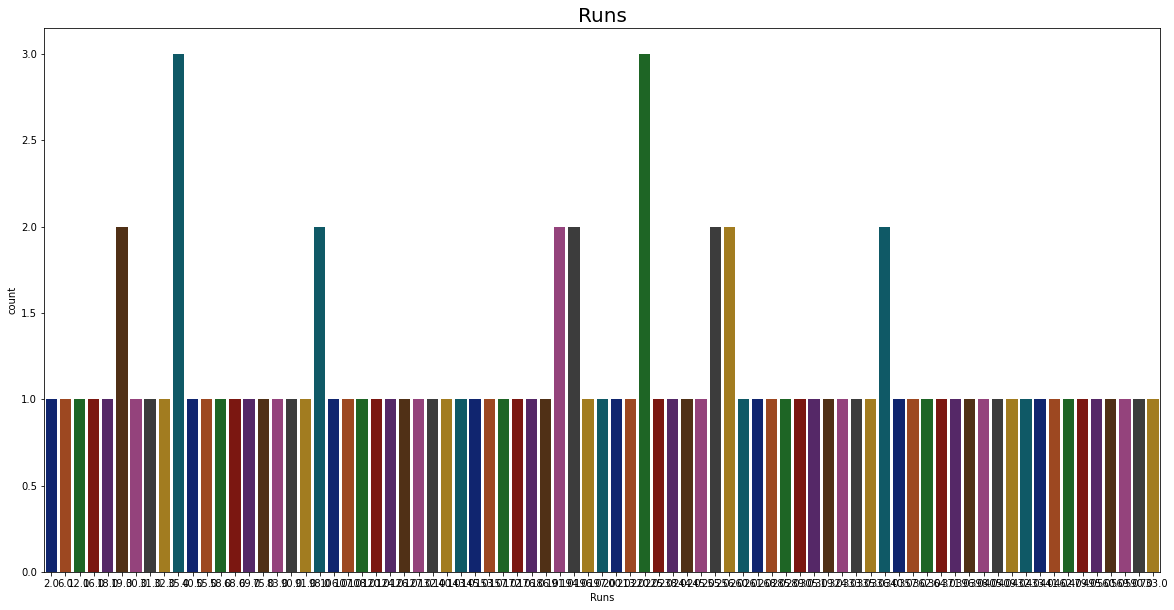

In [11]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cricket['Runs'], palette = 'dark')
plt.title('Runs',fontsize = 20)
plt.show()

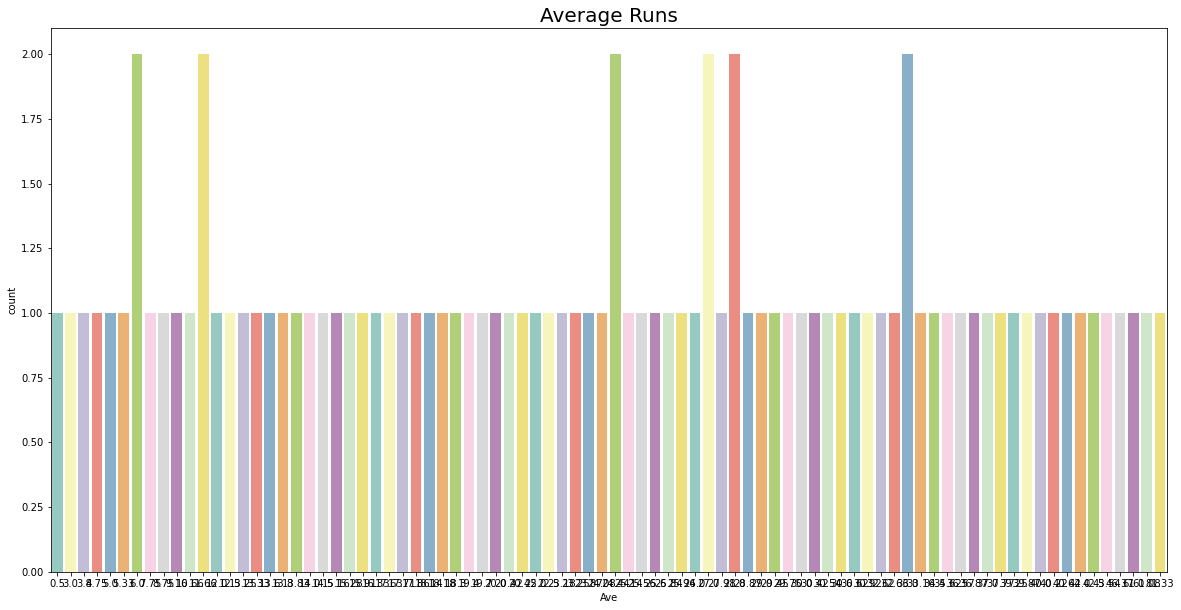

In [12]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cricket['Ave'], palette = 'Set3')
plt.title('Average Runs',fontsize = 20)
plt.show()

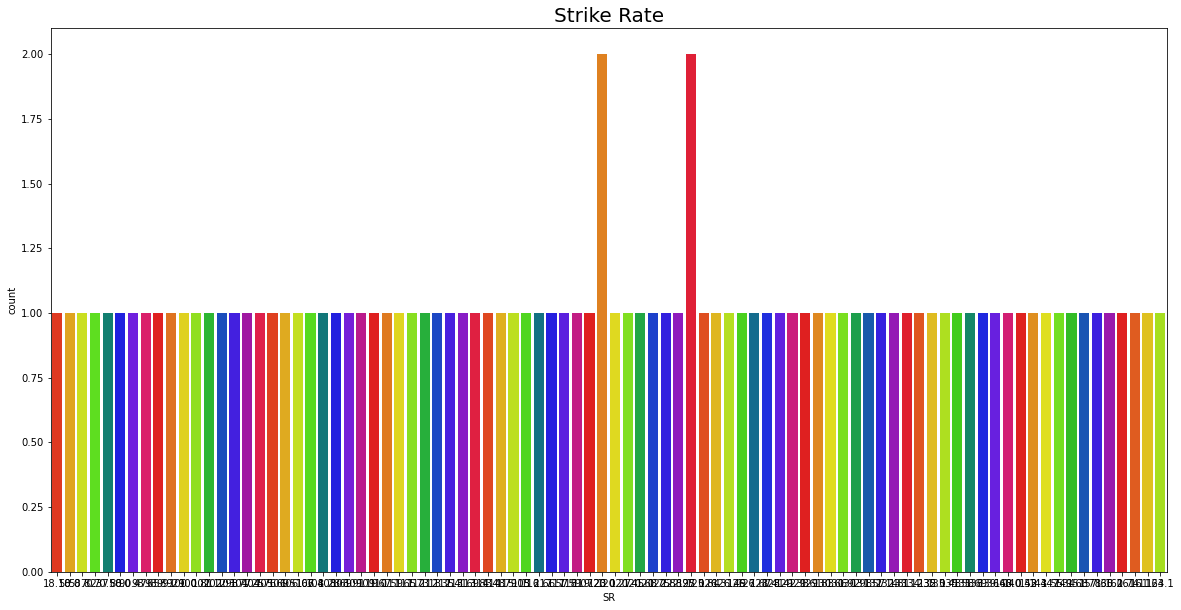

In [13]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cricket['SR'], palette = 'prism')
plt.title('Strike Rate',fontsize = 20)
plt.show()

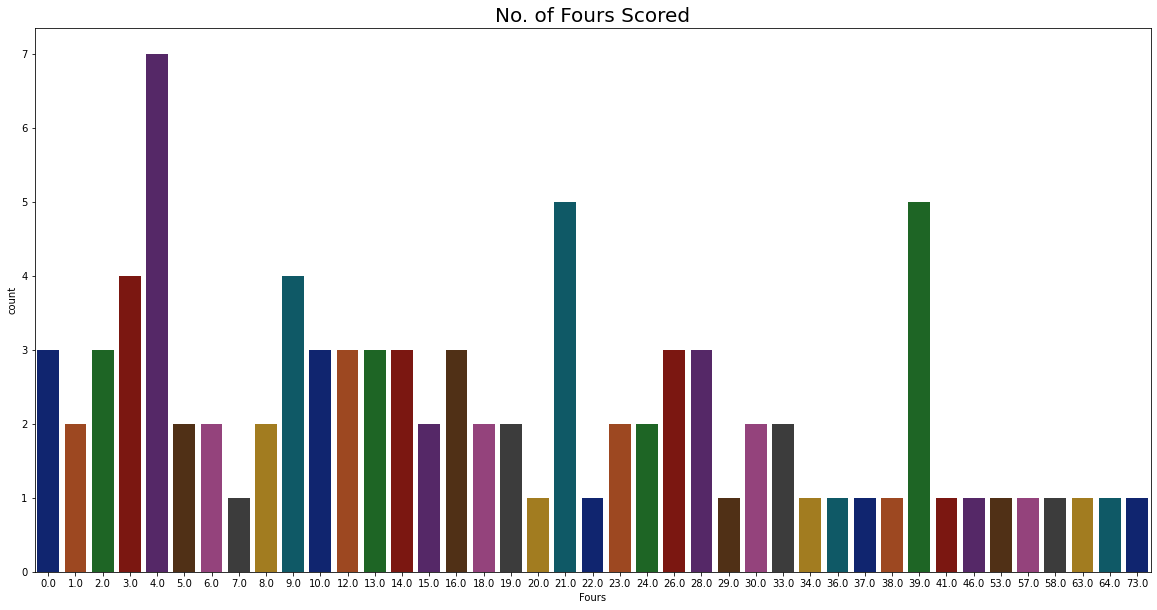

In [14]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cricket['Fours'], palette = 'dark')
plt.title('No. of Fours Scored',fontsize = 20)
plt.show()

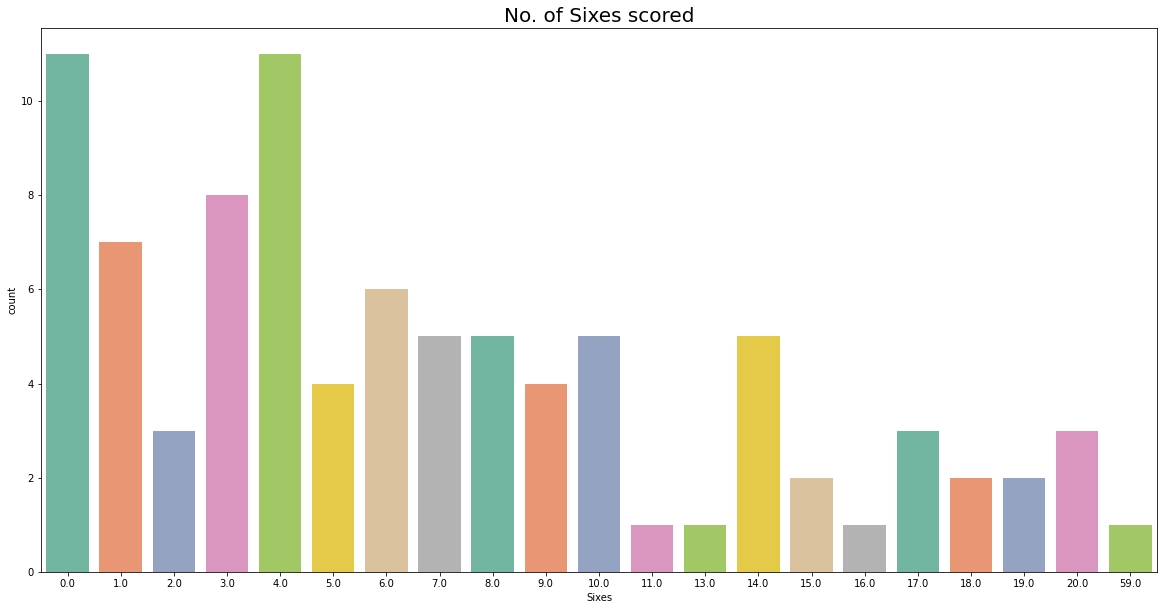

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cricket['Sixes'], palette = 'Set2')
plt.title('No. of Sixes scored',fontsize = 20)
plt.show()

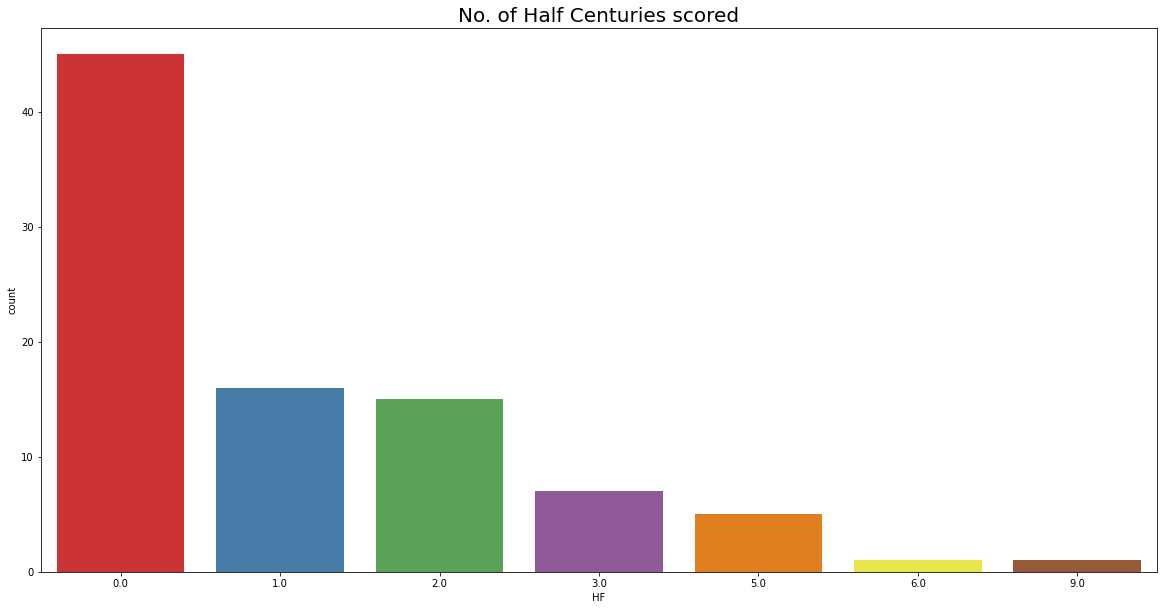

In [16]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(cricket['HF'], palette = 'Set1')
plt.title('No. of Half Centuries scored',fontsize = 20)
plt.show()

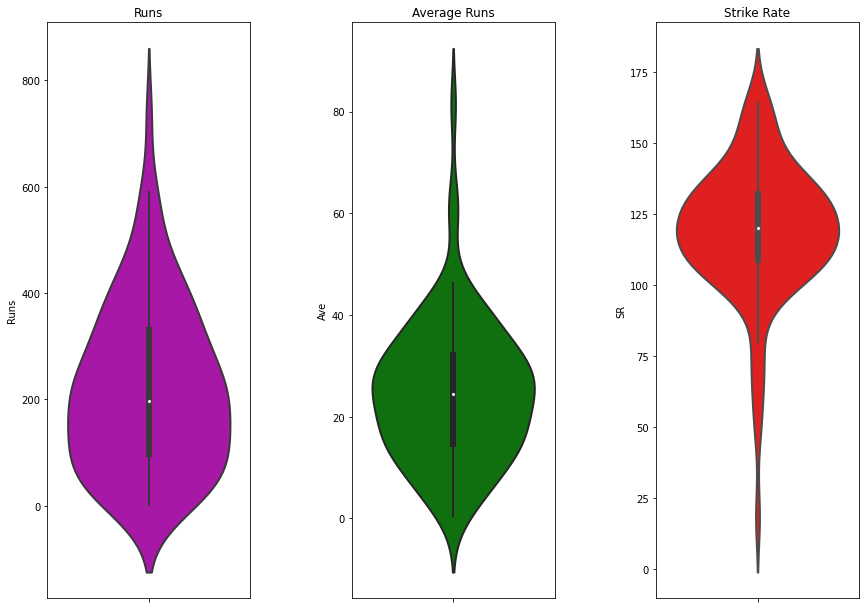

In [17]:
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9,
                      wspace=0.5, hspace=0.2)

plt.subplot(141)
plt.title('Runs')
sns.violinplot(y='Runs',data=cricket,color='m',linewidth=2)

plt.subplot(142)
plt.title('Average Runs')
sns.violinplot(y='Ave',data=cricket,color='g',linewidth=2)

plt.subplot(143)
plt.title('Strike Rate')
sns.violinplot(y='SR',data=cricket,color='r',linewidth=2)

plt.show()

##### Observation:
- In the 'Runs' graph, the maximum number of runs lie between 100 to 320
- In the 'Average Runs' graph, the maximum number of runs lie between 15 to 32
- In the 'Strike rate' graph, the players with most frequent strike rate lie between 110 to 135

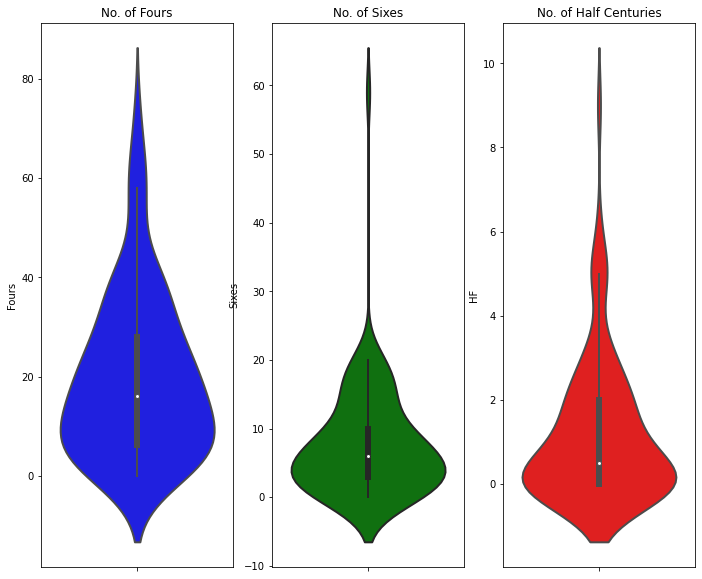

In [18]:
plt.subplot(151)
plt.title('No. of Fours')
sns.violinplot(y='Fours',data=cricket,color='b',linewidth=2)

plt.subplot(152)
plt.title('No. of Sixes')
sns.violinplot(y='Sixes',data=cricket,color='g',linewidth=2)

plt.subplot(153)
plt.title('No. of Half Centuries')
sns.violinplot(y='HF',data=cricket,color='r',linewidth=2)

plt.show()

##### Observation:
- In the 'No. of Fours' graph, the maximum number of fours lie between 8 to 28
- In the 'No. of Sixes' graph, the maximum number of sixes lie between 4 to 11
- In the 'No. of Half Centuries' graph, the players with most frequent no. of half centuries lie between 0 to 2

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


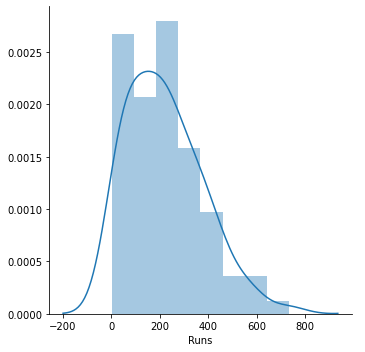

In [19]:
sns.FacetGrid(cricket, size=5).map(sns.distplot,"Runs").add_legend()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


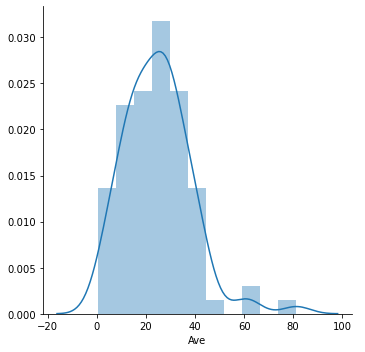

In [20]:
sns.FacetGrid(cricket, size=5).map(sns.distplot,"Ave").add_legend()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


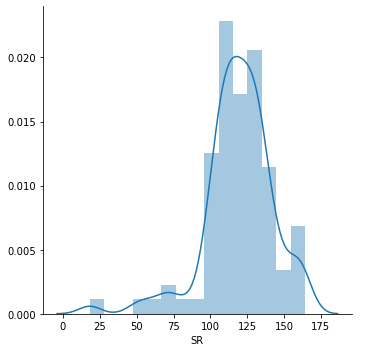

In [21]:
sns.FacetGrid(cricket, size=5).map(sns.distplot,"SR").add_legend()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


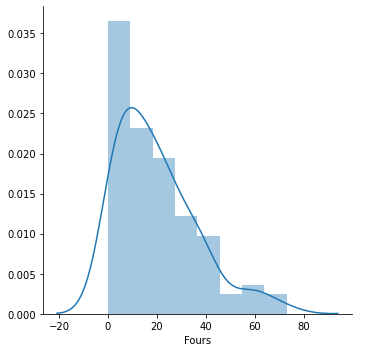

In [22]:
sns.FacetGrid(cricket, size=5).map(sns.distplot,"Fours").add_legend()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


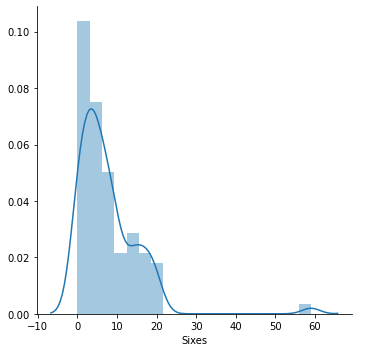

In [23]:
sns.FacetGrid(cricket, size=5).map(sns.distplot,"Sixes").add_legend()

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


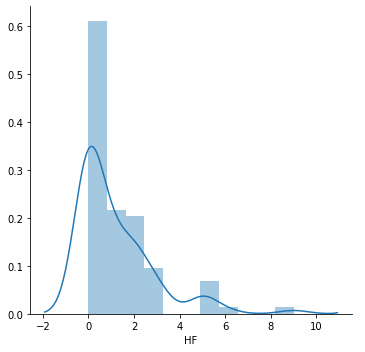

In [24]:
sns.FacetGrid(cricket, size=5).map(sns.distplot,"HF").add_legend()

In [25]:
cricket.describe()

# I have displayed this again simply because all the data in this is shown through the graphs present above

Runs        Ave          SR      Fours      Sixes         HF
count   90.000000  90.000000   90.000000  90.000000  90.000000  90.000000
mean   219.933333  24.729889  119.164111  19.788889   7.577778   1.188889
std    156.253669  13.619215   23.656547  16.399845   8.001373   1.688656
min      2.000000   0.500000   18.180000   0.000000   0.000000   0.000000
25%     98.000000  14.665000  108.745000   6.250000   3.000000   0.000000
50%    196.500000  24.440000  120.135000  16.000000   6.000000   0.500000
75%    330.750000  32.195000  131.997500  28.000000  10.000000   2.000000
max    733.000000  81.330000  164.100000  73.000000  59.000000   9.000000

# 

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


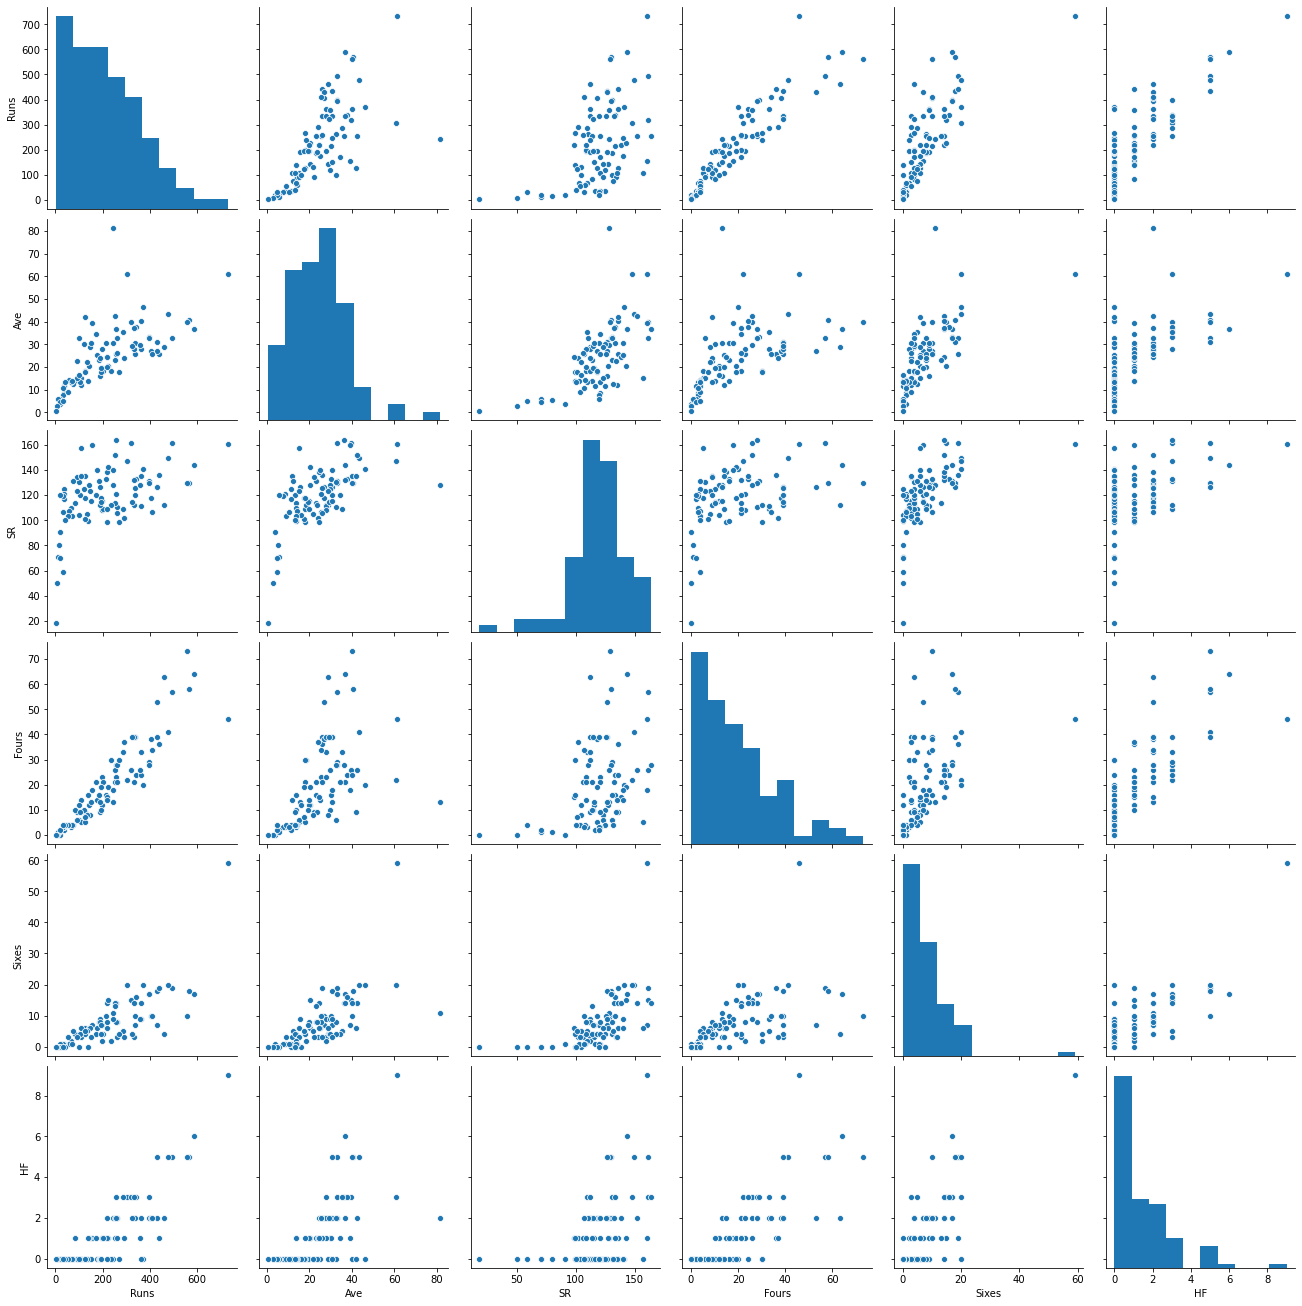

In [26]:
sns.pairplot(cricket, size=3)
plt.show()

##### Observation:
- Runs are very positively correlated with Average Runs and No. of Fours
- It very difficult to compute the correlation between strike rate and no. of fours
- Going through the principal axis are histograms of the particular attribute

### Method employed to Rank Players
Using the Dream 11 format, where each attribute of the player is given a prticular amount of weightage and then computing a composite score for each player. 

First we have to normalize the data (all six attributes have been given a score out of 10)
> For eg: if Chris Gayle has scored 733 runs, and 733 runs is the maximum numberof runs scored by any player, Chris Gayle gets a 10/10 in the runs column and so on.

#### We will compute using eigenvalues, eigenvectors and Principal Component Analysis which componenets contribute to variance and accordinly eliminate other attributes while computing final score.


#### Normalizing the data:

In [27]:
cricket.head()

Name   Runs    Ave      SR  Fours  Sixes   HF
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0

In [29]:
cricket_drop = cricket.drop(labels=['Name'], axis=1)
cricket_drop.head()

Runs    Ave      SR  Fours  Sixes   HF
1  733.0  61.08  160.74   46.0   59.0  9.0
3  590.0  36.87  143.55   64.0   17.0  6.0
5  495.0  33.00  161.23   57.0   19.0  5.0
7  479.0  43.54  149.68   41.0   20.0  5.0
9  569.0  40.64  129.61   58.0   18.0  5.0

In [32]:
cricket_drop['left_col'] = 1
cricket_drop.head()

Runs    Ave      SR  Fours  Sixes   HF  left_col
1  733.0  61.08  160.74   46.0   59.0  9.0         1
3  590.0  36.87  143.55   64.0   17.0  6.0         1
5  495.0  33.00  161.23   57.0   19.0  5.0         1
7  479.0  43.54  149.68   41.0   20.0  5.0         1
9  569.0  40.64  129.61   58.0   18.0  5.0         1

In [33]:
cols = cricket_drop.columns.tolist()
cols

['Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF', 'left_col']

In [35]:
#Here we are converting columns of the dataframe to list so it would be easier for us to reshuffle the columns.
#We are going to use cols.insert method
cols.insert(0, cols.pop(cols.index('left_col')))
cols

['left_col', 'Runs', 'Ave', 'SR', 'Fours', 'Sixes', 'HF']

In [36]:
cricket_drop = cricket_drop.reindex(columns = cols)

# By using df_drop.reindex(columns= cols) we are converting list to columns again
# Now we are separating features of our dataframe from the labels.

In [50]:
X = cricket_drop.iloc[:,1:7].values
y = cricket_drop.iloc[:,0].values
X

array([[7.3300e+02, 6.1080e+01, 1.6074e+02, 4.6000e+01, 5.9000e+01,
        9.0000e+00],
       [5.9000e+02, 3.6870e+01, 1.4355e+02, 6.4000e+01, 1.7000e+01,
        6.0000e+00],
       [4.9500e+02, 3.3000e+01, 1.6123e+02, 5.7000e+01, 1.9000e+01,
        5.0000e+00],
       [4.7900e+02, 4.3540e+01, 1.4968e+02, 4.1000e+01, 2.0000e+01,
        5.0000e+00],
       [5.6900e+02, 4.0640e+01, 1.2961e+02, 5.8000e+01, 1.8000e+01,
        5.0000e+00],
       [5.6000e+02, 4.0000e+01, 1.2933e+02, 7.3000e+01, 1.0000e+01,
        5.0000e+00],
       [3.0500e+02, 6.1000e+01, 1.4734e+02, 2.2000e+01, 2.0000e+01,
        3.0000e+00],
       [4.3300e+02, 3.0920e+01, 1.2660e+02, 3.9000e+01, 1.8000e+01,
        5.0000e+00],
       [3.1900e+02, 3.9870e+01, 1.6111e+02, 2.6000e+01, 1.5000e+01,
        3.0000e+00],
       [2.4400e+02, 8.1330e+01, 1.2842e+02, 1.3000e+01, 1.1000e+01,
        2.0000e+00],
       [2.5600e+02, 3.6570e+01, 1.6410e+02, 2.8000e+01, 1.4000e+01,
        3.0000e+00],
       [2.5500e+02, 4

In [51]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [52]:
np.shape(X)

(90, 6)

In [53]:
np.shape(y)

(90,)

#### Data Standardization:
Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance). It is useful to standardize attributes for a model. Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn; they might behave badly if the individual features do not more or less look like standard normally distributed data

In [54]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

#### Computing Eigen Values and Eigen Vectors
Before computing Eigen vectors and values we need to calculate covariance matrix.

#### Covariance matrix

In [55]:
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

Covariance matrix 
[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


In [56]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.01123596 0.70077082 0.49903347 0.9291323  0.77842677 0.84453142]
 [0.70077082 1.01123596 0.63061271 0.55234856 0.69008186 0.62772842]
 [0.49903347 0.63061271 1.01123596 0.38913406 0.59050396 0.43238784]
 [0.9291323  0.55234856 0.38913406 1.01123596 0.52844526 0.79249429]
 [0.77842677 0.69008186 0.59050396 0.52844526 1.01123596 0.77632221]
 [0.84453142 0.62772842 0.43238784 0.79249429 0.77632221 1.01123596]]


Text(0.5, 1.0, 'Covariance between different features')

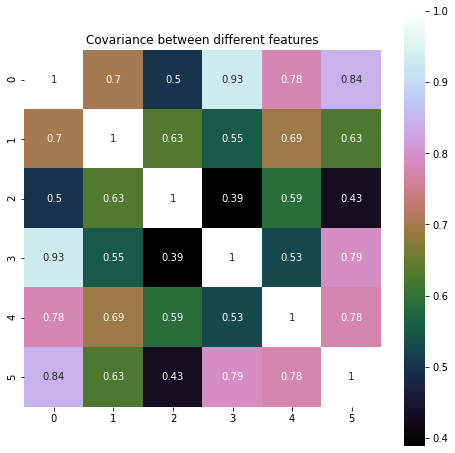

In [57]:
plt.figure(figsize=(8,8))
sns.heatmap(cov_mat, vmax=1, square=True,annot=True,cmap='cubehelix')

plt.title('Covariance between different features')

#### Eigen decomposition of the covariance matrix
This part is meat and juice of whole understanding of PCA. We calculate "Eigen Values" and "Eigen Vectors" of Covariance Matrix, which we calculated.

In [58]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-0.4582608  -0.26643209 -0.70483594 -0.45840889  0.10977942  0.00520142]
 [-0.39797313  0.33111756  0.0606373   0.10122837 -0.00550486 -0.84736307]
 [-0.3253838   0.69780334 -0.05624934  0.11890348  0.45013448  0.43275029]
 [-0.40574167 -0.47355804  0.58514214 -0.09676885  0.50823538  0.03252305]
 [-0.41733459  0.17902455  0.35786211 -0.39458014 -0.66942589  0.24878157]
 [-0.43237178 -0.27593225 -0.16096217  0.77486668 -0.28082541  0.17811777]]

Eigenvalues 
[4.30252561 0.83636692 0.01706297 0.16567829 0.41665751 0.32912443]


#### Selecting Principal Components
In order to decide which eigenvector(s) can dropped without losing too much explanation power of original feature values for the construction of lower-dimensional subspace, we need to inspect the corresponding eigenvalues: The eigenvectors with the lowest eigenvalues bear the least information about the variance of the data; those are the ones can be dropped because eigen vector components with low eigen values have low power to explain original values.

In [59]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
4.3025256072967215
0.8363669184835519
0.4166575087767157
0.3291244319930167
0.16567829190781497
0.017062971879265084


#### Explained Variance 
After sorting the eigenpairs, the next question is "how many principal components are we going to choose for our new feature subspace?" A useful measure is the so-called "explained variance," which can be calculated from the eigenvalues. The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [60]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

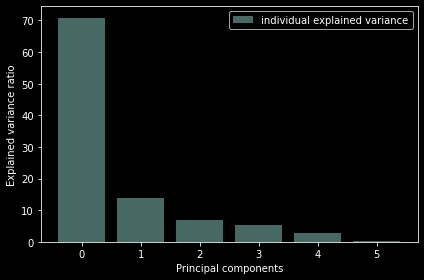

In [65]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(6), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

##### Observation:
The plot above clearly shows that maximum variance (somewhere around 70%) can be explained by the first principal component (labelled = 0) alone. The second principal component (labelled = 1) shares almost 15% amount of information. The remaining components share less amount of information as compared to the rest of the Principal components (> 10%). 
Together first and second components capture around 85% of variance explained. The model changes from 6 dimension to a two dimension model!

#### Projection Matrix

The construction of the projection matrix that will be used to transform the Human resouces analytics data onto the new feature subspace. Suppose only 1st and 2nd principal component shares the maximum amount of information say around 85%. Hence we can drop other components. Here, we are reducing the 6-dimensional feature space to a 2-dimensional feature subspace, by choosing the “top 2” eigenvectors with the highest eigenvalues to construct our d×k-dimensional eigenvector matrix W

In [67]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(6,1), 
                      eig_pairs[1][1].reshape(6,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.4582608  -0.26643209]
 [-0.39797313  0.33111756]
 [-0.3253838   0.69780334]
 [-0.40574167 -0.47355804]
 [-0.41733459  0.17902455]
 [-0.43237178 -0.27593225]]


#### Projection Onto the New Feature Space 
In this last step we will use the 6×2-dimensional projection matrix W to transform our samples onto the new subspace via the equation Y=X×W

In [68]:
Y = X_std.dot(matrix_w)
Y

array([[-8.51677407e+00,  3.54574790e-01],
       [-4.61833957e+00, -1.47672990e+00],
       [-4.14225050e+00, -4.71438127e-01],
       [-3.89941107e+00, -4.18155493e-02],
       [-4.12007165e+00, -1.40100174e+00],
       [-4.02443639e+00, -2.02508191e+00],
       [-2.87928084e+00,  1.49435388e+00],
       [-2.91901518e+00, -9.43018299e-01],
       [-2.32738860e+00,  1.13355142e+00],
       [-2.08164241e+00,  1.75793775e+00],
       [-2.08328069e+00,  1.16901158e+00],
       [-1.77694308e+00,  1.17265902e+00],
       [-2.12516667e+00, -1.03583873e-01],
       [-1.93887249e+00,  2.87326352e-01],
       [-1.72763623e+00,  1.37253008e+00],
       [-1.81713174e+00,  5.69579415e-02],
       [-1.86989515e+00, -4.19705512e-02],
       [-1.44931719e+00,  4.67061997e-01],
       [-1.79578490e+00, -1.20680898e+00],
       [-1.83452229e+00, -1.99101867e+00],
       [-6.85215121e-01,  1.75011952e+00],
       [-1.28111282e+00, -6.10477637e-01],
       [-1.23672458e+00,  8.39625442e-01],
       [-1.

#### Important Note:
My model will drop all features except first('Runs') and second('Average Runs') principal components. They will be used to compute a score based on weighatges on how much they affect variance.


#### Scaling
All attributes are scaled and given a score from 0-10

In [82]:
cricket_drop['Runs'] = (cricket_drop['Runs']/cricket_drop['Runs'].max())*10
cricket_drop['Ave'] = (cricket_drop['Ave']/cricket_drop['Ave'].max())*10
cricket_drop['SR'] = (cricket_drop['SR']/cricket_drop['SR'].max())*10
cricket_drop['Fours'] = (cricket_drop['Fours']/cricket_drop['Fours'].max())*10
cricket_drop['Sixes'] = (cricket_drop['Sixes']/cricket_drop['Sixes'].max())*10
cricket_drop['HF'] = (cricket_drop['HF']/cricket_drop['HF'].max())*10

In [89]:
cricket_drop.head()

left_col       Runs       Ave        SR     Fours      Sixes         HF
1         1  10.000000  7.510144  9.795247  6.301370  10.000000  10.000000
3         1   8.049113  4.533383  8.747715  8.767123   2.881356   6.666667
5         1   6.753070  4.057543  9.825107  7.808219   3.220339   5.555556
7         1   6.534789  5.353498  9.121268  5.616438   3.389831   5.555556
9         1   7.762619  4.996926  7.898233  7.945205   3.050847   5.555556

In [90]:
cricket['Overall Score'] = cricket_drop['Runs']*70/85.0 + cricket_drop['Ave']*15/85.0

In [91]:
cricket.head()

Name   Runs    Ave      SR  Fours  Sixes   HF  Overall Score
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0       9.560614
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0       7.428690
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0       6.277388
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0       6.326326
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0       7.274556

### Lets assign grades.
##### Criteria of the grades are as follows:
(Percentage wise)
- 80-100 : Grade A
- 60-80 : Grade B
- 45-60 : Grade C
- 20-45 : Grade D
- 0-20 : Grade E

In [92]:
#Assign the grades

def determine_grade(scores):
    if scores >= 8 and scores <= 10:
        return 'Grade A'
    elif scores >= 6 and scores < 8:
        return 'Grade B'
    elif scores >= 4.5 and scores < 6:
        return 'Grade C'
    elif scores >= 2 and scores < 4.5:
        return 'Grade D'
    elif scores >= 0 and scores < 2:
        return 'Grade E'
    
cricket['grades']=cricket['Overall Score'].apply(determine_grade)

In [93]:
cricket.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90 entries, 1 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           90 non-null     object 
 1   Runs           90 non-null     float64
 2   Ave            90 non-null     float64
 3   SR             90 non-null     float64
 4   Fours          90 non-null     float64
 5   Sixes          90 non-null     float64
 6   HF             90 non-null     float64
 7   Overall Score  90 non-null     float64
 8   grades         90 non-null     object 
dtypes: float64(7), object(2)
memory usage: 8.3+ KB


In [94]:
cricket.head()

Name   Runs    Ave      SR  Fours  Sixes   HF  Overall Score   grades
1   CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0       9.560614  Grade A
3  G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0       7.428690  Grade B
5   V Sehwag  495.0  33.00  161.23   57.0   19.0  5.0       6.277388  Grade B
7   CL White  479.0  43.54  149.68   41.0   20.0  5.0       6.326326  Grade B
9   S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0       7.274556  Grade B

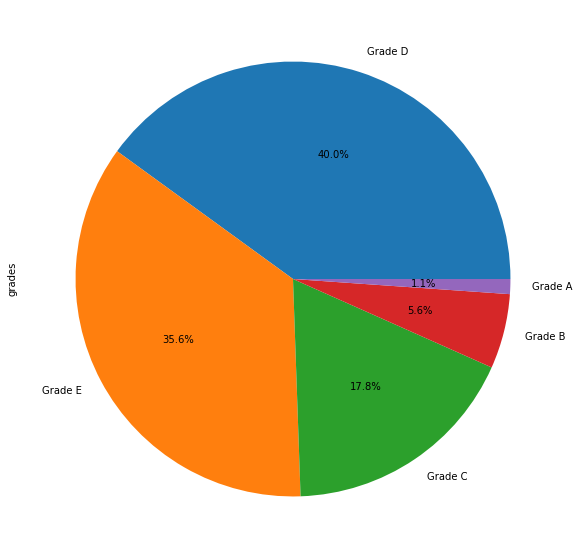

In [95]:
cricket['grades'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

##### Observation:
Most crciket players fall in either Grade 'E' or Grade 'D' categories


### Ranking Players

In [96]:
cricket['Rank'] = cricket['Overall Score'].rank(ascending=False)
cricket.sort_values(by='Rank', ascending=True, inplace=True)
cricket

Name   Runs    Ave      SR  Fours  Sixes   HF  Overall Score  \
1     CH Gayle  733.0  61.08  160.74   46.0   59.0  9.0       9.560614   
3    G Gambhir  590.0  36.87  143.55   64.0   17.0  6.0       7.428690   
9     S Dhawan  569.0  40.64  129.61   58.0   18.0  5.0       7.274556   
11   AM Rahane  560.0  40.00  129.33   73.0   10.0  5.0       7.159554   
7     CL White  479.0  43.54  149.68   41.0   20.0  5.0       6.326326   
..         ...    ...    ...     ...    ...    ...  ...            ...   
167   DW Steyn   19.0   3.80   90.47    0.0    1.0  0.0       0.295919   
169   A Mishra   16.0   5.33   80.00    1.0    0.0  0.0       0.295412   
171     Z Khan   12.0   6.00   70.58    1.0    0.0  0.0       0.265009   
177   RP Singh    6.0   3.00   50.00    0.0    0.0  0.0       0.132505   
179   R Sharma    2.0   0.50   18.18    0.0    0.0  0.0       0.033319   

      grades  Rank  
1    Grade A   1.0  
3    Grade B   2.0  
9    Grade B   3.0  
11   Grade B   4.0  
7    Grade B   5.0  
..       ...   ...  
167  Grade E  86.0  
169  Grade E  87.0  
171  Grade E  88.0  
177  Grade E  89.0  
179  Grade E  90.0  

[90 rows x 10 columns]

# Part V
#### • Questions: [ Total Score: 5 points]
1. List down all possible dimensionality reduction techniques that can be implemented using python.
2. So far you have used dimensional reduction on numeric data. Is it possible to do the same on a multimedia data [images and video] and text data ? Please illustrate your findings using a simple implementation on python.

##### Answer 1:
- *Missing Value Ratio:* 
If there are too many missing values (say more than 50%)? Should we impute the missing values or drop the variable? I would prefer to drop the variable since it will not have much information. However, this isn’t set in stone. We can set a threshold value and if the percentage of missing values in any variable is more than that threshold, we will drop the variable.
- *Low Variance Filter:*
Consider a variable in our dataset where all the observations have the same value, say 1. If we use this variable, do you think it can improve the model we will build? The answer is no, because this variable will have zero variance. So, we need to calculate the variance of each variable we are given. Then drop the variables having low variance as compared to other variables in our dataset. The reason for doing this, as I mentioned above, is that variables with a low variance will not affect the target variable.
- *High Correlation Filter:*
High correlation between two variables means they have similar trends and are likely to carry similar information. This can bring down the performance of some models drastically (linear and logistic regression models, for instance). We can calculate the correlation between independent numerical variables that are numerical in nature. If the correlation coefficient crosses a certain threshold value, we can drop one of the variables (dropping a variable is highly subjective and should always be done keeping the domain in mind).
- *Random Forest:*
Random Forest is one of the most widely used algorithms for feature selection. It comes packaged with in-built feature importance so you don’t need to program that separately. This helps us select a smaller subset of features. We need to convert the data into numeric form by applying one hot encoding, as Random Forest (Scikit-Learn Implementation) takes only numeric inputs.
- *Backward Feature Elimination:*
We first take all the n variables present in our dataset and train the model using them. We then calculate the performance of the model. Now, we compute the performance of the model after eliminating each variable (n times), i.e., we drop one variable every time and train the model on the remaining n-1 variables. We identify the variable whose removal has produced the smallest (or no) change in the performance of the model, and then drop that variable. Repeat this process until no variable can be dropped.
- *Forward Feature Selection:*
We start with a single feature. Essentially, we train the model n number of times using each feature separately. The variable giving the best performance is selected as the starting variable. Then we repeat this process and add one variable at a time. The variable that produces the highest increase in performance is retained. We repeat this process until no significant improvement is seen in the model’s performance.
- *Factor Analysis:*
In the Factor Analysis technique, variables are grouped by their correlations, i.e., all variables in a particular group will have a high correlation among themselves, but a low correlation with variables of other group(s). Here, each group is known as a factor. These factors are small in number as compared to the original dimensions of the data. However, these factors are difficult to observe.
- *Principal Component Analysis:*
PCA is a technique which helps us in extracting a new set of variables from an existing large set of variables. These newly extracted variables are called Principal Components. A principal component is a linear combination of the original variables. Principal components are extracted in such a way that the first principal component explains maximum variance in the dataset. Second principal component tries to explain the remaining variance in the dataset and is uncorrelated to the first principal component. Third principal component tries to explain the variance which is not explained by the first two principal components and so on.
- *Independent Component Analysis:*
Independent Component Analysis (ICA) is based on information-theory and is also one of the most widely used dimensionality reduction techniques. The major difference between PCA and ICA is that PCA looks for uncorrelated factors while ICA looks for independent factors. If two variables are uncorrelated, it means there is no linear relation between them. If they are independent, it means they are not dependent on other variables. For example, the age of a person is independent of what that person eats, or how much television he/she watches. This algorithm assumes that the given variables are linear mixtures of some unknown latent variables. It also assumes that these latent variables are mutually independent, i.e., they are not dependent on other variables and hence they are called the independent components of the observed data.
- *Methods Based on Projections:*
In projection techniques, multi-dimensional data is represented by projecting its points onto a lower-dimensional space. 
- *t-Distributed Stochastic Neighbor Embedding (t-SNE):*
t-SNE is one of the few algorithms which is capable of retaining both local and global structure of the data at the same time. It calculates the probability similarity of points in high dimensional space as well as in low dimensional space. After calculating both the probabilities, it minimizes the difference between both the probabilities.
- *UMAP:*
t-SNE works very well on large datasets but it also has it’s limitations, such as loss of large-scale information, slow computation time, and inability to meaningfully represent very large datasets. Uniform Manifold Approximation and Projection (UMAP) is a dimension reduction technique that can preserve as much of the local, and more of the global data structure as compared to t-SNE, with a shorter runtime.

##### Answer 2:
Yes; It is possible to do the same on a multimedia data [images and video] and text data. The image is a combination of pixels in rows placed one after another to form one single image each pixel value represents the intensity value of the image, so if you have multiple images we can form a matrix considering a row of pixels as a vector. It requires huge amounts of storage while working with many images where we are using PCA is used to compress it and preserve the data as much as possible.
Look at Python Code:

In [ ]:
# Importing libraries:

import matplotlib.image as mplib 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reading an image and printing the shape of the image 
img = mplib.imread('/content/opengenus_logo.png')
print(img.shape)
plt.imshow(img)

# Reshaping the image to 2-dimensional so we are multiplying columns with depth so 225 X 3 = 675.
img_r = np.reshape(img, (225, 582)) 
print(img_r.shape) 

# Applying PCA so that it will compress the image, the reduced dimension is shown in the output. 
pca = PCA(32).fit(img_r) 
img_transformed = pca.transform(img_r) 
print(img_transformed.shape)
print(np.sum(pca.explained_variance_ratio_) )

# Retrieving the results of the image after Dimension reduction.
temp = pca.inverse_transform(img_transformed) 
print(temp.shape)
temp = np.reshape(temp, (225,225 ,3)) 
print(temp.shape) 
plt.imshow(temp)

### ------------------ END OF PROJECT ----------------------